# SGRB Redshift Estimate Using Epeak-Eiso Correlation

Prerequisites:
1. Download entire FERMI GBM BURST catalog (criteria: OBS_DATE <=2022-12-31 23:59:59.999 AND T90 <=2.000)

In [1]:
%autosave 300

Autosaving every 300 seconds


### CLASSES: Point, Line, Curve
We will use it for calculation of energy parameters, plotting them and as well solving the intersection problem

#### Point

In [2]:
class Point:
    
    def __init__(self, x, y):
        
        if not isinstance(x,(int,float)):
            raise TypeError("Point first argument must be integer or float")
            
        if not isinstance(y,(int,float)):
            raise TypeError("Point second argument must be integer or float")
            
        self.__x = x
        self.__y = y
        self.__z = 0
        
    def show(self):
        print("(", self.__x, self.__y, ")")
        
    def get_x(self):
        return self.__x
    
    def get_y(self):
        return self.__y
    
    def set_x(self,x):
        self.__x = x
        
    def set_y(self,y):
        self.__y = y
        
    def __str__(self):
        return "(" + str(self.__x) + " " + str(self.__y) + ")"
    
    def set_z(self,z):
        self.z = z
        
    def get_z(self):
        return self.z

#### Line:

In [3]:
class Line:
    def __init__(self, p1, p2):
        
        if not isinstance(p1, Point):
            raise TypeError("p1 must be Point!")
        if not isinstance(p1, Point):
            raise TypeError("p2 must be Point!")
            
        self.__p1 = p1
        self.__p2 = p2
        
        
    def get_p1(self):
        return self.__p1
    
    def get_p2(self):
        return self.__p2
    
    def set_p1(self, p1):
        if not isinstance(p1, Point):
            raise TypeError("p1 must be Point!")
        self.__p1 = p1
    
    def set_p2(self, p2):
        if not isinstance(p2, Point):
            raise TypeError("p2 must be Point!")
        self.__p2 = p2
    
    
    def show(self):        
        p_1_x = self.__p1.get_x()
        p_1_y = self.__p1.get_y()
        
        p_2_x = self.__p2.get_x()
        p_2_y = self.__p2.get_y()
        
        print("Line between:")
        print("p1 = (", p_1_x, p_1_y, ")")
        print("p2 = (", p_2_x, p_2_y, ")")
        
    def write(self,fname):
        xlist = [self.__p1.get_x(),self.__p2.get_x()]
        ylist = [self.__p1.get_y(),self.__p2.get_y()]
            
        c = [xlist, ylist] 
        with open(fname, "w") as file:
            for x in zip(*c):
                file.write("{0}\t{1}\n".format(*x))
          

#### Curve:

In [4]:
class Curve:
    
    def __init__(self, name):
        self.__name = name
        self.__points = list()
        
        
    def get_name(self):
        return self.__name
    
    
    def get_points(self):
        return self.__points
    
    
    def add(self, p):
        
        if not isinstance(p, Point):
            raise TypeError("p must be a point")
        else: 
            self.__points.append(p)
    
    
    #Region: x-min-max:
    def get_x_min(self):
        
        if len(self.get_points()) != 0:
            xlist = np.array([])
            
            for i in self.get_points():
                xlist = np.append(xlist, i.get_x())
                
            return min(xlist)
    
    
    def get_x_max(self):
        if len(self.get_points()) != 0:
            xlist = np.array([])
            
            for i in self.get_points():
                xlist = np.append(xlist,i.get_x())
                
            return max(xlist)
    
    
    #region: y-min-max:
    def get_y_min(self):
        
        if len(self.get_points()) != 0:
            ylist = np.array([])
            
            for i in self.get_points():
                ylist = np.append(ylist, i.get_y())
                
            return min(ylist)
    
    
    def get_y_max(self):
        
        if len(self.get_points()) != 0:
            ylist = np.array([])
            
            for i in self.get_points():
                ylist = np.append(ylist,i.get_y())
                
            return max(ylist)
    
    
    #Plot method may be added.... 
    
    
    def show(self):
        for i in self.__points:
            i.show()
    
    def write(self,fname): 
        xypoints = self.get_points()
        
        xlist = np.array([])
        ylist = np.array([])
            
        for i in xypoints:
            xlist = np.append(xlist, i.get_x())
            
        for i in xypoints:
            ylist = np.append(ylist, i.get_y())
         
        c = [xlist, ylist] 
        with open(fname, "w") as file:
            for x in zip(*c):
                file.write("{0}\t{1}\n".format(*x))
         
        
    def get_point_by_index(self, index):
        return self.get_points()[index]
    

#### CurveLineInterPoint:

In [5]:
class CurveLineInterPoint:
    def __init__(self, obj_name, best_m, curve, line, point, p3p, p3m, p1p, p1m, z, z3p, z3m, z1p, z1m):
        
        if not isinstance(curve, Curve):
            raise TypeError("curve must be Curve!")
        if not isinstance(line, Curve):
            raise TypeError("line must be Curve!")
        #if not isinstance(point, Point):
            #raise TypeError("point must be Point!")
                       
        self.__curve = curve
        self.__line = line
        self.__point = point
        self.__p3p = p3p
        self.__p3m = p3m
        self.__p1p = p1p
        self.__p1m = p1m
        self.__objname = obj_name
        self.__bestm = best_m
        self.__z = z
        self.__z3p = z3p
        self.__z3m = z3m
        self.__z1p = z1p
        self.__z1m = z1m
        
#getters.................................  
    def get_curve(self):
        return self.__curve
    
    def get_line(self):
        return self.__line
    
    def get_point(self):
        return self.__point
    
    def get_objname(self):
        return self.__objname
    
    def get_bestm(self):
        return self.__bestm
    
    def get_z(self):
        return self.__z

    def get_p3p(self):
        return self.__p3p
    def get_p3m(self):
        return self.__p3m
    def get_p1p(self):
        return self.__p1p
    def get_p1m(self):
        return self.__p1m
    
    def get_z3p(self):
        return self.__z3p
    def get_z3m(self):
        return self.__z3m
    def get_z1p(self):
        return self.__z1p
    def get_z1m(self):
        return self.__z1m
#setters................................. 

    def set_curve(self, curve):
        if not isinstance(curve, Curve):
            raise TypeError("curve must be Curve!")
        self.__curve = curve
    
    def set_line(self, line):
        if not isinstance(line, Curve):
            raise TypeError("line must be Curve!")
        self.__line = line
    
    def set_point(self, point):
        if not isinstance(point, Point):
            raise TypeError("point must be Point!")
        self.__point = point
        
    def set_objname(self, name):
        self.__objname = name
    
    def set_bestm(self, best):
        self.__bestm = best
    
    def set_z(self, z):
        self.__z = z
        
    def show(self):
        Show_point = None
        if self.__point is not None:
            Show_point = "(" + str(self.__point.get_x()) + ", " + str(self.__point.get_y()) + ")" 
            
        Show_p3p = None
        if self.__p3p is not None:
            Show_p3p = "(" + str(self.__p3p.get_x()) + ", " + str(self.__p3p.get_y()) + ")"
            
        Show_p3m = None
        if self.__p3m is not None:
            Show_p3m = "(" + str(self.__p3m.get_x()) + ", " + str(self.__p3m.get_y()) + ")"
            
        Show_p1p = None
        if self.__p1p is not None:
            Show_p1p = "(" + str(self.__p1p.get_x()) + ", " + str(self.__p1p.get_y()) + ")"
            
        Show_p1m = None
        if self.__p1m is not None:
            Show_p1m = "(" + str(self.__p1m.get_x()) + ", " + str(self.__p1m.get_y()) + ")"
        
        
        Show_z = None
        if self.__z is not None:
            Show_z = str(self.__z)
        
        
        Show_z3p = None
        if self.__z3p is not None:
            Show_z3p = str(self.__z3p)
            
        Show_z3m = None
        if self.__z3m is not None:
            Show_z3m = str(self.__z3m)
            
        Show_z1p = None
        if self.__z1p is not None:
            Show_z1p = str(self.__z1p)
            
        Show_z1m = None
        if self.__z1m is not None:
            Show_z1m = str(self.__z1m)
        
        print(self.__objname, self.__bestm, Show_point, Show_p3p, Show_p3m, Show_p1p, Show_p1m, Show_z, Show_z3p, Show_z3m, Show_z1p, Show_z1m)
    # obj_name, best_m,  point, p3p, p3m, p1p, p1m, z, z3p, z3m, z1p, z1m
    

#### STATIC CLASSES: OPERATIONS (Line_Line_Intersect, Curve_Line_intersect)

In [6]:
class Operations:
    
#Region: Code returns point (cx,cy) if intersection point found & returns none when intersection point not found
    @staticmethod
    def Line_Line_Intersect(L1, L2):
        
        #Region: For Line-1:
        x1 = L1.get_p1().get_x()
        y1 = L1.get_p1().get_y()
        
        x2 = L1.get_p2().get_x()
        y2 = L1.get_p2().get_y()
        
        #Region: For Line-2:
        x3 = L2.get_p1().get_x()
        y3 = L2.get_p1().get_y()
        
        x4 = L2.get_p2().get_x()
        y4 = L2.get_p2().get_y()
        
        #Region: Check points for Line-1:
        if x1 >= x2:
            tx = x1; ty = y1; x1 = x2; y1 = y2; x2 = tx; y2 = ty
          
        #Region: Check points for Line-2:
        if x3 >= x4:
            tx = x3; ty = y3; x3 = x4; y3 = y4; x4 = tx; y4 = ty
            
        #Region: Check & find tangent for Line-1:
        if y1 == y2: k1 = 0;
        else: k1 = (y2 - y1)/(x2 - x1)
                
        #Region: Check & find tangent for Line-2: 
        if y3 == y4: k2 = 0
        else: k2 = (y4 - y3)/(x4 - x3)
            
        #Region: Check for parallelism:
        if k1 == k2: return None    
        
        #Region: Find out intersect point:
        b1 = y1 - k1 * x1
        b2 = y3 - k2 * x3
        
        cx = (b2 - b1)/(k1 - k2)
        cy = k1 * cx + b1
        
        if (cx < x1) or (cx < x3) or (cx > x2) or (cx > x4): return None
        else: return Point(cx, cy)
        
#Region: Code returns point (cx,cy) if intersection point found & returns none when intersection point not found
    @staticmethod
    def Curve_Line_Intersect(C, L):
        
        #Region: Check the curve for empty:
        if C == None: print("The Curve is none"); return None       
        if L == None: print('The Line is none');  return None
        
        plist = C.get_points()
        
        if len(plist) <= 1: print("Empty curve"); return None
               
        for i in range(1,len(plist)):
            segment = Line(plist[i], plist[i-1])
            cp = Operations.Line_Line_Intersect(segment, L)
            
            if cp != None: print('Intersection point has been found!'); return cp
            
        print('No Intersection point')
        return None
    
    
    @staticmethod
    def Curve_Curve_Intersect(C1, C2):
        
        PointOfC1 = C1.get_points()
        PointOfC2 = C2.get_points()
        
        C_1_y = np.array([])
        C_2_y = np.array([])
        
        if len(PointOfC1) != 0:     
            for i in PointOfC1:
                C_1_y = np.append(C_1_y, i.get_y())
        else: raise TypeError("Length PointOfC1 has 0!")
            
        if len(PointOfC2) != 0:
            for i in PointOfC2:
                C_2_y = np.append(C_2_y, i.get_y())
        else: raise TypeError("Length PointOfC2 has 0!")
        
        Left_Index = np.argwhere(np.diff(np.sign(C_1_y - C_2_y))).flatten()

        return Left_Index      
    
    
    @staticmethod
    def Get_Point_Line_Distance(P,L):
 
        A = np.array([L.get_p1().get_x(), L.get_p1().get_y()])
        B = np.array([L.get_p2().get_x(), L.get_p2().get_y()])
        C = np.array([P.get_x(),P.get_y()])
  

        l = imLine([A, B])
        p = imPoint(C)

        
        d = np.linalg.norm(np.cross(B - A, C - A))/np.linalg.norm(B - A)

        n = B - A
        v = C - A

        z = A + n*(np.dot(v, n)/np.dot(n, n))

        return l.distance(p)
        

### END OF LIBRARY
_____________________________________________________________________________________________________________________________________________

### BEGIN OF ASTROPHYSICAL CODE
_____________________________________________________________________________________________________________________________________________

### Imports:

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg') #setting vector type of the output plot - usefull for scaling pictures SVG
from astropy.io import fits
from astropy.table import Table
import seaborn as sns
# sns.set(style="ticks", context="talk", font_scale=1)

from scipy.integrate import quad

import sys
np.set_printoptions(threshold=sys.maxsize) #to display all table without interruptions

import numpy as np
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png') #setting vector type of the output plot - usefull for scaling pictures SVG

# from shapely.geometry import Point as imPoint
# from shapely.geometry import LineString as imLine

/var/folders/q3/mnhc5cbn57x2lb_psm18b2q80000gn/T/ipykernel_38874/1076542129.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg') #setting vector type of the output plot - usefull for scaling pictures SVG
/var/folders/q3/mnhc5cbn57x2lb_psm18b2q80000gn/T/ipykernel_38874/1076542129.py:18: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png') #setting vector type of the output plot - usefull for scaling pictures SVG


#### Constants:

In [8]:
# Cosmology constants
# from Planck 2015
H0 = 67.8; # km/s/Mpc
omegaM, omegaK, omegaL = 0.308, 0, 0.692
c = 2.998e10
pi=np.pi
kevToErg = 1.602e-9
mpcToCm = 3.086e24
kmToCm = 1e5

#### FIELDS

In [15]:
# Here we set the REDSHIFT limits for calculation:
zmin = 0.001  # zmin = 0.001
zmax = 10.0  # zmax = 10.0
dz = 0.001  # dz = 0.0001   

x_reducer = 1e52

xmin = 1e48
xmax = 1e54
xmin = xmin/x_reducer
xmax = xmax/x_reducer

x1 = xmin
x2 = xmax

y1 = 10**(3.23197)*(x1)**0.50569 ## OLD SLOPE
y2 = 10**(3.23197)*(x2)**0.50569 ## OLD SLOPE

# y1 = 10**(1.16)*(x1)**0.56  ## NEW SLOPE
# y2 = 10**(1.16)*(x2)**0.56  ## NEW SLOPE

MLPoint1 = Point(x1,y1)
MLPoint2 = Point(x2,y2)
#Main_Line = Line(MLPoint1, MLPoint2)

#### Astrophysical models:

In [10]:
class models:
    
    work_models = ['flnc_comp','flnc_band']#old catalogs had ['FLNC_COMP','FLNC_BAND']
    
    @staticmethod
    def _luminosityDistance(redshift):
        dH = c*mpcToCm/kmToCm/H0
        function = lambda x: (1/np.sqrt(omegaM*(1+x)**3+omegaK*(1+x)**2+omegaL))
        lower, upper = 0, redshift
        luminosityDistance =  dH *(1+redshift) * quad(function,lower,upper)[0]
        return luminosityDistance
    
    @staticmethod
    def _luminosityArea(redshift):
        luminosityDistance = models._luminosityDistance(redshift)
        luminosityArea = 4 * pi * luminosityDistance**2
        return luminosityArea
    
    @staticmethod
    def get_epeak(z,epeak):
        return float(epeak)*(1+float(z))
    
    # ------------------ CUTOFF POWER-LAW ------------------
    @staticmethod
    def _cutoffPLFlux(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper):
    ## model parameters are from the fitting result in observer's frame.
    ## integration from lower/(1+z) to upper/(1+z) in the observer's frame,
    ## which are the corrsponding energy from lower to upper in the rest frame. 
    ## set redshift = 0 in order to compute the flux in observer's frame.
    
    # if no data or bad data, return.
        if (normalization <= 0 ): return 0
        if (ePeak <= 0 ): return 0
        lower, upper = lower/(1+redshift), upper/(1+redshift)
        function = lambda x: normalization*x*(x/ePiv)**(-alpha)*np.exp(-x*(2-alpha)/ePeak)

    #QAGS adaptive integration
        flux = quad( function, lower, upper)[0]
        return flux
    
    @staticmethod
    def _cutoffPLEnergy(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper):
    # in order to have isotropic energy in the rest frame from E1 to E2,
    # we need to integrate in the observer's frame from E1/(1+z) to E2/(1+z), then divide by (1+z) for the total energy.
    # (E/50.0)**(-a)*np.exp(-E*(2.0-a)/b)
    # alpha is usually positive by default
        
        flux = models._cutoffPLFlux(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper)
        area = models._luminosityArea(redshift)
        isotropicEnergy =  kevToErg * area *  duration * flux / (1+redshift)

        return  isotropicEnergy
    
    @staticmethod
    def _cutoffPLFluxErr(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dEpeak, dNormalization):
    ## model parameters are from the fitting result in observer's frame.
    ## integration from lower/(1+z) to upper/(1+z) in the observer's frame,
    ## which are the corrsponding energy from lower to upper in the rest frame. 
    ## set redshift = 0 in order to compute the flux in observer's frame.
    
    # if no data or bad data, return.
        if (normalization <= 0 ): return 0
        if (ePeak <= 0 ): return 0
        if (dAlpha == ""): return 0
        if (dEpeak == ""): return 0 
        if (dNormalization == ""): return 0
    
        lower, upper = lower/(1+redshift), upper/(1+redshift)

    # Rest frame
    ## Uncertainty from normalization
        f_dF_dNorm = lambda x: x*(x/ePiv)**(-alpha)*np.exp(x*(alpha-2)/ePeak) 
    #QAGS adaptive integration
        dF_dNorm = quad( f_dF_dNorm, lower, upper)[0]

    ## Uncertainty from alpha
        f_dF_dAlpha = lambda x: (np.log(x/ePiv)-x/ePeak) * normalization*x*(x/ePiv)**(-alpha)*np.exp(x*(alpha-2)/ePeak)   
    #QAGS adaptive integration
        dF_dAlpha = quad( f_dF_dAlpha, lower, upper)[0]

    ## Uncertainty from ePeak
        f_dF_dEpeak = lambda x: (x*(2-alpha)/ePeak**2)*normalization*x*(x/ePiv)**(-alpha)*np.exp(x*(alpha-2)/ePeak)
    #QAGS adaptive integration
        dF_dEpeak = quad( f_dF_dEpeak, lower, upper)[0]

        fluxErr = np.sqrt((dF_dNorm*dNormalization)**2+(dF_dAlpha*dAlpha)**2+(dF_dEpeak*dEpeak)**2)

        return fluxErr

    @staticmethod
    def _cutoffPLEnergyErr(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dEpeak, dNormalization):
    
    # in order to have isotropic energy in the rest frame from E1 to E2,
    # we need to integrate in the observer's frame from E1/(1+z) to E2/(1+z), then divide by (1+z) for the total energy.
    # (E/50.0)**(-a)*np.exp(-E*(2.0-a)/b)
    # alpha is usually positive by default
    
        cutoffPLFluxErr = _cutoffPLFluxErr(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dEpeak, dNormalization)
        area = _luminosityArea(redshift)
        isotropicEnergyErr =  kevToErg * area * duration * cutoffPLFluxErr / (1+redshift) 
    
        return isotropicEnergyErr
    
    @staticmethod
    def _cutoffPLK(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper):
    
        fluxObs = _cutoffPLFlux(alpha, ePeak, ePiv, normalization, duration, 0, lower, upper)
        fluxRest = _cutoffPLFlux(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper)

        if fluxObs == 0: return 0
        k = fluxRest/fluxObs
    
        return k
    
    @staticmethod
    def _cutoffPLKErr(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dEpeak, dNormalization):
    
        fluxObs = _cutoffPLFlux(alpha, ePeak, ePiv, normalization, duration, 0, lower, upper)
        fluxObsErr = _cutoffPLFluxErr(alpha, ePeak, ePiv, normalization, duration, 0, lower, upper, dAlpha, dEpeak, dNormalization)
        fluxRest = _cutoffPLFlux(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper)
        fluxRestErr = _cutoffPLFluxErr(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dEpeak, dNormalization)
    
        if fluxObs == 0: return 0
    
    # uncertainty from flux in observer's frame
        kObsErr = - fluxObsErr*fluxRest/fluxObs**2
    
    # uncertainty from flux in observer's frame
        kRestErr =  fluxRestErr/fluxObs
    
        kErr = np.sqrt(kObsErr**2+kRestErr**2)
    
        return kErry
    
    
    
    #------------------ Band Function -----------------#
    @staticmethod
    def _bandFlux(alpha, beta, ePeak, ePiv, normalization, duration, redshift, lower, upper):
    ## model parameters are from the fitting result in observer's frame.
    ## integration from lower/(1+z) to upper/(1+z) in the observer's frame,
    ## which are the corrsponding energy from lower to upper in the rest frame. 
    ## set redshift = 0 in order to compute the flux in observer's frame.
    
    # if no data or bad data, return.
        if normalization <= 0: return 0
        if (ePeak <= 0 ): return 0 
        if (upper == ""): return 0 

        middle = (alpha-beta)*ePeak/(2+alpha)
    #print(middle)
    # if alpha < beta, middle will be negtive. 
        if (middle < lower): middle = lower
        if (upper < middle): middle = upper 

        lower, middle, upper = lower/(1+redshift), middle/(1+redshift), upper/(1+redshift)

        functionLow = lambda x: normalization*x*(x/ePiv)**alpha*np.exp(-x*(2+alpha)/ePeak)
        functionHigh = lambda x: normalization*x*((alpha-beta)*ePeak/(2+alpha)/ePiv)**(alpha-beta)*np.exp(beta-alpha)*(x/ePiv)**beta
    
        resultLow = quad( functionLow, lower, middle )[0]
        resultHigh = quad( functionHigh, middle, upper)[0]

        flux = resultLow + resultHigh
        return flux
    
    @staticmethod
    def _bandEnergy(alpha, beta, ePeak, ePiv, normalization, duration, redshift, lower, upper):
    # in order to have isotropic energy in the rest frame from E1 to E2,
    # we need to integrate in the observer's frame from E1/(1+z) to E2/(1+z), then divide by (1+z) for the total energy.
    # Low: A(E/50)^a*exp(-E(2+a)/Ep)
    # High: A((a-b)Ep/(2+a)/50)^(a-b)*exp(b-a)(E/50)^b
    # Ebreak: (a-b)Ep/(2+a)     
    # alpha and beta are usually negtive by default
    
        flux = models._bandFlux(alpha, beta, ePeak, ePiv, normalization, duration, redshift, lower, upper)
        area = models._luminosityArea(redshift)
        isotropicEnergy =  kevToErg * area *  duration * flux / (1+redshift) 
        return isotropicEnergy

    @staticmethod
    def _bandFluxErr(alpha, beta, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dBeta, dEpeak, dNormalization):
        
    ## model parameters are from the fitting result in observer's frame.
    ## integration from lower/(1+z) to upper/(1+z) in the observer's frame,
    ## which are the corrsponding energy from lower to upper in the rest frame. 
    ## set redshift = 0 in order to compute the flux in observer's frame.
    
    
    # if no data or bad data, return.
        if (normalization <= 0 ): return 0 
        if (ePeak <= 0 ): return 0 
        if (dAlpha == ""): return 0 
        if (dBeta == ""): return 0 
        if (dEpeak == ""): return 0 
        if (dNormalization == ""): return 0 
    
        middle = (alpha-beta)*ePeak/(2+alpha)
    # if alpha < beta, middle will be negtive. 
        if (middle < lower): middel = lower
        if (upper < middle): middle = upper 

    #Rest frame
        lower, middle, upper = lower/(1+redshift), middle/(1+redshift), upper/(1+redshift)

    ## dA_dB means dA/dB
        dF_dg = normalization*(1/ePiv)**alpha*((alpha-beta)/(2+alpha))**(alpha+1)*(ePeak/(1+redshift))**(alpha)*np.exp((beta-alpha)/(1+redshift))
        dg_dAlpha = (1/(1+redshift))*(2+beta)*ePeak/(2+alpha)**2
        dg_dBeta = - (1/(1+redshift))*ePeak/(2+alpha)
        dg_dEpeak = (1/(1+redshift))*(alpha-beta)/(2+alpha)

    ## Uncertainty from normalization
        f_dh_dNorm = lambda x:  x*(x/ePiv)**alpha*np.exp(-x*(2+alpha)/ePeak)
        dF_dNorm= quad(f_dh_dNorm, lower, middle)[0]

    ## Uncertainty from alpha
        f_dh_dAlpha = lambda x: (np.log(x/ePiv)-x/ePeak)*normalization*x*(x/ePiv)**alpha*np.exp(-x*(2+alpha)/ePeak)
        dF_dAlpha = quad( f_dh_dAlpha, lower, middle )[0]
    
    ## Uncertainty from beta
        dF_dBeta =  dF_dg*dg_dBeta

    ## Uncertainty from ePeak
        f_dh_dEpeak = lambda x: ((2+alpha)*x/ePeak**2)*normalization*x*(x/ePiv)**alpha*np.exp(-x*(2+alpha)/ePeak)
        dF_dEpeak = quad( f_dh_dEpeak, lower, middle)[0] + dF_dg*dg_dEpeak


    ## Uncertainty of the lower enerngy part
        fluxLowErr = np.sqrt((dF_dNorm*dNormalization)**2+(dF_dAlpha*dAlpha)**2+(dF_dBeta*dBeta)**2+(dF_dEpeak*dEpeak)**2)
    
    ## dA_dB means dA/dB
        dI_dj = normalization*(1/ePiv)**alpha*(1/(1+redshift))**(beta+1)*((alpha-beta)/(2+alpha))**(alpha+1)*ePeak**(alpha+1)*np.exp(beta-alpha)
        dj_dAlpha = ePeak*(2+beta)/((2+alpha)**2*(1+redshift))
        dj_dBeta = - ePeak/((2+alpha)*(1+redshift))
        dj_dEpeak = (alpha-beta)/((2+alpha)*(1+redshift))
    
    ## Uncertainty from normalization
        f_dk_dNorm = lambda x: (ePeak/ePiv)**(alpha-beta)*(((alpha-beta)/(2+alpha))**(alpha-beta))*np.exp(beta-alpha)*x*(x/ePiv)**beta 
        dI_dNorm = quad( f_dk_dNorm, middle, upper)[0]

    ## Uncertainty from alpha
        f_dk_dAlpha = lambda x:  ((beta-alpha)/(2+alpha)+np.log(ePeak*(alpha-beta)/(ePiv*(2+alpha))))*normalization*x*(ePeak/ePiv)**(alpha-beta)*((alpha-beta)/(2+alpha))**(alpha-beta)*np.exp(beta-alpha)*(x/ePiv)**beta
        dI_dAlpha = quad( f_dk_dAlpha, middle, upper)[0] - dI_dj*dj_dAlpha

    ## Uncertainty from beta
        f_dk_dBeta = lambda x: (np.log(x*(2+alpha)/(ePeak*(alpha-beta))))*normalization*x*(ePeak/ePiv)**(alpha-beta)*((alpha-beta)/(2+alpha))**(alpha-beta)*np.exp(beta-alpha)*(x/ePiv)**beta
        dI_dBeta = quad( f_dk_dBeta, middle, upper)[0] - dI_dj*dj_dBeta

    ## Uncertainty from ePeak
        f_dk_dEpeak = lambda x: ((alpha-beta)/ePeak)*normalization*x*(ePeak/ePiv)**(alpha-beta)*((alpha-beta)/(2+alpha))**(alpha-beta)*np.exp(beta-alpha)*(x/ePiv)**beta
        dI_dEpeak = quad( f_dk_dEpeak, middle, upper )[0] - dI_dj*dj_dEpeak
    
    ## Uncertainty from high energy part
        fluxHighErr = np.sqrt((dI_dNorm*dNormalization)**2+(dI_dAlpha*dAlpha)**2+(dI_dBeta*dBeta)**2+(dI_dEpeak*dEpeak)**2)

    ## Fial uncertainty 
        fluxErr = np.sqrt(fluxLowErr**2+fluxHighErr**2)

        return fluxErr
    
    @staticmethod
    def _bandEnergyErr(alpha, beta, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dBeta, dEpeak, dNormalization):
    # in order to have isotropic energy in the rest frame from E1 to E2,
    # we need to integrate in the observer's frame from E1/(1+z) to E2/(1+z), then divide by (1+z) for the total energy.
    # Low: A(E/50)^a*np.exp(-E(2+a)/Ep)
    # High: A((a-b)Ep/(2+a)/50)^(a-b)*np.exp(b-a)(E/50)^b
    # Ebreak: (a-b)Ep/(2+a)
    # alpha and beta are usually negtive by default
        
        area = _luminosityArea(redshift)
        bandFluxErr = _bandFluxErr(alpha, beta, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dBeta, dEpeak, dNormalization)
        isotropicEnergyErr = kevToErg * area * duration * bandFluxErr / (1+redshift) 

        return isotropicEnergyErr

    @staticmethod
    def _bandK(alpha, beta, ePeak, ePiv, normalization, duration, redshift, lower, upper):
    
        fluxObs = _bandFlux(alpha, beta, ePeak, ePiv, normalization, duration, 0, lower, upper)
        fluxRest = _bandFlux(alpha, beta, ePeak, ePiv, normalization, duration, redshift, lower, upper)

        if fluxObs == 0 : return 0 
        k = fluxRest/fluxObs
        return k

    @staticmethod
    def _bandKErr(alpha, beta, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dBeta, dEpeak, dNormalization):
    
        fluxObs = _bandFlux(alpha, beta, ePeak, ePiv, normalization, duration, 0, lower, upper)
        fluxObsErr = _bandFluxErr(alpha, beta, ePeak, ePiv, normalization, duration, 0, lower, upper, dAlpha, dBeta, dEpeak, dNormalization)
        fluxRest = _bandFlux(alpha, beta, ePeak, ePiv, normalization, duration, redshift, lower, upper)
        fluxRestErr = _bandFluxErr(alpha, beta, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dBeta, dEpeak, dNormalization)
    
        if fluxObs == 0: return 0 
    
    # uncertainty from flux in observer's frame
        kObsErr = - fluxObsErr*fluxRest/fluxObs**2
    
    # uncertainty from flux in observer's frame
        kRestErr =  fluxRestErr/fluxObs
    
        kErr = np.sqrt(kObsErr**2+kRestErr**2)
    
        return kErr

#### MyAstro:

In [13]:
#filename = 'browse_results-3.fits' ###checker

class myastro:
    @staticmethod
    def get_data(filename):
        ##check if file exists
        short_catalog = filename
        short_list = fits.open(short_catalog)
#         print(short_list[1].data)
        return short_list[1].data;
    
    @staticmethod
    def get_all_names_with_model(filename):
        data = myastro.get_data(filename)
        return data['NAME'], data['FLNC_BEST_FITTING_MODEL']
        
    @staticmethod
    def sort_name_by_models(namemodellist):
        name_list = namemodellist[0]
        model_list = namemodellist[1]
        
        if name_list.shape!= model_list.shape: 
            raise TypeError("names length is not equal to the length of models")
        
        sorted_name_list = []
        sorted_model_list = []
        
        i = 0
        while i <len(model_list):
            for j in models.work_models: 
                if model_list[i] == j:  
                    sorted_name_list.append(name_list[i])
                    sorted_model_list.append(model_list[i])
            i+=1
        return sorted_name_list, sorted_model_list
        
    @staticmethod
    def get_params_by_name(name, filename):
        short_data = myastro.get_data(filename)
        
        #####CAN BE OPTIMIZED
        
        ##it was copied from my code
        triggertimelistshort = short_data['TRIGGER_TIME'] #given in Modified Julian Date---MJD; use xTime to convert if needed https://heasarc.nasa.gov/cgi-bin/Tools/xTime/xTime.pl
        t90listshort = short_data['T90']
        t90errorlistshort = short_data['T90_ERROR']
        fluencedurationlistshort = short_data['FLNC_SPECTRUM_STOP'] - short_data['FLNC_SPECTRUM_START']
        ###power-law: alpha, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dNormalization
        shortplnormalization = short_data['FLNC_PLAW_AMPL']
        shortplalpha = -1 * short_data['FLNC_PLAW_INDEX']
        shortplePiv = short_data['FLNC_PLAW_PIVOT']
        shortplflncspecstop = short_data['FLNC_SPECTRUM_STOP'] ##added for this code 20210612
        shortplflncspecstart = short_data['FLNC_SPECTRUM_START'] ##added for this code 20210612
        #shortplduration = short_data['FLNC_SPECTRUM_STOP'] - short_data['FLNC_SPECTRUM_START']
        shortplupper = np.full((short_data.shape[0]),10**4)
        shortpllower = np.full((short_data.shape[0]),1)
        shortplredshift1 = np.ones(short_data.shape[0])
        shortplredshift2 = np.full((short_data.shape[0]),2)
        shortplredshift05 = np.full((short_data.shape[0]),0.5)
        shortpldAlpha = short_data['FLNC_PLAW_INDEX_POS_ERR']
        shortpldNormalization = short_data['FLNC_PLAW_AMPL_POS_ERR']
        ###cutoff power-law: alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dEpeak, dNormalization
        shortcplalpha = -1 * short_data['FLNC_COMP_INDEX']
        shortcplePeak = short_data['FLNC_COMP_EPEAK']
        shortcplePiv = short_data['FLNC_COMP_PIVOT']
        shortcplnormalization = short_data['FLNC_COMP_AMPL']
        shortcplflncspecstop = short_data['FLNC_SPECTRUM_STOP'] ##added for this code 20210612
        shortcplflncspecstart = short_data['FLNC_SPECTRUM_START'] ##added for this code 20210612
        #shortcplduration = short_data['FLNC_SPECTRUM_STOP'] - short_data['FLNC_SPECTRUM_START']
        shortcplredshift1 = np.ones(short_data.shape[0])
        shortcplredshift2 = np.full((short_data.shape[0]),2)
        shortcplredshift05 = np.full((short_data.shape[0]),0.5)
        shortcpllower = np.full((short_data.shape[0]),1)
        shortcplupper = np.full((short_data.shape[0]),10**4)
        shortcpldAlpha = short_data['FLNC_COMP_INDEX_POS_ERR']
        shortcpldEpeak = short_data['FLNC_COMP_EPEAK_POS_ERR']
        shortcpldNormalization = short_data['FLNC_COMP_AMPL_POS_ERR']
        ###band: alpha, beta, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dBeta, dEpeak, dNormalization
        shortbandalpha = short_data['FLNC_BAND_ALPHA']
        shortbandbeta = short_data['FLNC_BAND_BETA']
        shortbandePeak = short_data['FLNC_BAND_EPEAK']
        shortbandePiv = np.full((short_data.shape[0]),100)
        shortbandnormalization = short_data['FLNC_BAND_AMPL']
        shortbandflncspecstop = short_data['FLNC_SPECTRUM_STOP'] ##added for this code 20210612
        shortbandflncspecstart = short_data['FLNC_SPECTRUM_START'] ##added for this code 20210612
        #shortbandduration = short_data['FLNC_SPECTRUM_STOP'] - short_data['FLNC_SPECTRUM_START']
        shortbandredshift1 = np.ones(short_data.shape[0])
        shortbandredshift2 = np.full((short_data.shape[0]),2)
        shortbandredshift05 = np.full((short_data.shape[0]),0.5)
        shortbandlower = np.full((short_data.shape[0]),1)
        shortbandupper = np.full((short_data.shape[0]),10**4)
        shortbanddAlpha = short_data['FLNC_BAND_ALPHA_POS_ERR']
        shortbanddBeta = short_data['FLNC_BAND_BETA_POS_ERR']
        shortbanddEpeak = short_data['FLNC_BAND_EPEAK_POS_ERR']
        shortbanddNormalization = short_data['FLNC_BAND_AMPL_POS_ERR']
        #
        fluencebestfitlistshort = short_data['FLNC_BEST_FITTING_MODEL']
        ##end of my copied code
        
        namelistshort = short_data['NAME']
        
        if (name in namelistshort):
            print (f"Object {name} is found")
        else:
            print (f"Object {name} is NOT found")
            return None
        
        name_index = 0
        for i in namelistshort:
            if i == name:
                break
            else:
                name_index +=1
           
        
        #name_index = name_index - 1
        params_by_index = np.array([])
        params_by_index = np.append(params_by_index,(namelistshort[name_index],#000
                                                     name_index,#001
                                                     fluencebestfitlistshort[name_index],#002
                                                     triggertimelistshort[name_index],#003
                                                     t90listshort[name_index],#004
                                                     t90errorlistshort[name_index],#005
                                                     fluencedurationlistshort[name_index],#006
                                                     
                                                     shortplnormalization[name_index],#007
                                                     shortplalpha[name_index],#008
                                                     shortplePiv[name_index],#009
                                                     (shortplflncspecstop[name_index] - shortplflncspecstart[name_index]),#010 #shortplduration =
                                                     shortplupper[name_index],#011
                                                     shortpllower[name_index],#012
                                                     shortplredshift1[name_index],#013
                                                     shortplredshift2[name_index],#014
                                                     shortplredshift05[name_index],#015
                                                     shortpldAlpha[name_index],#016
                                                     shortpldNormalization[name_index],#017
                                                     
                                                     shortcplalpha[name_index],#018
                                                     shortcplePeak[name_index],#019
                                                     shortcplePiv[name_index],#020
                                                     shortcplnormalization[name_index],#021
                                                     (shortcplflncspecstop[name_index] - shortcplflncspecstart[name_index]),#022 #shortcplduration = 
                                                     shortcplredshift1[name_index],#023
                                                     shortcplredshift2[name_index],#024
                                                     shortcplredshift05[name_index],#025
                                                     shortcpllower[name_index],#026
                                                     shortcplupper[name_index],#027
                                                     shortcpldAlpha[name_index],#028
                                                     shortcpldEpeak[name_index],#029
                                                     shortcpldNormalization[name_index],#030
                                                     
                                                     shortbandalpha[name_index],#031
                                                     shortbandbeta[name_index],#032
                                                     shortbandePeak[name_index],#033
                                                     shortbandePiv[name_index],#034
                                                     shortbandnormalization[name_index],#035
                                                     (shortbandflncspecstop[name_index] - shortbandflncspecstart[name_index]),#036 #shortbandduration = 
                                                     shortbandredshift1[name_index],#037
                                                     shortbandredshift2[name_index],#038
                                                     shortbandredshift05[name_index],#039
                                                     shortbandlower[name_index],#040
                                                     shortbandupper[name_index],#041
                                                     shortbanddAlpha[name_index],#042
                                                     shortbanddBeta[name_index],#043
                                                     shortbanddEpeak[name_index],#044
                                                     shortbanddNormalization[name_index]))#045
        
        return params_by_index ##VYDELENNAYA STROKA
        #return name_index, 
    
    @staticmethod
    def get_model_name(model_name):
        name_array = list(model_name)
        right_name = np.array([])
        for i in name_array:
            if i != ' ':
                right_name = np.append(right_name, i)
        return ''.join(right_name)
    
    
    
    
    
    @staticmethod
    def get_curve(xmin, xmax, name, filename):
        row = myastro.get_params_by_name(name, filename)
        bestmodel = myastro.get_model_name(str(row[2]))
        best_model_index = 0
        #print(bestmodel)
        if bestmodel == 'flnc_comp': #'FLNC_COMP':
            print('best-fitting model: COMP!')
            best_model_index = 1 #we allocate COMP model as 1
            ###TAKE MODEL FROM MODELS
        elif bestmodel == 'flnc_plaw': #'FLNC_PLAW':
            print('best-fitting model: PLAW')
            best_model_index = 2 #we allocate PLAW model as 2
        elif bestmodel == 'flnc_band': #'FLNC_BAND':
            print('best-fitting model: Band')
            best_model_index = 3 #we allocate BAND model as 3
        else:
            return None
        
        zcrv = Curve(name)
        Z_Param = 0
        z = zmin
        while z<zmax:
            if best_model_index == 1:
                ePeak = row[19]
                #          _cutoffPLEnergy(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper)
                x = models._cutoffPLEnergy(float(row[18]), float(row[19]), float(row[20]), float(row[21]), float(row[22]), z, float(row[26]), float(row[27])) 
                y = models.get_epeak(z, row[19])
                Z_Param = row[19]
            elif best_model_index == 3:
                #          _bandEnergy(alpha, beta, ePeak, ePiv, normalization, duration, redshift, lower, upper)
                x = models._bandEnergy(float(row[31]), float(row[32]), float(row[33]), float(row[34]), float(row[35]), float(row[36]), z, float(row[40]), float(row[41]))
                y = models.get_epeak(z, row[33])
                Z_Param = row[33]
            else: 
                return None    
            x = x/x_reducer

            curve_point = Point(x, y)
            curve_point.set_z(Z_Param)
            zcrv.add(curve_point)
            z+=dz

        return zcrv
        
    @staticmethod
    def get_Main_Line_by_Curve(name, curve):
        
        main_Line = Curve("Main_Line")
            
        if len(curve.get_points()) != 0:  
            
            for i in curve.get_points():
                y = 10**3.23197*(i.get_x())**0.50569   #main line equation
                p = Point(i.get_x(),y)
                main_Line.add(p) 
                
        else: raise TypeError("argument curve is empty in get_Main_Line_by_Curve!")
        
        return main_Line
               
    @staticmethod
    def get_3_sigma_plus_Line_by_Curve(name, curve):
        
        sigma_3_plus_Line = Curve("3_sigma_plus_Line")
            
        if len(curve.get_points()) != 0:  
            
            for i in curve.get_points():
                y = 10**(3.23197+3*0.228526)*(i.get_x())**0.50569   #+3sigma line equation
                p = Point(i.get_x(),y)
                sigma_3_plus_Line.add(p) 
                
        else: raise TypeError("argument curve is empty in get_3_sigma_plus_Line_by_Curve!")
        
        return sigma_3_plus_Line
    
    @staticmethod
    def get_3_sigma_minus_Line_by_Curve(name, curve):
        
        sigma_3_minus_Line = Curve("3_sigma_minus_Line")
            
        if len(curve.get_points()) != 0:  
            
            for i in curve.get_points():
                y = 10**(3.23197-3*0.228526)*(i.get_x())**0.50569   #-3sigma line equation
                p = Point(i.get_x(),y)
                sigma_3_minus_Line.add(p) 
                
        else: raise TypeError("argument curve is empty in get_3_sigma_minus_Line_by_Curve!")
        
        return sigma_3_minus_Line
    
    @staticmethod
    def get_1_sigma_plus_Line_by_Curve(name, curve):
        
        sigma_1_plus_Line = Curve("1_sigma_plus_Line")
            
        if len(curve.get_points()) != 0:  
            
            for i in curve.get_points():
                y = 10**(3.23197+1*0.228526)*(i.get_x())**0.50569   #+1sigma line equation
                p = Point(i.get_x(),y)
                sigma_1_plus_Line.add(p) 
                
        else: raise TypeError("argument curve is empty in get_1_sigma_plus_Line_by_Curve!")
        
        return sigma_1_plus_Line
    
    @staticmethod
    def get_1_sigma_minus_Line_by_Curve(name, curve):
        
        sigma_1_minus_Line = Curve("1_sigma_minus_Line")
            
        if len(curve.get_points()) != 0:  
            
            for i in curve.get_points():
                y = 10**(3.23197-1*0.228526)*(i.get_x())**0.50569   #-1sigma line equation
                p = Point(i.get_x(),y)
                sigma_1_minus_Line.add(p) 
                
        else: raise TypeError("argument curve is empty in get_1_sigma_minus_Line_by_Curve!")
        
        return sigma_1_minus_Line
    

### END OF ASTROPHYSICAL CODE
_____________________________________________________________________________________________________________________________________________

### MAIN CODE:

In [12]:
testold = fits.open('browse_results_short_20190720.fits')
zerolevelold = testold[0].data
testnew = fits.open('browse_results-3.fits')
zerolevelnew = testnew[1].data
testnew.info()
testnew[1].data
# data['Flnc_Best_Fitting_Model']

Filename: browse_results-3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  FERMIGBRST    1 TableHDU      1756   561R x 306C   ['A30', 'F8.4', 'F8.4', 'F15.7', 'F8.3', 'F6.3', 'F8.3', 'D10.4', 'D10.4', 'F8.4', 'F8.4', 'F8.3', 'F8.4', 'F8.4', 'D12.6', 'D12.6', 'D12.6', 'D12.6', 'D12.6', 'D12.6', 'D13.6', 'D12.6', 'D12.6', 'D13.6', 'D12.6', 'D12.6', 'F8.3', 'F8.3', 'A32', 'F5.3', 'A32', 'F5.3', 'A11', 'F8.4', 'F8.4', 'F7.4', 'F5.2', 'F6.2', 'F8.3', 'F8.3', 'F8.3', 'F8.3', 'F8.3', 'F6.3', 'F8.3', 'A14', 'F5.2', 'F7.2', 'D10.4', 'D10.4', 'F8.3', 'F8.4', 'F8.4', 'F8.3', 'F8.4', 'F8.4', 'F8.3', 'F8.4', 'F8.4', 'F8.3', 'F8.4', 'F8.4', 'F8.3', 'F8.3', 'F8.3', 'F8.3', 'A14', 'F8.3', 'F8.3', 'D12.6', 'D12.6', 'D12.6', 'D12.6', 'D12.6', 'D12.6', 'D13.6', 'D12.6', 'D12.6', 'D12.6', 'D12.6', 'D12.6', 'D12.6', 'D12.6', 'D12.6', 'D12.6', 'D12.6', 'D12.6', 'D12.6', 'D12.6', 'D12.6', 'D12.6', 'D12.6', 'F5.3', 'F5.3', 'F7.3', 'A32

FITS_rec([('GRB080723913', 113.3, -19.7, 54670.913461323, 0.192, 0.345, -0.064, 1.3352e-07, 1.365e-08, 1.4095, 0.1272, -0.768, 5.2574, 0.7021, 0.383361, 0.2732636, 0.2732636, 97.77674, 31.20048, 31.20048, 1.239788, 0.95903, 0.95903, -1.665631, 0.152257, 0.152257, -0.064, 0.192, 'pflx_plaw', 1.026, 'flnc_comp', 1.189, 'bn080723913', 235.1298, -0.1072, 9.9, 50.0, 300.0, -12.75, -0.75, 0.44, 4.69, 0.064, 0.143, -0.064, '11010000000000', 10.0, 1000.0, 7.4547e-08, 5.1941e-09, 0.128, 4.1252, 0.3163, -0.064, 0.6865, 0.1272, -0.768, 2.6242, 0.6576, 0.0, 2.141, 0.3163, -0.064, 0.064, 0.256, 1.024, '11010000000010', 0.128, 0.192, 0.01078295, 0.001631589, 0.001631589, 100.0, 0.0, 0.0, -1.355328, 0.08623672, 0.08623672, 5.520738, 0.9931977, 0.351828, 0.06329493, 1.119966e-06, 1.797812e-07, 7.137369e-08, 1.145718e-08, 1.82623, 0.2790592, 0.1163828, 0.01778401, 2.371044e-08, 3.553325e-09, 1.026, 0.925, 478.0, 'Castor C-STAT', 0.01661629, 0.00678389, 0.00678389, 592.3087, 336.2666, 336.2666, -0.90522

In [16]:
print("PROGRAM START...")
print(f'Calculation will go from z_start = {zmin} to z_stop = {zmax}, with dz = {dz}')
path = 'browse_results-3.fits' ###here you put the short catalog file as dec-2022

names_and_model = myastro.get_all_names_with_model(path)

if len(names_and_model[0])!= len(names_and_model[1]):  
    raise TypeError("Error in names_and_model!")

nmsorted = myastro.sort_name_by_models(names_and_model)
print(len(nmsorted[0]))
print("ALL OBJECTS HAS BEEN SORTED BY NAME AND MODEL...")

ObjNames = nmsorted[0]

OutData = list()

counter = 1

list_names_and_models = myastro.get_all_names_with_model(path)

num = 0

for name in ObjNames:
    print('_____________________')
    
    print( "{0} out of {1}".format(counter, len(ObjNames)))
    
    Main_Curve = myastro.get_curve(xmin,xmax, name, path)
    
    best_model = nmsorted[1][num]
    
    # define the best model here....

       
#####------------3sigma_plus---------------------------------------------------------------
    
    sigma_3_plus_Line = myastro.get_3_sigma_plus_Line_by_Curve("sigma_3_plus_Line", Main_Curve)
    
    red_shift_sigma_3_plus = 0
    Inter_point_sigma_3_plus = None
    
    try:
        left_index = Operations.Curve_Curve_Intersect(Main_Curve,sigma_3_plus_Line)

        first_index = left_index[0] 

        Left_point_of_Main_Curve = Main_Curve.get_point_by_index(int(first_index))
        Right_point_of_Main_Curve = Main_Curve.get_point_by_index(int(first_index)+1)

        Left_point_of_sigma_3_plus_Line = sigma_3_plus_Line.get_point_by_index(int(first_index))
        Right_point_of_sigma_3_plus_Line = sigma_3_plus_Line.get_point_by_index(int(first_index)+1)

        Line_Curve_1_sigma_3_plus = Line(Left_point_of_Main_Curve,Right_point_of_Main_Curve)
        Line_Curve_2_sigma_3_plus = Line(Left_point_of_sigma_3_plus_Line, Right_point_of_sigma_3_plus_Line )

        Inter_point_sigma_3_plus = Operations.Line_Line_Intersect(Line_Curve_1_sigma_3_plus,Line_Curve_2_sigma_3_plus)

        
        zFromRow = Left_point_of_Main_Curve.get_z()

        
        red_shift_sigma_3_plus = (float(Inter_point_sigma_3_plus.get_y())/ float(zFromRow)) - 1 

        #print("red_shift = {0}".format(red_shift))
            
    except:
        print(name + ": +3_sigma NO  intersection")
        Inter_point_sigma_3_plus = Point(0, 0)

    else:
        print(name + ": +3_sigma YES intersection")
        
#####------------1sigma_plus---------------------------------------------------------------
    
    sigma_1_plus_Line = myastro.get_1_sigma_plus_Line_by_Curve("sigma_1_plus_Line", Main_Curve)
    
    red_shift_sigma_1_plus = 0
    Inter_point_sigma_1_plus = None
    
    try:
        left_index = Operations.Curve_Curve_Intersect(Main_Curve,sigma_1_plus_Line)

        first_index = left_index[0] 

        Left_point_of_Main_Curve = Main_Curve.get_point_by_index(int(first_index))
        Right_point_of_Main_Curve = Main_Curve.get_point_by_index(int(first_index)+1)

        Left_point_of_sigma_1_plus_Line = sigma_1_plus_Line.get_point_by_index(int(first_index))
        Right_point_of_sigma_1_plus_Line = sigma_1_plus_Line.get_point_by_index(int(first_index)+1)

        Line_Curve_1_sigma_1_plus = Line(Left_point_of_Main_Curve,Right_point_of_Main_Curve)
        Line_Curve_2_sigma_1_plus = Line(Left_point_of_sigma_1_plus_Line, Right_point_of_sigma_1_plus_Line )

        Inter_point_sigma_1_plus = Operations.Line_Line_Intersect(Line_Curve_1_sigma_1_plus,Line_Curve_2_sigma_1_plus)

        
        zFromRow = Left_point_of_Main_Curve.get_z()

        
        red_shift_sigma_1_plus = (float(Inter_point_sigma_1_plus.get_y())/ float(zFromRow)) - 1 

        #print("red_shift = {0}".format(red_shift))
            
    except:
        print(name + ": +1_sigma NO  intersection")
        Inter_point_sigma_1_plus = Point(0, 0)
    else:
        print(name + ": +1_sigma YES intersection")
        
#####------------main_line---------------------------------------------------------------
    Main_Line = myastro.get_Main_Line_by_Curve("Main-Line", Main_Curve)
    
    red_shift = 0
    Inter_point = None
    
    try:
        left_index = Operations.Curve_Curve_Intersect(Main_Curve,Main_Line)

        first_index = left_index[0] 

        Left_point_of_Main_Curve = Main_Curve.get_point_by_index(int(first_index))
        Right_point_of_Main_Curve = Main_Curve.get_point_by_index(int(first_index)+1)

        Left_point_of_Main_Line = Main_Line.get_point_by_index(int(first_index))
        Right_point_of_Main_Line = Main_Line.get_point_by_index(int(first_index)+1)

        Line_Curve_1 = Line(Left_point_of_Main_Curve,Right_point_of_Main_Curve)
        Line_Curve_2 = Line(Left_point_of_Main_Line,Right_point_of_Main_Line)

        Inter_point = Operations.Line_Line_Intersect(Line_Curve_1,Line_Curve_2)
        #print(Inter_point)
        
        zFromRow = Left_point_of_Main_Curve.get_z()
        #print("ZFROMROW = {0}".format(zFromRow))
        
        red_shift = (float(Inter_point.get_y())/ float(zFromRow)) - 1 

        #print("red_shift = {0}".format(red_shift))
            
    except:
        print(name + ": main_line NO  intersection")
        Inter_point = Point(0, 0)
    else:
        print(name + ": main_line YES intersection")
    
#####------------1sigma_minus---------------------------------------------------------------
    
    sigma_1_minus_Line = myastro.get_1_sigma_minus_Line_by_Curve("sigma_1_minus_Line", Main_Curve)
    
    red_shift_sigma_1_minus = 0
    Inter_point_sigma_1_minus = None
    
    try:
        left_index = Operations.Curve_Curve_Intersect(Main_Curve,sigma_1_minus_Line)

        first_index = left_index[0] 

        Left_point_of_Main_Curve = Main_Curve.get_point_by_index(int(first_index))
        Right_point_of_Main_Curve = Main_Curve.get_point_by_index(int(first_index)+1)

        Left_point_of_sigma_1_minus_Line = sigma_1_minus_Line.get_point_by_index(int(first_index))
        Right_point_of_sigma_1_minus_Line = sigma_1_minus_Line.get_point_by_index(int(first_index)+1)

        Line_Curve_1_sigma_1_minus = Line(Left_point_of_Main_Curve,Right_point_of_Main_Curve)
        Line_Curve_2_sigma_1_minus = Line(Left_point_of_sigma_1_minus_Line, Right_point_of_sigma_1_minus_Line )

        Inter_point_sigma_1_minus = Operations.Line_Line_Intersect(Line_Curve_1_sigma_1_minus,Line_Curve_2_sigma_1_minus)

        
        zFromRow = Left_point_of_Main_Curve.get_z()

        
        red_shift_sigma_1_minus = (float(Inter_point_sigma_1_minus.get_y())/ float(zFromRow)) - 1 

        #print("red_shift = {0}".format(red_shift))
            
    except:
        print(name + r": -1_sigma NO  intersection")
        Inter_point_sigma_1_minus = Point(0, 0)
    else:
        print(name + r": -1_sigma YES intersection")

#####------------3sigma_minus---------------------------------------------------------------
    
    sigma_3_minus_Line = myastro.get_3_sigma_minus_Line_by_Curve("sigma_3_minus_Line", Main_Curve)
    
    red_shift_sigma_3_minus = 0
    Inter_point_sigma_3_minus = None
    
    try:
        left_index = Operations.Curve_Curve_Intersect(Main_Curve,sigma_3_minus_Line)

        first_index = left_index[0] 

        Left_point_of_Main_Curve = Main_Curve.get_point_by_index(int(first_index))
        Right_point_of_Main_Curve = Main_Curve.get_point_by_index(int(first_index)+1)

        Left_point_of_sigma_3_minus_Line = sigma_3_minus_Line.get_point_by_index(int(first_index))
        Right_point_of_sigma_3_minus_Line = sigma_3_minus_Line.get_point_by_index(int(first_index)+1)

        Line_Curve_1_sigma_3_minus = Line(Left_point_of_Main_Curve,Right_point_of_Main_Curve)
        Line_Curve_2_sigma_3_minus = Line(Left_point_of_sigma_3_minus_Line, Right_point_of_sigma_3_minus_Line )

        Inter_point_sigma_3_minus = Operations.Line_Line_Intersect(Line_Curve_1_sigma_3_minus,Line_Curve_2_sigma_3_minus)

        
        zFromRow = Left_point_of_Main_Curve.get_z()

        
        red_shift_sigma_3_minus = (float(Inter_point_sigma_3_minus.get_y())/ float(zFromRow)) - 1 

        #print("red_shift = {0}".format(red_shift))
            
    except:
        print(name + ": -3_sigma NO  intersection")
        Inter_point_sigma_3_minus = Point(0, 0)
    else:
        print(name + ": -3_sigma YES intersection")
    #---------------------------------------------------------------------------------------
    
    #obj_name, best_m, curve, line, point, p3p, p3m, p1p, p1m,z, z3p, z3m, z1p, z1m
    
    outdata_element = CurveLineInterPoint(name, best_model, Main_Curve, Main_Line, Inter_point, 
                                          Inter_point_sigma_3_plus,
                                          Inter_point_sigma_3_minus,
                                          Inter_point_sigma_1_plus,
                                          Inter_point_sigma_1_minus,
                                          red_shift, 
                                          red_shift_sigma_3_plus,
                                          red_shift_sigma_3_minus,
                                          red_shift_sigma_1_plus,
                                          red_shift_sigma_1_minus
                                         )
    
    outdata_element.show()
    #check Inter_point and red_shift for None
    
    OutData.append(outdata_element)
    
    counter+=1
    num+=1
    
print("Program End!")

PROGRAM START...
Calculation will go from z_start = 0.001 to z_stop = 10.0, with dz = 0.001
223
ALL OBJECTS HAS BEEN SORTED BY NAME AND MODEL...
_____________________
1 out of 223
Object GRB080723913 is found
best-fitting model: COMP!
GRB080723913: +3_sigma YES intersection
GRB080723913: +1_sigma YES intersection
GRB080723913: main_line NO  intersection
GRB080723913: -1_sigma NO  intersection
GRB080723913: -3_sigma NO  intersection
GRB080723913 flnc_comp (0, 0) (0.0022926121878508884, 382.55347851866935) (0, 0) (0.04023208893585166, 568.6463072626536) (0, 0) 0 0.19235156057364944 0 0.7723700082522684 0
_____________________
2 out of 223
Object GRB080725541 is found
best-fitting model: COMP!
GRB080725541: +3_sigma YES intersection
GRB080725541: +1_sigma NO  intersection
GRB080725541: main_line NO  intersection
GRB080725541: -1_sigma NO  intersection
GRB080725541: -3_sigma NO  intersection
GRB080725541 flnc_comp (0, 0) (0.061098060881412855, 2012.1203815251122) (0, 0) (0, 0) (0, 0) 0 0.3

Object GRB081229187 is found
best-fitting model: COMP!
GRB081229187: +3_sigma YES intersection
GRB081229187: +1_sigma YES intersection
GRB081229187: main_line NO  intersection
GRB081229187: -1_sigma NO  intersection
GRB081229187: -3_sigma NO  intersection
GRB081229187 flnc_comp (0, 0) (0.006183445877688004, 631.821478237482) (0, 0) (0.12790727548295416, 1020.6146617367605) (0, 0) 0 0.2223067425926184 0 0.9744567502037795 0
_____________________
18 out of 223
Object GRB090108020 is found
best-fitting model: COMP!
GRB090108020: +3_sigma YES intersection
GRB090108020: +1_sigma YES intersection
GRB090108020: main_line YES intersection
GRB090108020: -1_sigma YES intersection
GRB090108020: -3_sigma NO  intersection
GRB090108020 flnc_comp (0.008919068833654871, 156.84324326242347) (0.00029197298383749123, 134.92390336277163) (0, 0) (0.0026957520641056093, 144.94919958342246) (0.03350057444931945, 180.9578222636124) 0.20762351061633 0.038854300993948376 0 0.11604464190455044 0.3932950890962907

Object GRB090819607 is found
best-fitting model: COMP!
GRB090819607: +3_sigma YES intersection
GRB090819607: +1_sigma YES intersection
GRB090819607: main_line NO  intersection
GRB090819607: -1_sigma NO  intersection
GRB090819607: -3_sigma NO  intersection
GRB090819607 flnc_comp (0, 0) (0.003925200490720787, 502.0972489985303) (0, 0) (0.08945921642156446, 851.8110385003914) (0, 0) 0 0.2379608791334038 0 1.1002081652125697 0
_____________________
35 out of 223
Object GRB090907808 is found
best-fitting model: COMP!
GRB090907808: +3_sigma YES intersection
GRB090907808: +1_sigma YES intersection
GRB090907808: main_line YES intersection
GRB090907808: -1_sigma YES intersection
GRB090907808: -3_sigma NO  intersection
GRB090907808 flnc_comp (0.12936885778199286, 606.5004610322917) (0.00287681445872304, 429.08383470388935) (0, 0) (0.031474461651620184, 502.25922342058755) (0.8980750507933748, 954.6290381751488) 0.5320628067780824 0.08389593475435575 0 0.2687421115133424 1.4114600690808206
______

GRB100525744: -1_sigma NO  intersection
GRB100525744: -3_sigma NO  intersection
GRB100525744 flnc_comp (0.7017383124297601, 1426.2061796494097) (0.006361766586472472, 640.9688828245954) (0, 0) (0.09270601957798298, 867.3065878371702) (0, 0) 1.5663408094634432 0.15337082748674669 0 0.5606469264003386 0
_____________________
51 out of 223
Object GRB100612545 is found
best-fitting model: COMP!
GRB100612545: +3_sigma YES intersection
GRB100612545: +1_sigma YES intersection
GRB100612545: main_line YES intersection
GRB100612545: -1_sigma YES intersection
GRB100612545: -3_sigma NO  intersection
GRB100612545 flnc_comp (0.6119222851682622, 1330.7720231098183) (0.01846878323912022, 1098.7416070586253) (0, 0) (0.17699979642299976, 1202.8218090211337) (2.5217275175403246, 1609.0838106815504) 0.2704170499030254 0.04890999119684558 0 0.1482698070288091 0.5361064647540166
_____________________
52 out of 223
Object GRB100625773 is found
best-fitting model: COMP!
GRB100625773: +3_sigma YES intersection

Object GRB110227009 is found
best-fitting model: COMP!
GRB110227009: +3_sigma YES intersection
GRB110227009: +1_sigma YES intersection
GRB110227009: main_line YES intersection
GRB110227009: -1_sigma NO  intersection
GRB110227009: -3_sigma NO  intersection
GRB110227009 flnc_comp (0.07041583941679033, 445.9111862919596) (0.0011693325006420774, 272.1639568451153) (0, 0) (0.01430845896629509, 337.1300052631867) (0, 0) 0.8222315924775052 0.11220748826905136 0 0.3776935076942778 0
_____________________
68 out of 223
Object GRB110409179 is found
best-fitting model: COMP!
GRB110409179: +3_sigma YES intersection
GRB110409179: +1_sigma YES intersection
GRB110409179: main_line NO  intersection
GRB110409179: -1_sigma NO  intersection
GRB110409179: -3_sigma NO  intersection
GRB110409179 flnc_comp (0, 0) (0.005769570889646198, 610.0707680592169) (0, 0) (0.12063235670098989, 990.8351700251053) (0, 0) 0 0.22410862735797554 0 0.9881134180153146 0
_____________________
69 out of 223
Object GRB110420946 

Object GRB120129312 is found
best-fitting model: COMP!
GRB120129312: +3_sigma YES intersection
GRB120129312: +1_sigma NO  intersection
GRB120129312: main_line NO  intersection
GRB120129312: -1_sigma NO  intersection
GRB120129312: -3_sigma NO  intersection
GRB120129312 flnc_comp (0, 0) (0.09205739081684813, 2475.6131459805183) (0, 0) (0, 0) (0, 0) 0 1.0436136553715305 0 0 0
_____________________
85 out of 223
Object GRB120222021 is found
best-fitting model: COMP!
GRB120222021: +3_sigma YES intersection
GRB120222021: +1_sigma YES intersection
GRB120222021: main_line YES intersection
GRB120222021: -1_sigma YES intersection
GRB120222021: -3_sigma YES intersection
GRB120222021 flnc_comp (0.007872511406292979, 147.24918340737702) (0.0002853422899686389, 133.36007446063826) (0.6139915475525312, 274.9589257694563) (0.00251177662768662, 139.85812407172025) (0.02664280480767849, 161.1665153262833) 0.13271565108146688 0.025873557159481475 1.1151239783921758 0.07585986150191815 0.23977485046749925

GRB120915000: -1_sigma NO  intersection
GRB120915000: -3_sigma NO  intersection
GRB120915000 flnc_comp (0, 0) (0.014404262499393665, 968.9789756385146) (0, 0) (0.33150227421580314, 1652.0029473073869) (0, 0) 0 0.23940008618240327 0 1.1130413009396327 0
_____________________
101 out of 223
Object GRB121012724 is found
best-fitting model: COMP!
GRB121012724: +3_sigma YES intersection
GRB121012724: +1_sigma YES intersection
GRB121012724: main_line YES intersection
GRB121012724: -1_sigma NO  intersection
GRB121012724: -3_sigma NO  intersection
GRB121012724 flnc_comp (0.6092477597734307, 1327.8298661734832) (0.006774538641908809, 661.6753336819181) (0, 0) (0.09392675229431369, 873.0633453881858) (0, 0) 1.2918477026952564 0.14205828025176648 0 0.5069161143374405 0
_____________________
102 out of 223
Object GRB121023322 is found
best-fitting model: COMP!
GRB121023322: +3_sigma YES intersection
GRB121023322: +1_sigma YES intersection
GRB121023322: main_line NO  intersection
GRB121023322: -1_s

Object GRB131004904 is found
best-fitting model: COMP!
GRB131004904: +3_sigma YES intersection
GRB131004904: +1_sigma YES intersection
GRB131004904: main_line YES intersection
GRB131004904: -1_sigma YES intersection
GRB131004904: -3_sigma NO  intersection
GRB131004904 flnc_comp (0.007785243332920646, 146.42215989951848) (0.00024378548915010616, 123.15895489588759) (0, 0) (0.0022977191348213136, 133.69929937914003) (0.030683796098125875, 173.09679346757417) 0.2418055350321766 0.044510420987133426 0 0.1339030247394004 0.4680329560215839
_____________________
118 out of 223
Object GRB131126163 is found
best-fitting model: COMP!
GRB131126163: +3_sigma YES intersection
GRB131126163: +1_sigma YES intersection
GRB131126163: main_line YES intersection
GRB131126163: -1_sigma YES intersection
GRB131126163: -3_sigma NO  intersection
GRB131126163 flnc_comp (0.19025351301144233, 737.1145966575486) (0.006226202511432243, 634.0064313457241) (0, 0) (0.05749413596608081, 681.1581097817557) (0.714888970

Object GRB140901821 is found
best-fitting model: COMP!
GRB140901821: +3_sigma YES intersection
GRB140901821: +1_sigma YES intersection
GRB140901821: main_line YES intersection
GRB140901821: -1_sigma NO  intersection
GRB140901821: -3_sigma NO  intersection
GRB140901821 flnc_comp (2.045990544316102, 2450.139371318225) (0.03430867078814601, 1502.8515269769948) (0, 0) (0.4178401116118635, 1857.139159171905) (0, 0) 0.8112646649153044 0.11098246054587291 0 0.3728894675198877 0
_____________________
134 out of 223
Object GRB141011282 is found
best-fitting model: COMP!
GRB141011282: +3_sigma YES intersection
GRB141011282: +1_sigma YES intersection
GRB141011282: main_line YES intersection
GRB141011282: -1_sigma NO  intersection
GRB141011282: -3_sigma NO  intersection
GRB141011282 flnc_comp (0.8937768446979849, 1611.784690446923) (0.007777790073030428, 709.5337331559049) (0, 0) (0.11432866828913353, 964.3049331203003) (0, 0) 1.6244127913363968 0.1553090286908534 0 0.570144087004556 0
___________

GRB150604434: -1_sigma NO  intersection
GRB150604434: -3_sigma NO  intersection
GRB150604434 flnc_comp (0.7516886525359671, 1476.6705492847166) (0.011704152140267236, 872.4153313612511) (0, 0) (0.14644660305802892, 1092.9194394665392) (0, 0) 0.8918195707042003 0.11768491519727697 0 0.4001812291762641 0
_____________________
150 out of 223
Object GRB150628767 is found
best-fitting model: COMP!
GRB150628767: +3_sigma YES intersection
GRB150628767: +1_sigma YES intersection
GRB150628767: main_line NO  intersection
GRB150628767: -1_sigma NO  intersection
GRB150628767: -3_sigma NO  intersection
GRB150628767 flnc_comp (0, 0) (0.005187196659736557, 578.1110911521537) (0, 0) (0.08780293120966917, 843.7990414850233) (0, 0) 0 0.18518672360514898 0 0.7298741308797916 0
_____________________
151 out of 223
Object GRB150629564 is found
best-fitting model: COMP!
GRB150629564: +3_sigma YES intersection
GRB150629564: +1_sigma YES intersection
GRB150629564: main_line YES intersection
GRB150629564: -1_s

Object GRB160406503 is found
best-fitting model: COMP!
GRB160406503: +3_sigma YES intersection
GRB160406503: +1_sigma YES intersection
GRB160406503: main_line NO  intersection
GRB160406503: -1_sigma NO  intersection
GRB160406503: -3_sigma NO  intersection
GRB160406503 flnc_comp (0, 0) (0.01143017107036116, 862.0320657596565) (0, 0) (0.21869287222303127, 1338.618831023279) (0, 0) 0 0.20861176159779893 0 0.87681007207696 0
_____________________
167 out of 223
Object GRB160408268 is found
best-fitting model: COMP!
GRB160408268: +3_sigma YES intersection
GRB160408268: +1_sigma YES intersection
GRB160408268: main_line NO  intersection
GRB160408268: -1_sigma NO  intersection
GRB160408268: -3_sigma NO  intersection
GRB160408268 flnc_comp (0, 0) (0.01706922971479288, 1055.832932007908) (0, 0) (0.2904812155231877, 1545.2549711767808) (0, 0) 0 0.18619732257607335 0 0.736048624682921 0
_____________________
168 out of 223
Object GRB160428412 is found
best-fitting model: COMP!
GRB160428412: +3_sig

Object GRB170127067 is found
best-fitting model: COMP!
GRB170127067: +3_sigma YES intersection
GRB170127067: +1_sigma YES intersection
GRB170127067: main_line YES intersection
GRB170127067: -1_sigma YES intersection
GRB170127067: -3_sigma NO  intersection
GRB170127067 flnc_comp (0.5021425563822145, 1204.1514378904867) (0.012799130888478685, 912.7735855620381) (0, 0) (0.132208801650295, 1037.827248175128) (2.6263082361171004, 1642.4904953346104) 0.41008868610605753 0.06887860237272392 0 0.2153192818903773 0.9233936792580617
_____________________
184 out of 223
Object GRB170127634 is found
best-fitting model: COMP!
GRB170127634: +3_sigma YES intersection
GRB170127634: +1_sigma YES intersection
GRB170127634: main_line NO  intersection
GRB170127634: -1_sigma NO  intersection
GRB170127634: -3_sigma NO  intersection
GRB170127634 flnc_comp (0, 0) (0.008539615587605723, 743.869111332446) (0, 0) (0.15279538712615134, 1116.6282795993789) (0, 0) 0 0.19609546220975083 0 0.7954691193072021 0
______

Object GRB170827818 is found
best-fitting model: COMP!
GRB170827818: +3_sigma YES intersection
GRB170827818: +1_sigma YES intersection
GRB170827818: main_line YES intersection
GRB170827818: -1_sigma YES intersection
GRB170827818: -3_sigma NO  intersection
GRB170827818 flnc_comp (0.09012887745501157, 505.1902823375516) (0.0019052221195919384, 348.36851979465376) (0, 0) (0.021277973045698922, 412.0467062970803) (0.7267370817041234, 857.716738163029) 0.579537536585512 0.08921563382868491 0 0.2883130617856817 1.6817534522189432
_____________________
200 out of 223
Object GRB170915520 is found
best-fitting model: COMP!
GRB170915520: +3_sigma YES intersection
GRB170915520: +1_sigma YES intersection
GRB170915520: main_line NO  intersection
GRB170915520: -1_sigma NO  intersection
GRB170915520: -3_sigma NO  intersection
GRB170915520 flnc_comp (0, 0) (0.007644930431222471, 703.3795866332691) (0, 0) (0.13369702541662393, 1043.7210240130787) (0, 0) 0 0.1916636467037771 0 0.7682691184856703 0
_____

GRB180617872: +3_sigma YES intersection
GRB180617872: +1_sigma YES intersection
GRB180617872: main_line YES intersection
GRB180617872: -1_sigma YES intersection
GRB180617872: -3_sigma NO  intersection
GRB180617872 flnc_comp (0.013941109510909488, 196.58890014399748) (0.00043649549988419146, 165.34542890861292) (0, 0) (0.0041135951954765415, 179.48540703129274) (0.05502835612571992, 232.57933165065268) 0.24175867302444365 0.04440851056099526 0 0.13372403375356812 0.4690931280040773
_____________________
216 out of 223
Object GRB180625941 is found
best-fitting model: COMP!
GRB180625941: +3_sigma YES intersection
GRB180625941: +1_sigma YES intersection
GRB180625941: main_line YES intersection
GRB180625941: -1_sigma NO  intersection
GRB180625941: -3_sigma NO  intersection
GRB180625941 flnc_comp (0.8812567621994428, 1600.3274452101903) (0.006906545794883988, 668.1648313463221) (0, 0) (0.10369292300596197, 917.846406712526) (0, 0) 1.7782632970164611 0.15997374964900724 0 0.5934357632246503 0

### making arrays out of resulted data

In [17]:
curve_x = []
curve_y = []
line_x = []###was not present previously
line_y = []###was not present previously
mlip = []
s3pip = []
s3mip = []
s1pip = []
s1mip = []
zmlip = []
zs3pip = []
zs3mip = []
zs1pip = []
zs1mip = []

for i in OutData:
    if i.get_point() != None:
        
        mcurve = i.get_curve()
        mline = i.get_line()###was not present previously
        ip = i.get_point()
        ip3p = i.get_p3p()
        ip3m = i.get_p3m()
        ip1p = i.get_p1p()
        ip1m = i.get_p1m()
        zml = i.get_z()
        z3p = i.get_z3p()
        z3m = i.get_z3m()
        z1p = i.get_z1p()
        z1m = i.get_z1m()
        
        Main_Curve_Points = mcurve.get_points()

        if len(Main_Curve_Points) != 0:
            xlistc1 = np.array([])
            for i in Main_Curve_Points:
                xlistc1 = np.append(xlistc1,i.get_x())
            curve_x += [xlistc1]
        
        if len(Main_Curve_Points) != 0:
            ylistc1 = np.array([])
            for i in Main_Curve_Points:
                ylistc1 = np.append(ylistc1,i.get_y())
            curve_y += [ylistc1]

        Main_Line_Points = mline.get_points()###was not present previously
            
        if len(Main_Line_Points) != 0:###was not present previously
            xlistc2 = np.array([])###was not present previously
            for i in Main_Line_Points:###was not present previously
                xlistc2 = np.append(xlistc2,i.get_x())###was not present previously
            line_x += [xlistc2]###was not present previously

        if len(Main_Line_Points) != 0:###was not present previously
            ylistc2 = np.array([])###was not present previously
            for i in Main_Line_Points:###was not present previously
                ylistc2 = np.append(ylistc2,i.get_y())###was not present previously
            line_y += [ylistc2]###was not present previously

        Main_Curve_and_Main_Line_Intersect_point = ip
        Main_Curve_and_s3p_Line_Intersect_point = ip3p
        Main_Curve_and_s3m_Line_Intersect_point = ip3m 
        Main_Curve_and_s1p_Line_Intersect_point = ip1p 
        Main_Curve_and_s1m_Line_Intersect_point = ip1m
        
        IP_x = Main_Curve_and_Main_Line_Intersect_point.get_x()
        IP_y = Main_Curve_and_Main_Line_Intersect_point.get_y()
        mlip += [[IP_x * 1e52, IP_y]]
        
        s3pIP_x = Main_Curve_and_s3p_Line_Intersect_point.get_x()
        s3pIP_y = Main_Curve_and_s3p_Line_Intersect_point.get_y()
        s3pip += [[s3pIP_x, s3pIP_y]]
        
        s3mIP_x = Main_Curve_and_s3m_Line_Intersect_point.get_x()
        s3mIP_y = Main_Curve_and_s3m_Line_Intersect_point.get_y()
        s3mip += [[s3mIP_x, s3mIP_y]]
        
        s1pIP_x = Main_Curve_and_s1p_Line_Intersect_point.get_x()
        s1pIP_y = Main_Curve_and_s1p_Line_Intersect_point.get_y()
        s1pip += [[s1pIP_x, s1pIP_y]]
        
        s1mIP_x = Main_Curve_and_s1m_Line_Intersect_point.get_x()
        s1mIP_y = Main_Curve_and_s1m_Line_Intersect_point.get_y()
        s1mip += [[s1mIP_x, s1mIP_y]]
        
        zmlip += [zml]
        zs3pip += [z3p]   
        zs3mip += [z3m]  
        zs1pip += [z1p]  
        zs1mip += [z1m]  

curve_x = np.array(curve_x).T
curve_y = np.array(curve_y).T
line_x = np.array(line_x).T###
line_y = np.array(line_y).T###
mlip = np.array(mlip) # main line intersection point
s3pip = np.array(s3pip) # +3sigma line intersection point
s3mip = np.array(s3mip)
s1pip = np.array(s1pip) # +1sigma line intersection point
s1mip = np.array(s1mip)
zmlip = np.array(zmlip) # z of main line intersection
zs3pip = np.array(zs3pip) # z of +3sigma line intersection
zs3mip = np.array(zs3mip) # z of -3sigma line intersection
zs1pip = np.array(zs1pip) # z of +1sigma line intersection
zs1mip = np.array(zs1mip) # z of -1sigma line intersection

names = np.array(nmsorted[0])
models = np.array(nmsorted[1])

In [18]:
## for saving resulted arrays into txt file to work further with them
## please DO NOT uncomment because we calculate and save arrays on HPC then transfer txt-files from there

np.savetxt('curve_x.txt', curve_x)
np.savetxt('curve_y.txt', curve_y)
np.savetxt('line_x.txt', line_x)##
np.savetxt('line_y.txt', line_y)##
np.savetxt('mlip.txt', mlip)
np.savetxt('s3pip.txt', s3pip)
np.savetxt('s3mip.txt', s3mip)
np.savetxt('s1pip.txt', s1pip)
np.savetxt('s1mip.txt', s1mip)
np.savetxt('zmlip.txt', zmlip)
np.savetxt('zs3pip.txt', zs3pip)
np.savetxt('zs3mip.txt', zs3mip)
np.savetxt('zs1pip.txt', zs1pip)
np.savetxt('zs1mip.txt', zs1mip)
np.savetxt('names.txt', names, fmt='%s')
np.savetxt('models.txt', models, fmt='%s')

In [19]:
np.vstack((names, mlip.T)).T
# mlip[:,0]

array([['GRB080723913', '0.0', '0.0'],
       ['GRB080725541', '0.0', '0.0'],
       ['GRB080802386', '6.013386375055109e+51', '1319.0847625220067'],
       ['GRB081012045', '0.0', '0.0'],
       ['GRB081024891', '0.0', '0.0'],
       ['GRB081101491', '9.896487904363483e+50', '529.6571181979729'],
       ['GRB081102365', '4.959725873902602e+51', '1196.646629699211'],
       ['GRB081107321', '2.16260003264607e+49', '76.611037520712'],
       ['GRB081113230', '4.885524326336943e+50', '370.6512234737329'],
       ['GRB081122614', '6.108916903752297e+50', '414.99630136944455'],
       ['GRB081204517', '2.431990708121039e+51', '834.5590521367164'],
       ['GRB081209981', '0.0', '0.0'],
       ['GRB081216531', '1.264019962017912e+52', '1920.551025847148'],
       ['GRB081223419', '1.968772791147393e+50', '234.0782680513144'],
       ['GRB081226044', '0.0', '0.0'],
       ['GRB081226509', '2.915423386028454e+51', '914.6921830180167'],
       ['GRB081229187', '0.0', '0.0'],
       ['GRB090108

# Working with txt arrays

In [20]:
%autosave 300
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Autosaving every 300 seconds


In [21]:
## read txt-files
## resultingtable = pd.read_csv('resultingtable.txt')
## resultingtable

curve_x = np.loadtxt('curve_x.txt')
curve_y = np.loadtxt('curve_y.txt')

mlip = np.loadtxt('mlip.txt')
s3pip = np.loadtxt('s3pip.txt')
s1pip = np.loadtxt('s1pip.txt')
s1mip = np.loadtxt('s1mip.txt')
s3mip = np.loadtxt('s3mip.txt')

zmlip = np.loadtxt('zmlip.txt')
zs3pip = np.loadtxt('zs3pip.txt')
zs1pip = np.loadtxt('zs1pip.txt')
zs1mip = np.loadtxt('zs1mip.txt')
zs3mip = np.loadtxt('zs3mip.txt')

resultingtable = np.loadtxt('resultingtable.txt', skiprows=0, delimiter=',', dtype='str')
names = resultingtable[1:,1]

### doing a statistics with columns

In [22]:
# +3sigma median, mean and std for z
print(zs3pip.shape, np.median(zs3pip), zs3pip.mean(), zs3pip.std(), zs3pip.max())
print(zs3pip[np.nonzero(zs3pip)].shape, np.median(zs3pip[np.nonzero(zs3pip)]), zs3pip[np.nonzero(zs3pip)].mean(), zs3pip[np.nonzero(zs3pip)].std(), zs3pip.max())

# +1sigma median, mean and std for z
print(zs1pip.shape, np.median(zs1pip), zs1pip.mean(), zs1pip.std(), zs1pip.max())
print(zs1pip[np.nonzero(zs1pip)].shape, np.median(zs1pip[np.nonzero(zs1pip)]), zs1pip[np.nonzero(zs1pip)].mean(), zs1pip[np.nonzero(zs1pip)].std(), zs1pip[np.nonzero(zs1pip)].max())

# main-line median, mean and std for z
print(zmlip.shape, np.median(zmlip), zmlip.mean(), zmlip.std(), zmlip.max())
print(zmlip[np.nonzero(zmlip)].shape, np.median(zmlip[np.nonzero(zmlip)]), zmlip[np.nonzero(zmlip)].mean(), zmlip[np.nonzero(zmlip)].std(), zmlip[np.nonzero(zmlip)].max())

# -1sigma median, mean and std for z
print(zs1mip.shape, np.median(zs1mip), zs1mip.mean(), zs1mip.std(), zs1mip.max())
print(zs1mip[np.nonzero(zs1mip)].shape, np.median(zs1mip[np.nonzero(zs1mip)]), zs1mip[np.nonzero(zs1mip)].mean(), zs1mip[np.nonzero(zs1mip)].std(), zs1mip[np.nonzero(zs1mip)].max())

# -3sigma median, mean and std for z
print(zs3mip.shape, np.median(zs3mip), zs3mip.mean(), zs3mip.std(), zs3mip.max())
print(zs3mip[np.nonzero(zs3mip)].shape, np.median(zs3mip[np.nonzero(zs3mip)]), zs3mip[np.nonzero(zs3mip)].mean(), zs3mip[np.nonzero(zs3mip)].std(), zs3mip[np.nonzero(zs3mip)].max())

(223,) 0.15339357625564332 0.17558062385919157 0.13649862342411012 1.0975703371645018
(223,) 0.15339357625564332 0.17558062385919157 0.13649862342411012 1.0975703371645018
(223,) 0.4992684818400406 0.5583796945579174 0.45747534705694337 2.5010095113045567
(204,) 0.5243075903189814 0.610385646502037 0.44388299724434777 2.5010095113045567
(223,) 0.21279958030230595 0.5272245272909195 0.6569437335342736 2.98524933280836
(130,) 0.8220878104620994 0.9043928429682696 0.631829809762517 2.98524933280836
(223,) 0.0 0.2205755259946781 0.5291181641719489 3.019747839207593
(56,) 0.647257103468475 0.8783632553002361 0.7328629899203208 3.019747839207593
(223,) 0.0 0.061284266581485974 0.28650196671484085 2.8536634450829395
(16,) 0.5968813531719381 0.8541494654794608 0.6832361818188615 2.8536634450829395


In [23]:
# +3sigma median, mean and std for z
zs3pip_nz_shape = np.shape(zs3pip[np.nonzero(zs3pip)])
zs3pip_nz_median = np.median(zs3pip[np.nonzero(zs3pip)])
zs3pip_nz_mean = np.mean(zs3pip[np.nonzero(zs3pip)])
zs3pip_nz_std = np.std(zs3pip[np.nonzero(zs3pip)])
zs3pip_nz_min = np.min(zs3pip[np.nonzero(zs3pip)])
zs3pip_nz_max = np.max(zs3pip[np.nonzero(zs3pip)])

# +1sigma median, mean and std for z
zs1pip_nz_shape = np.shape(zs1pip[np.nonzero(zs1pip)])
zs1pip_nz_median = np.median(zs1pip[np.nonzero(zs1pip)])
zs1pip_nz_mean = np.mean(zs1pip[np.nonzero(zs1pip)])
zs1pip_nz_std = np.std(zs1pip[np.nonzero(zs1pip)])
zs1pip_nz_min = np.min(zs1pip[np.nonzero(zs1pip)])
zs1pip_nz_max = np.max(zs1pip[np.nonzero(zs1pip)])

# main-line median, mean and std for z
zmlip_nz_shape = np.shape(zmlip[np.nonzero(zmlip)])
zmlip_nz_median = np.median(zmlip[np.nonzero(zmlip)])
zmlip_nz_mean = np.mean(zmlip[np.nonzero(zmlip)])
zmlip_nz_std = np.std(zmlip[np.nonzero(zmlip)])
zmlip_nz_min = np.min(zmlip[np.nonzero(zmlip)])
zmlip_nz_max = np.max(zmlip[np.nonzero(zmlip)])

# -1sigma median, mean and std for z
zs1mip_nz_shape = np.shape(zs1mip[np.nonzero(zs1mip)])
zs1mip_nz_median = np.median(zs1mip[np.nonzero(zs1mip)])
zs1mip_nz_mean = np.mean(zs1mip[np.nonzero(zs1mip)])
zs1mip_nz_std = np.std(zs1mip[np.nonzero(zs1mip)])
zs1mip_nz_min = np.min(zs1mip[np.nonzero(zs1mip)])
zs1mip_nz_max = np.max(zs1mip[np.nonzero(zs1mip)])

# -3sigma median, mean and std for z
zs3mip_nz_shape = np.shape(zs3mip[np.nonzero(zs3mip)])
zs3mip_nz_median = np.median(zs3mip[np.nonzero(zs3mip)])
zs3mip_nz_mean = np.mean(zs3mip[np.nonzero(zs3mip)])
zs3mip_nz_std = np.std(zs3mip[np.nonzero(zs3mip)])
zs3mip_nz_min = np.min(zs3mip[np.nonzero(zs3mip)])
zs3mip_nz_max = np.max(zs3mip[np.nonzero(zs3mip)])

znzshape = np.concatenate(np.array([zs3pip_nz_shape, zs1pip_nz_shape, zmlip_nz_shape, zs1mip_nz_shape, zs3mip_nz_shape]))
znzmedian = np.array([zs3pip_nz_median, zs1pip_nz_median, zmlip_nz_median, zs1mip_nz_median, zs3mip_nz_median])
znzmean = np.array([zs3pip_nz_mean, zs1pip_nz_mean, zmlip_nz_mean, zs1mip_nz_mean, zs3mip_nz_mean])
znzstd = np.array([zs3pip_nz_std, zs1pip_nz_std, zmlip_nz_std, zs1mip_nz_std, zs3mip_nz_std])
znzmin = np.array([zs3pip_nz_min, zs1pip_nz_min, zmlip_nz_min, zs1mip_nz_min, zs3mip_nz_min])
znzmax = np.array([zs3pip_nz_max, zs1pip_nz_max, zmlip_nz_max, zs1mip_nz_max, zs3mip_nz_max])
statsdata = np.vstack((znzshape, znzmin, znzmax, znzmedian, znzmean, znzstd))
firstcolnames = np.vstack(np.array(['number of SGRBs', 'min z', 'max z', 'median z', 'mean z', 'standard deviation']))
statsdata = np.hstack((firstcolnames, statsdata))
statsdata.shape

(6, 6)

In [25]:
from tabulate import tabulate
print(tabulate(statsdata, headers=["","$z_{+3\sigma}$","$z_{+1\sigma}$","$z_{line}$","$z_{-1\sigma}$","$z_{-3\sigma}$"], tablefmt="latex"))

\begin{tabular}{lrrrrr}
\hline
                    &   \$z\_\{+3\textbackslash{}sigma\}\$ &   \$z\_\{+1\textbackslash{}sigma\}\$ &   \$z\_\{line\}\$ &   \$z\_\{-1\textbackslash{}sigma\}\$ &   \$z\_\{-3\textbackslash{}sigma\}\$ \\
\hline
 number of SGRBs    &      223         &      204         &  130         &       56         &        16        \\
 min z              &        0.0062914 &        0.0179587 &    0.0304841 &        0.0520726 &         0.158532 \\
 max z              &        1.09757   &        2.50101   &    2.98525   &        3.01975   &         2.85366  \\
 median z           &        0.153394  &        0.524308  &    0.822088  &        0.647257  &         0.596881 \\
 mean z             &        0.175581  &        0.610386  &    0.904393  &        0.878363  &         0.854149 \\
 standard deviation &        0.136499  &        0.443883  &    0.63183   &        0.732863  &         0.683236 \\
\hline
\end{tabular}


### building a table

In [26]:
# rounding to 4 decimal places
zs3pipfour = np.around(zs3pip, decimals=4)
zs1pipfour = np.around(zs1pip, decimals=4)
zmlipfour = np.around(zmlip, decimals=4)
zs1mipfour = np.around(zs1mip, decimals=4)
zs3mipfour = np.around(zs3mip, decimals=4)
# print(zs3mipdash)

# replacing zeros to dashes
zs3pipdash = []
for i in zs3pipfour:
    if float(i) == 0:
        i = ''
    zs3pipdash.append(i)
zs3pipdash = np.array(zs3pipdash)
print(zs3pipdash.shape)

zs1pipdash = []
for i in zs1pipfour:
    if float(i) == 0:
        i = ''
    zs1pipdash.append(i)
zs1pipdash = np.array(zs1pipdash)
print(zs1pipdash.shape)

zmlipdash = []
for i in zmlipfour:
    if float(i) == 0:
        i = ''
    zmlipdash.append(i)
zmlipdash = np.array(zmlipdash)
print(zmlipdash.shape)

zs1mipdash = []
for i in zs1mipfour:
    if float(i) == 0:
        i = ''
    zs1mipdash.append(i)
zs1mipdash = np.array(zs1mipdash)
print(zs1mipdash.shape)

zs3mipdash = []
for i in zs3mipfour:
    if float(i) == 0:
        i = ''
    zs3mipdash.append(i)
zs3mipdash = np.array(zs3mipdash)
print(zs3mipdash.shape)

# stacking and transposing for a table
resultingtable = np.vstack((names, zs3pipdash, zs1pipdash, zmlipdash, zs1mipdash, zs3mipdash)).T
resultingtable

(223,)
(223,)
(223,)
(223,)
(223,)


array([['GRB080723913', '0.1924', '0.7724', '', '', ''],
       ['GRB080725541', '0.3572', '', '', '', ''],
       ['GRB080802386', '0.1329', '0.4655', '1.1194', '', ''],
       ['GRB081012045', '0.2039', '0.8487', '', '', ''],
       ['GRB081024891', '0.4669', '', '', '', ''],
       ['GRB081101491', '0.1466', '0.5283', '1.3924', '', ''],
       ['GRB081102365', '0.1154', '0.3909', '0.8624', '', ''],
       ['GRB081107321', '0.0164', '0.0475', '0.0819', '0.1438', '0.5147'],
       ['GRB081113230', '0.0943', '0.3073', '0.6271', '2.0513', ''],
       ['GRB081122614', '0.1434', '0.5126', '1.3148', '', ''],
       ['GRB081204517', '0.1603', '0.5948', '1.7871', '', ''],
       ['GRB081209981', '0.202', '0.8351', '', '', ''],
       ['GRB081216531', '0.1037', '0.3439', '0.7264', '', ''],
       ['GRB081223419', '0.0515', '0.1569', '0.2876', '0.5778', ''],
       ['GRB081226044', '0.2342', '1.0687', '', '', ''],
       ['GRB081226509', '0.1573', '0.5801', '1.686', '', ''],
       ['GRB081229

In [27]:
import pandas as pd
pd.set_option('display.max_rows', None)
df = pd.DataFrame(resultingtable)
df.columns = ['GRB', '+3sz', '+1sz', 'mlz', '-1sz', '-3sz']
# (pd.to_numeric(df[2])).mean(axis=0)
# type(df[2])
df

GRB    +3sz    +1sz     mlz    -1sz    -3sz
0    GRB080723913  0.1924  0.7724                        
1    GRB080725541  0.3572                                
2    GRB080802386  0.1329  0.4655  1.1194                
3    GRB081012045  0.2039  0.8487                        
4    GRB081024891  0.4669                                
5    GRB081101491  0.1466  0.5283  1.3924                
6    GRB081102365  0.1154  0.3909  0.8624                
7    GRB081107321  0.0164  0.0475  0.0819  0.1438  0.5147
8    GRB081113230  0.0943  0.3073  0.6271  2.0513        
9    GRB081122614  0.1434  0.5126  1.3148                
10   GRB081204517  0.1603  0.5948  1.7871                
11   GRB081209981   0.202  0.8351                        
12   GRB081216531  0.1037  0.3439  0.7264                
13   GRB081223419  0.0515  0.1569  0.2876  0.5778        
14   GRB081226044  0.2342  1.0687                        
15   GRB081226509  0.1573  0.5801   1.686                
16   GRB081229187  0.2223  0.9745                        
17   GRB090108020  0.0389   0.116  0.2076  0.3933        
18   GRB090120627  0.6596                                
19   GRB090206620  0.1468  0.5291  1.3967                
20   GRB090228204  0.0797  0.2535  0.4962  1.2473        
21   GRB090305052  0.1013  0.3343  0.6992                
22   GRB090308734  0.0802  0.2552     0.5  1.2613        
23   GRB090328713  0.4693                                
24   GRB090331681  0.1541  0.5643  1.5928                
25   GRB090405663  0.4484                                
26   GRB090429753   0.058  0.1784  0.3316  0.6917        
27   GRB090510016  0.1106  0.3938  1.0853                
28   GRB090531775  0.1679  0.6411                        
29   GRB090617208  0.1632  0.6101  1.9099                
30   GRB090621922  0.2076  0.8698                        
31   GRB090802235  0.1225  0.4205  0.9576                
32   GRB090814368  0.1978  0.8063                        
33   GRB090819607   0.238  1.1002                        
34   GRB090907808  0.0839  0.2687  0.5321  1.4115        
35   GRB090924625  0.2409  1.1256                        
36   GRB091006360   0.122  0.4184  0.9505                
37   GRB091012783  0.0889  0.2871  0.5766  1.6651        
38   GRB091018957  0.1668  0.6284  2.0685                
39   GRB091019750  0.2189  0.9495                        
40   GRB091126333  0.1344  0.4723   1.146                
41   GRB100101988  0.1679  0.6343  2.1536                
42   GRB100117879  0.1518  0.5531  1.5229                
43   GRB100206563  0.1429  0.5109  1.3097                
44   GRB100216422  0.1883   0.748                        
45   GRB100223110  0.1638  0.6133   1.994                
46   GRB100301068   0.218  0.9426                        
47   GRB100328141  0.1407  0.5013  1.2934                
48   GRB100417166  0.1626  0.6068  1.8789                
49   GRB100525744  0.1534  0.5606  1.5663                
50   GRB100612545  0.0489  0.1483  0.2704  0.5361        
51   GRB100625773  0.1124  0.3786  0.8249                
52   GRB100629801  0.0554  0.1697  0.3135  0.6434        
53   GRB100706693  0.3867                                
54   GRB100811108   0.138  0.4885  1.2176                
55   GRB100827455  0.0954  0.3117  0.6387  2.1964        
56   GRB100929916  0.2258   1.008                        
57   GRB101026034  0.2142  0.9157                        
58   GRB101031625  0.1499  0.5435    1.47                
59   GRB101116481  0.3116  2.1734                        
60   GRB101129652  0.1938  0.7835                        
61   GRB101129726  0.1324  0.4631  1.1119                
62   GRB101204343  0.2627  1.3411                        
63   GRB101208203  0.2425    1.14                        
64   GRB101216721  0.0232  0.0677  0.1179  0.2112  0.8937
65   GRB110212550  0.1606  0.5968  1.8025                
66   GRB110227009  0.1122  0.3777  0.8222                
67   GRB110409179  0.2241  0.9881                        
68   GRB1104

In [28]:
df.to_csv('resultingtable_with_nothing.txt')

### tabulating in different styles, especially in latex format

In [29]:
###package and script for tabulating in different styles, especially in latex format
# !pip install tabulate
from tabulate import tabulate
print(tabulate(resultingtable, headers=["GRB name", "$z_{+3\sigma}$","$z_{+1\sigma}$","$z_{line}$","$z_{-1\sigma}$","$z_{-3\sigma}$"], tablefmt="latex"))#burstsless2sec

\begin{tabular}{lrllll}
\hline
 GRB name     &   \$z\_\{+3\textbackslash{}sigma\}\$ & \$z\_\{+1\textbackslash{}sigma\}\$   & \$z\_\{line\}\$   & \$z\_\{-1\textbackslash{}sigma\}\$   & \$z\_\{-3\textbackslash{}sigma\}\$   \\
\hline
 GRB080723913 &           0.1924 & 0.7724           &              &                  &                  \\
 GRB080725541 &           0.3572 &                  &              &                  &                  \\
 GRB080802386 &           0.1329 & 0.4655           & 1.1194       &                  &                  \\
 GRB081012045 &           0.2039 & 0.8487           &              &                  &                  \\
 GRB081024891 &           0.4669 &                  &              &                  &                  \\
 GRB081101491 &           0.1466 & 0.5283           & 1.3924       &                  &                  \\
 GRB081102365 &           0.1154 & 0.3909           & 0.8624       &                  &                  \\
 GRB081107321

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   GRB     223 non-null    object
 1   +3sz    223 non-null    object
 2   +1sz    223 non-null    object
 3   mlz     223 non-null    object
 4   -1sz    223 non-null    object
 5   -3sz    223 non-null    object
dtypes: object(6)
memory usage: 10.6+ KB


In [31]:
# list(df.columns.values)

In [32]:
# df[df[0].apply(lambda x: x != 0)]

### MAIN CODE PLOTTING:

In [33]:
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg') #setting vector type of the output plot - usefull for scaling pictures SVG

# import seaborn as sns
# sns.set(style="ticks", context="talk", font_scale=1)

# import sys
# np.set_printoptions(threshold=sys.maxsize) #to display all table without interruptions

# #this block is settings for plotting
# # !pip install brewer2mpl
# import numpy as np
# import pandas as pd
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# import seaborn as sns
# import warnings; warnings.filterwarnings(action='once')

# large = 22; med = 16; small = 12
# params = {'axes.titlesize': med,
#           'legend.fontsize': med,
#           'figure.figsize': (16, 10),
#           'axes.labelsize': med,
#           'axes.titlesize': med,
#           'xtick.labelsize': med,
#           'ytick.labelsize': med,
#           'figure.titlesize': large}
# plt.rcParams.update(params)
# plt.style.use('seaborn-whitegrid')
# sns.set_style("ticks")
# %matplotlib inline

/var/folders/q3/mnhc5cbn57x2lb_psm18b2q80000gn/T/ipykernel_38874/1977952201.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg') #setting vector type of the output plot - usefull for scaling pictures SVG


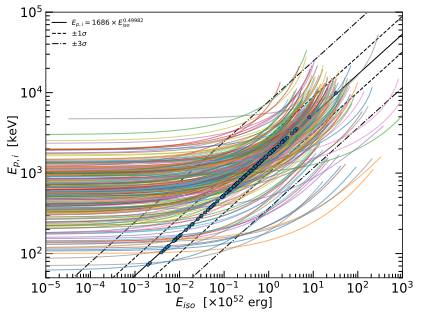

In [143]:
## plottting

plt.xscale('log')
plt.yscale('log')

plt.xlim([1e-5,1e3])#([1e50,1e55])
plt.ylim([50,1e5])  #([100,2*10**4])

# plt.grid(True, which='both', lw = 0.3, zorder=0)
plt.xlabel(r'$E_{iso}$  [$\times10^{52}$ erg]',fontsize=12, labelpad=0)
plt.ylabel('$E_{p,i}$  [keV]',fontsize=12,labelpad=0)

plt.tick_params(axis='x', labelbottom=True, labeltop=False)
plt.tick_params(axis='x', which='major', direction='in', pad=5, top=False, bottom=True, length=7, width=1, colors='black', grid_alpha=1.0, labelsize=13)
plt.tick_params(axis='x', which='minor', direction='in', pad=5, top=False, bottom=True, length=4, width=1, colors='black', grid_alpha=1.0, labelsize=13)
plt.tick_params(axis='y', labelleft=True, labelright=False)
plt.tick_params(axis='y', which='major', direction='in', pad=3, left=True, right=True, length=7, width=1, colors='black', grid_alpha=1.0, labelsize=13)
plt.tick_params(axis='y', which='minor', direction='in', pad=3, left=True, right=True, length=4, width=1, colors='black', grid_alpha=1.0, labelsize=13)

xew1 = np.linspace(1e-6,1e5)
# plt.plot(xew1, 10**3.23197*(xew1)**0.50569, color='black', lw=1.0, zorder=2, label=r'$E_{p,i}=10^{3.23197}\times E_{iso}^{0.50569}$')
# plt.plot(xew1, 10**3.22691*(xew1)**0.49982, color='black', lw=1.0, zorder=2, label=r'$E_{p,i}=10^{3.22691}\times E_{iso}^{0.49982}$')
plt.plot(xew1, 1686*(xew1)**0.49982, color='black', lw = 1.0, zorder=2, label=r'$E_{p,i}=1686\times E_{iso}^{0.49982}$')
plt.plot(xew1, 10**(3.22691+0.22150)*(xew1)**0.49982, linestyle='--', color='black', lw=1.0, zorder=2, label=r'$\pm1\sigma$')
plt.plot(xew1, 10**(3.22691-0.22150)*(xew1)**0.49982, linestyle='--', color='black', lw=1.0, zorder=2)
plt.plot(xew1, 10**(3.22691+3*0.22150)*(xew1)**0.49982, linestyle='-.', color='black', lw=1.0, zorder=2, label=r'$\pm3\sigma$')
plt.plot(xew1, 10**(3.22691-3*0.22150)*(xew1)**0.49982, linestyle='-.', color='black', lw=1.0, zorder=2)

plt.plot(curve_x[:,0:223], curve_y[:,0:223], lw=1.0, zorder=2, alpha=0.60)

plt.scatter(mlip[:,0]/1e52, mlip[:,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s3pip[:,0]/1e52, s3pip[:,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s1pip[:,0]/1e52, s1pip[:,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s1mip[:,0]/1e52, s1mip[:,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s3mip[:,0]/1e52, s3mip[:,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)

plt.legend(loc=2,frameon=False,fontsize=7)
plt.show()

# plt.savefig('epeak-eiso-sgrb_synth_z_whole_catalogue3.svg', format='svg', dpi=1200);
# plt.savefig('epeak-eiso-sgrb_synth_z_whole_catalogue3.eps', format='eps', dpi=1200);
# plt.savefig('epeak-eiso-sgrb_synth_z_whole_catalogue3.pdf', format='pdf', dpi=1200);
# plt.savefig('epeak-eiso-sgrb_synth_z_whole_catalogue3.png', format='png', dpi=1200);

#plot template
from numpy.random import rand
import matplotlib
# matplotlib.use('gtkagg')
import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')
plt.style.use('default')
# sns.set_style('white')

fig, ax = plt.subplots(figsize=(20,12))
ax0 = plt.subplot(122)
ax1 = plt.subplot(121)

ax0.legend(loc=2, frameon=True, fontsize=14, title='Spin-down', title_fontsize=15)
ax0.set_xlabel('P [ s ]', fontsize=20)
ax0.set_ylabel('(dP / dt)   [ s s$^{-1}$]', fontsize=20)
ax0.yaxis.set_label_position("right")
ax0.set_xlim(1e-2, 2e4)
ax0.set_ylim(1e-13, 1e-6)
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.tick_params(axis='y', labelleft=False, labelright=True)
ax0.tick_params(axis='both', which='major', direction='in', pad=10, top=True, left=True, right=True, length=10, width=1, colors='black', grid_alpha=1.0, labelsize=20)
ax0.tick_params(axis='both', which='minor', direction='in', pad=10, top=True, left=True, right=True, length=5, width=1, colors='black', grid_alpha=1.0, labelsize=20)

ax1.legend(loc=2, frameon=True, fontsize=14, title='Spin-up', title_fontsize=15)
ax1.set_xlabel('P [ s ]', fontsize=20)
ax1.set_ylabel('(dP / dt)   [ s s$^{-1}$]', fontsize=20)
ax1.yaxis.set_label_position("left")
ax1.set_xlim(1, 1.5e4)
ax1.set_ylim(1e-12, 0.00001)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.tick_params(axis='y', labelleft=True, labelright=False)
ax1.tick_params(axis='both', which='major', direction='in', pad=10, top=True, left=True, right=True, length=10, width=1, colors='black', grid_alpha=1.0, labelsize=20)
ax1.tick_params(axis='both', which='minor', direction='in', pad=10, top=True, left=True, right=True, length=5, width=1, colors='black', grid_alpha=1.0, labelsize=20)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [35]:
#10**3.23197 = 1705.9645410772034 = 1706

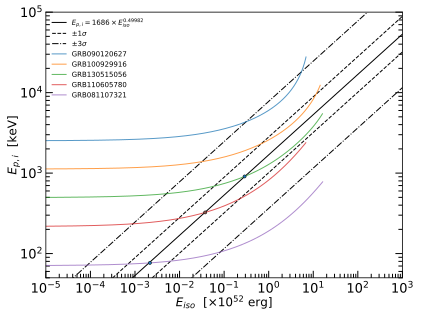

In [144]:
plt.xscale('log')
plt.yscale('log')

plt.xlim([1e-5,1e3])#([1e-6,1e3])#([1e50,1e55])
plt.ylim([50,1e5])  #([50,1e5])#([100,2*10**4])

#plt.grid(True, which='both', lw = 0.3, zorder=0)
plt.xlabel(r'$E_{iso}$  [$\times10^{52}$ erg]',fontsize=12, labelpad=0)
plt.ylabel('$E_{p,i}$  [keV]',fontsize=12,labelpad=0)
plt.tick_params(axis='x', labelbottom=True, labeltop=False)
plt.tick_params(axis='x', which='major', direction='in', pad=5, top=False, bottom=True, length=7, width=1, colors='black', grid_alpha=1.0, labelsize=13)
plt.tick_params(axis='x', which='minor', direction='in', pad=5, top=False, bottom=True, length=4, width=1, colors='black', grid_alpha=1.0, labelsize=13)
plt.tick_params(axis='y', labelleft=True, labelright=False)
plt.tick_params(axis='y', which='major', direction='in', pad=3, left=True, right=True, length=7, width=1, colors='black', grid_alpha=1.0, labelsize=13)
plt.tick_params(axis='y', which='minor', direction='in', pad=3, left=True, right=True, length=4, width=1, colors='black', grid_alpha=1.0, labelsize=13)

xew1 = np.linspace(1e-6,1e5)
# plt.plot(xew1, 10**3.23197*(xew1)**0.50569, color='black', lw=1.0, zorder=2, label=r'$E_{p,i}=10^{3.23197}\times E_{iso}^{0.50569}$')
# plt.plot(xew1, 10**3.22691*(xew1)**0.49982, color='black', lw=1.0, zorder=2, label=r'$E_{p,i}=10^{3.22691}\times E_{iso}^{0.49982}$')
plt.plot(xew1, 1686*(xew1)**0.49982, color='black', lw = 1.0, zorder=2, label=r'$E_{p,i}=1686\times E_{iso}^{0.49982}$')
plt.plot(xew1, 10**(3.22691+0.221504)*(xew1)**0.49982, linestyle='--', color='black', lw=1.0, zorder=2, label=r'$\pm1\sigma$')
plt.plot(xew1, 10**(3.22691-0.221504)*(xew1)**0.49982, linestyle='--', color='black', lw=1.0, zorder=2)
plt.plot(xew1, 10**(3.22691+3*0.221504)*(xew1)**0.49982, linestyle='-.', color='black', lw=1.0, zorder=2, label=r'$\pm3\sigma$')
plt.plot(xew1, 10**(3.22691-3*0.221504)*(xew1)**0.49982, linestyle='-.', color='black', lw=1.0, zorder=2)

# plt.plot(curve_x[:,0], curve_y[:,0], lw=1.0, zorder=2, alpha=0.75, label=names[0])
plt.plot(curve_x[:,18], curve_y[:,18], lw=1.0, zorder=2, alpha=0.75, label=names[18])
plt.plot(curve_x[:,56], curve_y[:,56], lw=1.0, zorder=2, alpha=0.75, label=names[56])
plt.plot(curve_x[:,108], curve_y[:,108], lw=1.0, zorder=2, alpha=0.75, label=names[108])
plt.plot(curve_x[:,71], curve_y[:,71], lw=1.0, zorder=2, alpha=0.75, label=names[71])
plt.plot(curve_x[:,7], curve_y[:,7], lw=1.0, zorder=2, alpha=0.75, label=names[7])

# plt.scatter(mlip[0,0]/1e52, mlip[0,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
# plt.scatter(s3pip[0,0]/1e52, s3pip[0,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
# plt.scatter(s1pip[0,0]/1e52, s1pip[0,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
# plt.scatter(s1mip[0,0]/1e52, s1mip[0,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
# plt.scatter(s3mip[0,0]/1e52, s3mip[0,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)

plt.scatter(mlip[18,0]/1e52, mlip[18,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s3pip[18,0]/1e52, s3pip[18,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s1pip[18,0]/1e52, s1pip[18,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s1mip[18,0]/1e52, s1mip[18,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s3mip[18,0]/1e52, s3mip[18,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)

plt.scatter(mlip[56,0]/1e52, mlip[56,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s3pip[56,0]/1e52, s3pip[56,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s1pip[56,0]/1e52, s1pip[56,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s1mip[56,0]/1e52, s1mip[56,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s3mip[56,0]/1e52, s3mip[56,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)

plt.scatter(mlip[108,0]/1e52, mlip[108,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s3pip[108,0]/1e52, s3pip[108,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s1pip[108,0]/1e52, s1pip[108,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s1mip[108,0]/1e52, s1mip[108,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s3mip[108,0]/1e52, s3mip[108,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)

plt.scatter(mlip[71,0]/1e52, mlip[71,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s3pip[71,0]/1e52, s3pip[71,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s1pip[71,0]/1e52, s1pip[71,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s1mip[71,0]/1e52, s1mip[71,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s3mip[71,0]/1e52, s3mip[71,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)

plt.scatter(mlip[7,0]/1e52, mlip[7,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s3pip[7,0]/1e52, s3pip[7,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s1pip[7,0]/1e52, s1pip[7,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s1mip[7,0]/1e52, s1mip[7,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s3mip[7,0]/1e52, s3mip[7,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)

plt.legend(loc=2,frameon=False,fontsize=7)
plt.show()

# plt.savefig('epeak-eiso-sgrb_synth_z_line-sigma_crossing3.svg', dpi=1200);
# plt.savefig('epeak-eiso-sgrb_synth_z_line-sigma_crossing3.eps', dpi=1200);
# plt.savefig('epeak-eiso-sgrb_synth_z_line-sigma_crossing3.pdf', dpi=1200);
# plt.savefig('epeak-eiso-sgrb_synth_z_line-sigma_crossing3.png', dpi=1200);

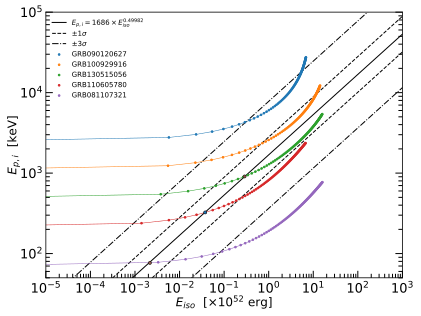

In [145]:
plt.xscale('log')
plt.yscale('log')

plt.xlim([1e-5,1e3])#([1e-6,1e3])#([1e50,1e55])
plt.ylim([50,1e5])  #([50,1e5])#([100,2*10**4])

#plt.grid(True, which='both', lw = 0.3, zorder=0)
plt.xlabel(r'$E_{iso}$  [$\times10^{52}$ erg]',fontsize=12, labelpad=0)
plt.ylabel('$E_{p,i}$  [keV]',fontsize=12,labelpad=0)
plt.tick_params(axis='x', labelbottom=True, labeltop=False)
plt.tick_params(axis='x', which='major', direction='in', pad=5, top=False, bottom=True, length=7, width=1, colors='black', grid_alpha=1.0, labelsize=13)
plt.tick_params(axis='x', which='minor', direction='in', pad=5, top=False, bottom=True, length=4, width=1, colors='black', grid_alpha=1.0, labelsize=13)
plt.tick_params(axis='y', labelleft=True, labelright=False)
plt.tick_params(axis='y', which='major', direction='in', pad=3, left=True, right=True, length=7, width=1, colors='black', grid_alpha=1.0, labelsize=13)
plt.tick_params(axis='y', which='minor', direction='in', pad=3, left=True, right=True, length=4, width=1, colors='black', grid_alpha=1.0, labelsize=13)

xew1 = np.linspace(1e-6,1e5)
# plt.plot(xew1, 10**3.23197*(xew1)**0.50569, color='black', lw=1.0, zorder=2, label=r'$E_{p,i}=10^{3.23197}\times E_{iso}^{0.50569}$')
# plt.plot(xew1, 10**3.22691*(xew1)**0.49982, color='black', lw=1.0, zorder=2, label=r'$E_{p,i}=10^{3.22691}\times E_{iso}^{0.49982}$')
plt.plot(xew1, 1686*(xew1)**0.49982, color='black', lw = 1.0, zorder=2, label=r'$E_{p,i}=1686\times E_{iso}^{0.49982}$')
plt.plot(xew1, 10**(3.22691+0.221504)*(xew1)**0.49982, linestyle='--', color='black', lw=1.0, zorder=2, label=r'$\pm1\sigma$')
plt.plot(xew1, 10**(3.22691-0.221504)*(xew1)**0.49982, linestyle='--', color='black', lw=1.0, zorder=2)
plt.plot(xew1, 10**(3.22691+3*0.221504)*(xew1)**0.49982, linestyle='-.', color='black', lw=1.0, zorder=2, label=r'$\pm3\sigma$')
plt.plot(xew1, 10**(3.22691-3*0.221504)*(xew1)**0.49982, linestyle='-.', color='black', lw=1.0, zorder=2)

plt.scatter(curve_x[::100,18], curve_y[::100,18], zorder=2, s=3.0, label=names[18])
plt.plot(curve_x[::100,18], curve_y[::100,18], zorder=2, lw=0.5)
plt.scatter(curve_x[::100,56], curve_y[::100,56], zorder=2, s=3.0, label=names[56])
plt.plot(curve_x[::100,56], curve_y[::100,56], zorder=2, lw=0.5)
plt.scatter(curve_x[::100,108], curve_y[::100,108], zorder=2, s=3.0, label=names[108])
plt.plot(curve_x[::100,108], curve_y[::100,108], zorder=2, lw=0.5)
plt.scatter(curve_x[::100,71], curve_y[::100,71], zorder=2, s=3.0, label=names[71])
plt.plot(curve_x[::100,71], curve_y[::100,71], zorder=2, lw=0.5)
plt.scatter(curve_x[::100,7], curve_y[::100,7], zorder=2, s=3.0, label=names[7])
plt.plot(curve_x[::100,7], curve_y[::100,7], zorder=2, lw=0.5)

plt.scatter(mlip[18,0]/1e52, mlip[18,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s3pip[18,0]/1e52, s3pip[18,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s1pip[18,0]/1e52, s1pip[18,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s1mip[18,0]/1e52, s1mip[18,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s3mip[18,0]/1e52, s3mip[18,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)

plt.scatter(mlip[56,0]/1e52, mlip[56,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s3pip[56,0]/1e52, s3pip[56,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s1pip[56,0]/1e52, s1pip[56,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s1mip[56,0]/1e52, s1mip[56,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s3mip[56,0]/1e52, s3mip[56,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)

plt.scatter(mlip[108,0]/1e52, mlip[108,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s3pip[108,0]/1e52, s3pip[108,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s1pip[108,0]/1e52, s1pip[108,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s1mip[108,0]/1e52, s1mip[108,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s3mip[108,0]/1e52, s3mip[108,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)

plt.scatter(mlip[71,0]/1e52, mlip[71,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s3pip[71,0]/1e52, s3pip[71,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s1pip[71,0]/1e52, s1pip[71,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s1mip[71,0]/1e52, s1mip[71,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s3mip[71,0]/1e52, s3mip[71,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)

plt.scatter(mlip[7,0]/1e52, mlip[7,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s3pip[7,0]/1e52, s3pip[7,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s1pip[7,0]/1e52, s1pip[7,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s1mip[7,0]/1e52, s1mip[7,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s3mip[7,0]/1e52, s3mip[7,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)

plt.legend(loc=2,frameon=False,fontsize=7)
plt.show()

# plt.savefig('epeak-eiso-sgrb_synth_z_line-sigma_crossing_joint_dots2.svg', dpi=1200);
# plt.savefig('epeak-eiso-sgrb_synth_z_line-sigma_crossing_joint_dots2.eps', dpi=1200);
# plt.savefig('epeak-eiso-sgrb_synth_z_line-sigma_crossing_joint_dots2.pdf', dpi=1200);
# plt.savefig('epeak-eiso-sgrb_synth_z_line-sigma_crossing_joint_dots2.png', dpi=1200);

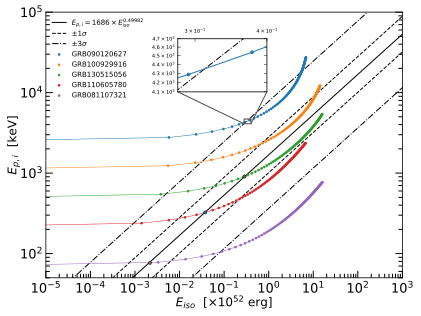

In [193]:
import matplotlib.colors as mcolors
import matplotlib.patches as mpatch

overlap = {name for name in mcolors.CSS4_COLORS
           if f'xkcd:{name}' in mcolors.XKCD_COLORS}

from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset)

fig, ax1 = plt.subplots()

ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.set_xlim([1e-5,1e3])#([1e-6,1e3])#([1e50,1e55])
ax1.set_ylim([50,1e5])  #([50,1e5])#([100,2*10**4])

ax1.set_xlabel(r'$E_{iso}$  [$\times10^{52}$ erg]',fontsize=12, labelpad=0)
ax1.set_ylabel('$E_{p,i}$  [keV]',fontsize=12,labelpad=0)
plt.tick_params(axis='x', labelbottom=True, labeltop=False)
plt.tick_params(axis='x', which='major', direction='in', pad=5, top=False, bottom=True, length=7, width=1, colors='black', grid_alpha=1.0, labelsize=13)
plt.tick_params(axis='x', which='minor', direction='in', pad=5, top=False, bottom=True, length=4, width=1, colors='black', grid_alpha=1.0, labelsize=13)
plt.tick_params(axis='y', labelleft=True, labelright=False)
plt.tick_params(axis='y', which='major', direction='in', pad=3, left=True, right=True, length=7, width=1, colors='black', grid_alpha=1.0, labelsize=13)
plt.tick_params(axis='y', which='minor', direction='in', pad=3, left=True, right=True, length=4, width=1, colors='black', grid_alpha=1.0, labelsize=13)

xew1 = np.linspace(1e-6,1e5)
# plt.plot(xew1, 10**3.23197*(xew1)**0.50569, color='black', lw=1.0, zorder=2, label=r'$E_{p,i}=10^{3.23197}\times E_{iso}^{0.50569}$')
# plt.plot(xew1, 10**3.22691*(xew1)**0.49982, color='black', lw=1.0, zorder=2, label=r'$E_{p,i}=10^{3.22691}\times E_{iso}^{0.49982}$')
ax1.plot(xew1, 1686*(xew1)**0.49982, color='black', lw = 1.0, zorder=2, label=r'$E_{p,i}=1686\times E_{iso}^{0.49982}$')
ax1.plot(xew1, 10**(3.22691+0.221504)*(xew1)**0.49982, linestyle='--', color='black', lw=1.0, zorder=2, label=r'$\pm1\sigma$')
ax1.plot(xew1, 10**(3.22691-0.221504)*(xew1)**0.49982, linestyle='--', color='black', lw=1.0, zorder=2)
ax1.plot(xew1, 10**(3.22691+3*0.221504)*(xew1)**0.49982, linestyle='-.', color='black', lw=1.0, zorder=2, label=r'$\pm3\sigma$')
ax1.plot(xew1, 10**(3.22691-3*0.221504)*(xew1)**0.49982, linestyle='-.', color='black', lw=1.0, zorder=2)

ax1.scatter(curve_x[::100,18], curve_y[::100,18], zorder=2, s=3.0, label=names[18])
ax1.plot(curve_x[::100,18], curve_y[::100,18], zorder=2, lw=0.5)
ax1.scatter(curve_x[::100,56], curve_y[::100,56], zorder=2, s=3.0, label=names[56])
ax1.plot(curve_x[::100,56], curve_y[::100,56], zorder=2, lw=0.5)
ax1.scatter(curve_x[::100,108], curve_y[::100,108], zorder=2, s=3.0, label=names[108])
ax1.plot(curve_x[::100,108], curve_y[::100,108], zorder=2, lw=0.5)
ax1.scatter(curve_x[::100,71], curve_y[::100,71], zorder=2, s=3.0, label=names[71])
ax1.plot(curve_x[::100,71], curve_y[::100,71], zorder=2, lw=0.5)
ax1.scatter(curve_x[::100,7], curve_y[::100,7], zorder=2, s=3.0, label=names[7])
ax1.plot(curve_x[::100,7], curve_y[::100,7], zorder=2, lw=0.5)

ax1.scatter(mlip[18,0]/1e52, mlip[18,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
ax1.scatter(s3pip[18,0]/1e52, s3pip[18,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
ax1.scatter(s1pip[18,0]/1e52, s1pip[18,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
ax1.scatter(s1mip[18,0]/1e52, s1mip[18,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
ax1.scatter(s3mip[18,0]/1e52, s3mip[18,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)

ax1.scatter(mlip[56,0]/1e52, mlip[56,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
ax1.scatter(s3pip[56,0]/1e52, s3pip[56,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
ax1.scatter(s1pip[56,0]/1e52, s1pip[56,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
ax1.scatter(s1mip[56,0]/1e52, s1mip[56,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
ax1.scatter(s3mip[56,0]/1e52, s3mip[56,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)

ax1.scatter(mlip[108,0]/1e52, mlip[108,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
ax1.scatter(s3pip[108,0]/1e52, s3pip[108,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
ax1.scatter(s1pip[108,0]/1e52, s1pip[108,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
ax1.scatter(s1mip[108,0]/1e52, s1mip[108,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
ax1.scatter(s3mip[108,0]/1e52, s3mip[108,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)

ax1.scatter(mlip[71,0]/1e52, mlip[71,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
ax1.scatter(s3pip[71,0]/1e52, s3pip[71,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
ax1.scatter(s1pip[71,0]/1e52, s1pip[71,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
ax1.scatter(s1mip[71,0]/1e52, s1mip[71,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
ax1.scatter(s3mip[71,0]/1e52, s3mip[71,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)

ax1.scatter(mlip[7,0]/1e52, mlip[7,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
ax1.scatter(s3pip[7,0]/1e52, s3pip[7,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
ax1.scatter(s1pip[7,0]/1e52, s1pip[7,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
ax1.scatter(s1mip[7,0]/1e52, s1mip[7,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
ax1.scatter(s3mip[7,0]/1e52, s3mip[7,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)


# Create a set of inset Axes: these should fill the bounding box allocated to them.
ax2 = plt.axes([0.25,4000,0.4,4800])#[s3pip[18,0]/1e52-s3pip[18,0]/1e55,s3pip[18,0]/1e52+s3pip[18,0]/1e55,s3pip[18,1]-10,s3pip[18,1]+10])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.37,0.7,0.25,0.20])
ax2.set_axes_locator(ip)
# Mark the region corresponding to the inset axes on ax1 and draw lines in grey linking the two axes.
mark_inset(ax1, ax2, loc1=3, loc2=4, fc="none", ec='0.3',zorder=4)

ax2.set_xscale('log')
ax2.set_yscale('log')

ax2.plot(xew1, 10**(3.22691+3*0.22150)*(xew1)**0.49982, linestyle='-.', color='black', lw=1.0, zorder=2)
ax2.scatter(curve_x[::100,18], curve_y[::100,18], zorder=3, s=7.0)
ax2.plot(curve_x[::100,18], curve_y[::100,18], zorder=2, lw=1.0)
ax2.scatter(s3pip[18,0]/1e52, s3pip[18,1], s=10.0, edgecolors='black', color='#FF81C0', linewidths=0.5, zorder=3)

# ax2.legend(loc=0)

# # Some ad hoc tweaks.
ax2.set_xlim([0.28,0.4])
ax2.set_ylim([4.1e3,4.7e3])
ax2.set_xticks(np.arange(2.0e-1,4.15e-1))
ax2.set_yticks(np.arange(4e3,5e3,1e3))
ax2.set_xticklabels(ax2.get_xticks(), backgroundcolor='w')

ax2.tick_params(axis='x', rotation=45, labeltop=True, labelbottom=False)
# ax2.set_xticks([3e-1, 3.5e-1])
ax2.tick_params(axis='x', which='major', direction='in', pad=5, top=True, bottom=False, length=5, width=0.5, colors='black', grid_alpha=1.0, labelsize=5)
ax2.tick_params(axis='x', which='minor', direction='in', pad=5, top=True, bottom=False, length=3, width=0.5, colors='black', grid_alpha=1.0, labelsize=5)
ax2.tick_params(axis='y', labelleft=True, labelright=False)
ax2.tick_params(axis='y', which='major', direction='in', pad=3, left=True, right=True, length=5, width=0.5, colors='black', grid_alpha=1.0, labelsize=5)
ax2.tick_params(axis='y', which='minor', direction='in', pad=3, left=True, right=True, length=3, width=0.5, colors='black', grid_alpha=1.0, labelsize=5)


ax1.legend(loc=2,frameon=False,fontsize=7)
plt.show()

# plt.savefig('epeak-eiso-sgrb_synth_z_line-sigma_crossing_joint_dots3.svg', dpi=1200);
# plt.savefig('epeak-eiso-sgrb_synth_z_line-sigma_crossing_joint_dots3.eps', dpi=1200);
# plt.savefig('epeak-eiso-sgrb_synth_z_line-sigma_crossing_joint_dots3.pdf', dpi=1200);
# plt.savefig('epeak-eiso-sgrb_synth_z_line-sigma_crossing_joint_dots3.png', dpi=1200);

## known z point calculation with plotting

In [118]:
sgrb_z_14_names = np.loadtxt('sgrb_z_16_names.txt', skiprows=1, usecols=1, delimiter=',', dtype='str')
sgrb_z_14_names = sgrb_z_14_names[0:14] ##we skip last 2 objects because they are of 2021
sgrb_z_14_times = np.loadtxt('sgrb_z_16_names.txt', skiprows=1, usecols=2, delimiter=',', dtype='float')
sgrb_z_14_times = sgrb_z_14_times[0:14] ##we skip last 2 objects because they are of 2021
sgrb_z_14_redshift = np.loadtxt('sgrb_z_16_names.txt', skiprows=1, usecols=3, delimiter=',', dtype='float')
sgrb_z_14_redshift = sgrb_z_14_redshift[0:14] ##we skip last 2 objects because they are of 2021
sgrb_z_14_names, sgrb_z_14_times, sgrb_z_14_redshift

(array(['GRB080905499', 'GRB090510016', 'GRB090927422', 'GRB100117879',
        'GRB100206563', 'GRB100216422', 'GRB100625773', 'GRB111117510',
        'GRB131004904', 'GRB150101641', 'GRB160624477', 'GRB160821937',
        'GRB200826187', 'GRB201221963'], dtype='<U12'),
 array([0.96 , 0.96 , 0.512, 0.256, 0.176, 0.192, 0.24 , 0.432, 1.152,
        0.08 , 0.384, 1.088, 1.136, 0.144]),
 array([0.1218, 0.903 , 1.37  , 0.92  , 0.41  , 0.038 , 0.452 , 2.211 ,
        0.717 , 0.134 , 0.483 , 0.16  , 0.7481, 1.046 ]))

In [120]:
path='browse_results-3.fits'
names_and_model = myastro.get_all_names_with_model(path)

names_and_model_redshift = []
names_redshift = []
model_redshift = []
redshift_location = []
counter_location = []

for i in sgrb_z_14_names:
    counter22 = 0
    while (counter22 < len(names_and_model[0])):
        if str(i)==str(names_and_model[0][counter22]):
            names_redshift.append(names_and_model[0][counter22])
            model_redshift.append(names_and_model[1][counter22])
#             redshift_redshift = np.append(redshift_location, counter22)
            counter_location.append(counter22)
        counter22 += 1
names_and_model_redshift = np.vstack((names_redshift, model_redshift, sgrb_z_14_redshift))
names_and_model_redshift, counter_location

(array([['GRB080905499', 'GRB090510016', 'GRB090927422', 'GRB100117879',
         'GRB100206563', 'GRB100216422', 'GRB100625773', 'GRB111117510',
         'GRB131004904', 'GRB150101641', 'GRB160624477', 'GRB160821937',
         'GRB200826187', 'GRB201221963'],
        ['flnc_plaw', 'flnc_comp', 'flnc_plaw', 'flnc_comp', 'flnc_comp',
         'flnc_comp', 'flnc_comp', 'flnc_comp', 'flnc_comp', 'flnc_plaw',
         'flnc_plaw', 'flnc_plaw', '', ''],
        ['0.1218', '0.903', '1.37', '0.92', '0.41', '0.038', '0.452',
         '2.211', '0.717', '0.134', '0.483', '0.16', '0.7481', '1.046']],
       dtype='<U32'),
 [5, 46, 60, 71, 73, 75, 86, 133, 204, 251, 307, 315, 470, 485])

In [121]:
# path='browse_results_488_sgrbs_2021-01-01.fits'
names_location = np.array([],dtype='int')
for i in sgrb_z_14_names:
    counter55 = 0
    for j in names_and_model[0]:
        if i==j:
            names_location = np.append(names_location, counter55)
        counter55 += 1

In [123]:
# names[27], names[42], names[43], names[44], names[51], names[80], names[116]
names_location

array([  5,  46,  60,  71,  73,  75,  86, 133, 204, 251, 307, 315, 470,
       485])

In [124]:
names_and_model[0].shape

(561,)

In [125]:
nmsorted_redshift = myastro.sort_name_by_models(names_and_model_redshift)
counter_location_comp = np.array([],dtype='int')
for i in nmsorted_redshift[0]:
    counter66 = 0
    for j in names_and_model[0]:
        if i==j:
            counter_location_comp = np.append(counter_location_comp, counter66)
        counter66 += 1
counter_location_comp
# names_and_model_redshift

AttributeError: 'numpy.ndarray' object has no attribute 'work_models'

### here we calculate Epeak,i and Eiso for sgrbs with a given measured redshift

In [126]:
#defining the catalog file and looking at its content
path='browse_results-3.fits'
short_catalog_new = path;
short_list = fits.open(short_catalog_new); #we assign image_file to hdu_list package
#short_list.info()
short_data = short_list[1].data;
short_list[1].header;
#short_data.columns

In [127]:
namelistshort = short_data['NAME']
triggertimelistshort = short_data['TRIGGER_TIME'] #given in Modified Julian Date---MJD; use xTime to convert if needed https://heasarc.nasa.gov/cgi-bin/Tools/xTime/xTime.pl
t90listshort = short_data['T90']
t90errorlistshort = short_data['T90_ERROR']
fluencedurationlistshort = short_data['FLNC_SPECTRUM_STOP'] - short_data['FLNC_SPECTRUM_START']

###cutoff power-law: alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dEpeak, dNormalization
shortcplalpha = -1 * short_data['FLNC_COMP_INDEX']
shortcplePeak = short_data['FLNC_COMP_EPEAK']
shortcplePiv = short_data['FLNC_COMP_PIVOT']
shortcplnormalization = short_data['FLNC_COMP_AMPL']
shortcplduration = short_data['FLNC_SPECTRUM_STOP'] - short_data['FLNC_SPECTRUM_START']
shortcplredshift1 = np.ones(short_data.shape[0])
shortcplredshift2 = np.full((short_data.shape[0]),2)
shortcplredshift05 = np.full((short_data.shape[0]),0.5)
shortcpllower = np.full((short_data.shape[0]),1)
shortcplupper = np.full((short_data.shape[0]),10**4)
shortcpldAlpha = short_data['FLNC_COMP_INDEX_POS_ERR']
shortcpldEpeak = short_data['FLNC_COMP_EPEAK_POS_ERR']
shortcpldNormalization = short_data['FLNC_COMP_AMPL_POS_ERR']

#
fluencebestfitlistshort = short_data['FLNC_BEST_FITTING_MODEL']#['Flnc_Best_Fitting_Model']
#tstartlist = short_data['T90_START']
#triglist = short_data['TRIGGER_NAME']
#namelist.shape #to check the dimension

burstsshort = np.vstack([namelistshort,triggertimelistshort,fluencedurationlistshort,fluencebestfitlistshort]).T #numpy.vstack stands for merge vertically
burstsless2sec = np.vstack([namelistshort,t90listshort]).T #numpy.vstack stands for merge vertically

fluencebestfitlistshort.shape
#plredshift.shape
#np.full((1,444),10)
print(burstsshort.ndim) #number of dimensions of the array
burstsshort.shape[0] #number of (raws, columns) of the array
# burstsshort
#fluencebestfitlistshort
#burstsless2sec.shape

2


561

In [128]:
nmsorted_redshift, counter_location_comp

NameError: name 'nmsorted_redshift' is not defined

In [129]:
def _luminosityDistance(redshift):
    dH = c*mpcToCm/kmToCm/H0
    function = lambda x: (1/np.sqrt(omegaM*(1+x)**3+omegaK*(1+x)**2+omegaL))
    lower, upper = 0, redshift
    luminosityDistance =  dH *(1+redshift) * quad(function,lower,upper)[0]
    return luminosityDistance

In [130]:
def _luminosityArea(redshift):
    luminosityDistance = _luminosityDistance(redshift)
    luminosityArea = 4 * pi * luminosityDistance**2
    return luminosityArea

In [131]:
# ------------------ CUTOFF POWER-LAW ------------------

def _cutoffPLFlux(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper):
    ## model parameters are from the fitting result in observer's frame.
    ## integration from lower/(1+z) to upper/(1+z) in the observer's frame,
    ## which are the corrsponding energy from lower to upper in the rest frame. 
    ## set redshift = 0 in order to compute the flux in observer's frame.
    
    # if no data or bad data, return.
    if (normalization <= 0 ): return 0
    if (ePeak <= 0 ): return 0
    lower, upper = lower/(1+redshift), upper/(1+redshift)
    function = lambda x: normalization*x*(x/ePiv)**(-alpha)*np.exp(-x*(2-alpha)/ePeak)

    #QAGS adaptive integration
    flux = quad( function, lower, upper)[0]
    return flux



def _cutoffPLEnergy(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper):
    # in order to have isotropic energy in the rest frame from E1 to E2,
    # we need to integrate in the observer's frame from E1/(1+z) to E2/(1+z), then divide by (1+z) for the total energy.
    # (E/50.0)**(-a)*np.exp(-E*(2.0-a)/b)
    # alpha is usually positive by default
        
    flux = _cutoffPLFlux(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper)
    area = _luminosityArea(redshift)
    isotropicEnergy =  kevToErg * area *  duration * flux / (1+redshift)

    return  isotropicEnergy

    
def _cutoffPLFluxErr(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dEpeak, dNormalization):
    ## model parameters are from the fitting result in observer's frame.
    ## integration from lower/(1+z) to upper/(1+z) in the observer's frame,
    ## which are the corrsponding energy from lower to upper in the rest frame. 
    ## set redshift = 0 in order to compute the flux in observer's frame.
    
    # if no data or bad data, return.
    if (normalization <= 0 ): return 0
    if (ePeak <= 0 ): return 0
    if (dAlpha == ""): return 0
    if (dEpeak == ""): return 0 
    if (dNormalization == ""): return 0
    
    lower, upper = lower/(1+redshift), upper/(1+redshift)

    # Rest frame
    ## Uncertainty from normalization
    f_dF_dNorm = lambda x: x*(x/ePiv)**(-alpha)*np.exp(x*(alpha-2)/ePeak) 
    #QAGS adaptive integration
    dF_dNorm = quad( f_dF_dNorm, lower, upper)[0]

    ## Uncertainty from alpha
    f_dF_dAlpha = lambda x: (np.log(x/ePiv)-x/ePeak) * normalization*x*(x/ePiv)**(-alpha)*np.exp(x*(alpha-2)/ePeak)   
    #QAGS adaptive integration
    dF_dAlpha = quad( f_dF_dAlpha, lower, upper)[0]

    ## Uncertainty from ePeak
    f_dF_dEpeak = lambda x: (x*(2-alpha)/ePeak**2)*normalization*x*(x/ePiv)**(-alpha)*np.exp(x*(alpha-2)/ePeak)
    #QAGS adaptive integration
    dF_dEpeak = quad( f_dF_dEpeak, lower, upper)[0]

    fluxErr = np.sqrt((dF_dNorm*dNormalization)**2+(dF_dAlpha*dAlpha)**2+(dF_dEpeak*dEpeak)**2)

    return fluxErr

    
def _cutoffPLEnergyErr(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dEpeak, dNormalization):
    
    # in order to have isotropic energy in the rest frame from E1 to E2,
    # we need to integrate in the observer's frame from E1/(1+z) to E2/(1+z), then divide by (1+z) for the total energy.
    # (E/50.0)**(-a)*np.exp(-E*(2.0-a)/b)
    # alpha is usually positive by default
    
    cutoffPLFluxErr = _cutoffPLFluxErr(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dEpeak, dNormalization)
    area = _luminosityArea(redshift)
    isotropicEnergyErr =  kevToErg * area * duration * cutoffPLFluxErr / (1+redshift) 
    
    return isotropicEnergyErr


def _cutoffPLK(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper):
    
    fluxObs = _cutoffPLFlux(alpha, ePeak, ePiv, normalization, duration, 0, lower, upper)
    fluxRest = _cutoffPLFlux(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper)

    if fluxObs == 0: return 0
    k = fluxRest/fluxObs
    
    return k


def _cutoffPLKErr(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dEpeak, dNormalization):
    
    fluxObs = _cutoffPLFlux(alpha, ePeak, ePiv, normalization, duration, 0, lower, upper)
    fluxObsErr = _cutoffPLFluxErr(alpha, ePeak, ePiv, normalization, duration, 0, lower, upper, dAlpha, dEpeak, dNormalization)
    fluxRest = _cutoffPLFlux(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper)
    fluxRestErr = _cutoffPLFluxErr(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dEpeak, dNormalization)
    
    if fluxObs == 0: return 0
    
    # uncertainty from flux in observer's frame
    kObsErr = - fluxObsErr*fluxRest/fluxObs**2
    
    # uncertainty from flux in observer's frame
    kRestErr =  fluxRestErr/fluxObs
    
    kErr = np.sqrt(kObsErr**2+kRestErr**2)
    
    return kErr

In [132]:
burstsshort.shape

(561, 4)

In [134]:
###
###we check for models to be read
comp88short=0
numplePiv88short=0
counter88short=0
smallcounter = 0
Eisocalcshort = np.array([],dtype=float)
Epeakcalcshort = np.array([],dtype=float)
counter_location_comp = [46,  71,  73,  75,  86, 133, 204];
sgrb_real_redshifts = np.array([],dtype='float')
sgrb_real_names = np.array([],dtype='float')

for i in names_and_model_redshift[1,:]:#burstsshort[(46,  71,  73,  75,  86, 133, 204),3]:
    print(names_and_model_redshift[0,counter88short])
    print(i)
    print(counter88short)
    if i=="flnc_comp":#"FLNC_COMP":#"FLNC_COMP              ":    
        comp88short+=1
#         print(comp88short)
#         print(counter88short)
        alpha = shortcplalpha[counter_location_comp[smallcounter]]
#         print(alpha)
        ePeak = shortcplePeak[counter_location_comp[smallcounter]]
        ePiv = shortcplePiv[counter_location_comp[smallcounter]]
        normalization = shortcplnormalization[counter_location_comp[smallcounter]]
        duration = shortcplduration[counter_location_comp[smallcounter]]
        redshift_real = float(names_and_model_redshift[2,counter88short])
        print(redshift_real)
        sgrb_real_redshifts = np.append(sgrb_real_redshifts, redshift_real)
        sgrb_real_names = np.append(sgrb_real_names, names_and_model_redshift[0,counter88short])
#         print(names_and_model_redshift[0,counter88short])
        print('__________________')
        lower = shortcpllower[counter_location_comp[smallcounter]]
        upper = shortcplupper[counter_location_comp[smallcounter]]
        dAlpha = shortcpldAlpha[counter_location_comp[smallcounter]]
        dEpeak = shortcpldEpeak[counter_location_comp[smallcounter]]
        dNormalization = shortcpldNormalization[counter_location_comp[smallcounter]]
        cplEisoshort88short = _cutoffPLEnergy(alpha, ePeak, ePiv, normalization, duration, redshift_real, lower, upper)
        Epeakcalcshort = np.append(Epeakcalcshort,ePeak*(1+redshift_real))
        Eisocalcshort = np.append(Eisocalcshort,cplEisoshort88short)
        smallcounter += 1
#         counter88short+=1
    else:
        print('inconsistent model')
        print(names_and_model_redshift[2,counter88short])
        print('__________________')
        redshift_real = float(names_and_model_redshift[2,counter88short])
#     print(counter88short)
    counter88short+=1
# print(comp88short)
print(counter88short)
print(Eisocalcshort, Epeakcalcshort)

GRB080905499
flnc_plaw
0
inconsistent model
0.1218
__________________
GRB090510016
flnc_comp
1
0.903
__________________
GRB090927422
flnc_plaw
2
inconsistent model
1.37
__________________
GRB100117879
flnc_comp
3
0.92
__________________
GRB100206563
flnc_comp
4
0.41
__________________
GRB100216422
flnc_comp
5
0.038
__________________
GRB100625773
flnc_comp
6
0.452
__________________
GRB111117510
flnc_comp
7
2.211
__________________
GRB131004904
flnc_comp
8
0.717
__________________
GRB150101641
flnc_plaw
9
inconsistent model
0.134
__________________
GRB160624477
flnc_plaw
10
inconsistent model
0.483
__________________
GRB160821937
flnc_plaw
11
inconsistent model
0.16
__________________
GRB200826187

12
inconsistent model
0.7481
__________________
GRB201221963

13
inconsistent model
1.046
__________________
14
[2.36350956e+53 8.92579303e+50 5.06009780e+50 1.25766487e+48
 7.93867755e+50 1.54375745e+52 7.37447105e+50] [8995.591374   624.827328   749.870007   400.6915626  701.590428
 1745.5

In [135]:
names_and_model_redshift[1,:]

array(['flnc_plaw', 'flnc_comp', 'flnc_plaw', 'flnc_comp', 'flnc_comp',
       'flnc_comp', 'flnc_comp', 'flnc_comp', 'flnc_comp', 'flnc_plaw',
       'flnc_plaw', 'flnc_plaw', '', ''], dtype='<U32')

In [136]:
names_and_model_redshift.T

array([['GRB080905499', 'flnc_plaw', '0.1218'],
       ['GRB090510016', 'flnc_comp', '0.903'],
       ['GRB090927422', 'flnc_plaw', '1.37'],
       ['GRB100117879', 'flnc_comp', '0.92'],
       ['GRB100206563', 'flnc_comp', '0.41'],
       ['GRB100216422', 'flnc_comp', '0.038'],
       ['GRB100625773', 'flnc_comp', '0.452'],
       ['GRB111117510', 'flnc_comp', '2.211'],
       ['GRB131004904', 'flnc_comp', '0.717'],
       ['GRB150101641', 'flnc_plaw', '0.134'],
       ['GRB160624477', 'flnc_plaw', '0.483'],
       ['GRB160821937', 'flnc_plaw', '0.16'],
       ['GRB200826187', '', '0.7481'],
       ['GRB201221963', '', '1.046']], dtype='<U32')

In [137]:
# redshift_calculated = df['mlz'][27]
redshift_calculated1 = np.array([],dtype='float')
redshift_calculated1 = np.append(redshift_calculated1,(df['mlz'][27],df['mlz'][42],df['mlz'][43],df['+3sz'][44],df['mlz'][51],df['mlz'][80],df['mlz'][116]))
eiso_calculated1 = np.array([],dtype='float')
eiso_calculated1 = np.append(eiso_calculated1,(mlip[27,0],mlip[42,0],mlip[43,0],s3pip[44,0],mlip[51,0],mlip[80,0],mlip[116,0]))
epeak_calculated1 = np.array([],dtype='float')
epeak_calculated1 = np.append(epeak_calculated1,(mlip[27,1],mlip[42,1],mlip[43,1],s3pip[44,1],mlip[51,1],mlip[80,1],mlip[116,1]))
redshift_calculated1.shape

(7,)

In [138]:
sgrb_real = np.vstack((sgrb_real_names,np.round(sgrb_real_redshifts,5), np.round(Eisocalcshort,5), np.round(Epeakcalcshort,2), redshift_calculated1, eiso_calculated1, np.round(epeak_calculated1,2))).T
sgrb_real

array([['GRB090510016', '0.903', '2.3635095611623855e+53', '8995.59',
        '1.0853', '3.209341125766179e+53', '9857.11'],
       ['GRB100117879', '0.92', '8.92579302654503e+50', '624.83',
        '1.5229', '2.3545635408515122e+51', '821.02'],
       ['GRB100206563', '0.41', '5.060097800976667e+50', '749.87',
        '1.3097', '5.223153344504272e+51', '1228.38'],
       ['GRB100216422', '0.038', '1.2576648652309427e+48', '400.69',
        '0.1883', '0.00328269933964051', '458.7'],
       ['GRB100625773', '0.452', '7.93867755174922e+50', '701.59',
        '0.8249', '2.7115961506996943e+51', '881.77'],
       ['GRB111117510', '2.211', '1.543757451320334e+52', '1745.55',
        '1.1796', '4.8634523925383214e+51', '1184.84'],
       ['GRB131004904', '0.717', '7.374471050889263e+50', '202.45',
        '0.2418', '7.785243332920646e+49', '146.42']], dtype='<U32')

In [139]:
from tabulate import tabulate
print(tabulate(sgrb_real,  headers=['Fermi GRB','z_{observed}','E_{iso}','E_{p,i}','z_{calc}','E_{iso}^{calc}','E_{p,i}^{calc}'], tablefmt="latex"))#burstsless2sec

\begin{tabular}{lrrrrrr}
\hline
 Fermi GRB    &   z\_\{observed\} &     E\_\{iso\} &   E\_\{p,i\} &   z\_\{calc\} &   E\_\{iso\}\^{}\{calc\} &   E\_\{p,i\}\^{}\{calc\} \\
\hline
 GRB090510016 &          0.903 & 2.36351e+53 &   8995.59 &     1.0853 &      3.20934e+53 &          9857.11 \\
 GRB100117879 &          0.92  & 8.92579e+50 &    624.83 &     1.5229 &      2.35456e+51 &           821.02 \\
 GRB100206563 &          0.41  & 5.0601e+50  &    749.87 &     1.3097 &      5.22315e+51 &          1228.38 \\
 GRB100216422 &          0.038 & 1.25766e+48 &    400.69 &     0.1883 &      0.0032827   &           458.7  \\
 GRB100625773 &          0.452 & 7.93868e+50 &    701.59 &     0.8249 &      2.7116e+51  &           881.77 \\
 GRB111117510 &          2.211 & 1.54376e+52 &   1745.55 &     1.1796 &      4.86345e+51 &          1184.84 \\
 GRB131004904 &          0.717 & 7.37447e+50 &    202.45 &     0.2418 &      7.78524e+49 &           146.42 \\
\hline
\end{tabular}


In [140]:
sgrb_real_redshifts #to use in plot legend with names

array([0.903, 0.92 , 0.41 , 0.038, 0.452, 2.211, 0.717])

### plotting

In [141]:
float(sgrb_real[0,2])

2.3635095611623855e+53

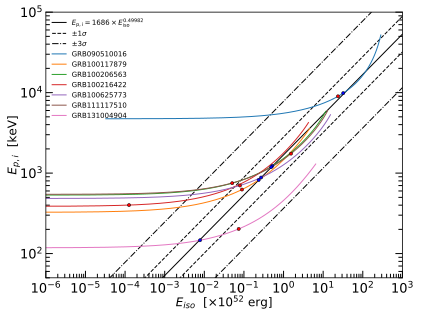

In [194]:
plt.xscale('log')
plt.yscale('log')

plt.xlim([1e-6,1e3])#([1e50,1e55])
plt.ylim([50,1e5])#([100,2*10**4])

#plt.grid(True, which='both', lw = 0.3, zorder=0)
plt.xlabel(r'$E_{iso}$  [$\times10^{52}$ erg]',fontsize=12, labelpad=0)
plt.ylabel('$E_{p,i}$  [keV]',fontsize=12,labelpad=0)
plt.tick_params(axis='x', labelbottom=True, labeltop=False)
plt.tick_params(axis='x', which='major', direction='in', pad=5, top=False, bottom=True, length=7, width=1, colors='black', grid_alpha=1.0, labelsize=13)
plt.tick_params(axis='x', which='minor', direction='in', pad=5, top=False, bottom=True, length=4, width=1, colors='black', grid_alpha=1.0, labelsize=13)
plt.tick_params(axis='y', labelleft=True, labelright=False)
plt.tick_params(axis='y', which='major', direction='in', pad=3, left=True, right=True, length=7, width=1, colors='black', grid_alpha=1.0, labelsize=13)
plt.tick_params(axis='y', which='minor', direction='in', pad=3, left=True, right=True, length=4, width=1, colors='black', grid_alpha=1.0, labelsize=13)

xew1 = np.linspace(1e-6,1e5)
# plt.plot(xew1, 10**3.23197*(xew1)**0.50569, color='black', lw=1.0, zorder=2, label=r'$E_{p,i}=10^{3.23197}\times E_{iso}^{0.50569}$')
# plt.plot(xew1, 10**3.22691*(xew1)**0.49982, color='black', lw=1.0, zorder=2, label=r'$E_{p,i}=10^{3.22691}\times E_{iso}^{0.49982}$')
plt.plot(xew1, 1686*(xew1)**0.49982, color='black', lw = 1.0, zorder=2, label=r'$E_{\rm p,i}=1686\times E_{\rm iso}^{0.49982}$')
plt.plot(xew1, 10**(3.22691+0.221504)*(xew1)**0.49982, linestyle='--', color='black', lw=1.0, zorder=2, label=r'$\pm1\sigma$')
plt.plot(xew1, 10**(3.22691-0.221504)*(xew1)**0.49982, linestyle='--', color='black', lw=1.0, zorder=2)
plt.plot(xew1, 10**(3.22691+3*0.221504)*(xew1)**0.49982, linestyle='-.', color='black', lw=1.0, zorder=2, label=r'$\pm3\sigma$')
plt.plot(xew1, 10**(3.22691-3*0.221504)*(xew1)**0.49982, linestyle='-.', color='black', lw=1.0, zorder=2)

# plt.scatter(curve_x[:,27], curve_y[:,27], zorder=2, s=3.0, label=names[27])
plt.plot(curve_x[:,27], curve_y[:,27], zorder=2, lw=1.0, label=names[27])
# plt.scatter(curve_x[:,42], curve_y[:,42], zorder=2, s=3.0, label=names[42])
plt.plot(curve_x[:,42], curve_y[:,42], zorder=2, lw=1.0, label=names[42])
# plt.scatter(curve_x[:,43], curve_y[:,43], zorder=2, s=3.0, label=names[43])
plt.plot(curve_x[:,43], curve_y[:,43], zorder=2, lw=1.0, label=names[43])
# plt.scatter(curve_x[:,44], curve_y[:,44], zorder=2, s=3.0, label=names[44])
plt.plot(curve_x[:,44], curve_y[:,44], zorder=2, lw=1.0, label=names[44])
# plt.scatter(curve_x[:,51], curve_y[:,51], zorder=2, s=3.0, label=names[51])
plt.plot(curve_x[:,51], curve_y[:,51], zorder=2, lw=1.0, label=names[51])
# plt.scatter(curve_x[:,80], curve_y[:,80], zorder=2, s=3.0, label=names[80])
plt.plot(curve_x[:,80], curve_y[:,80], zorder=2, lw=1.0, label=names[80])
# plt.scatter(curve_x[:,116], curve_y[:,116], zorder=2, s=3.0, label=names[116])
plt.plot(curve_x[:,116], curve_y[:,116], zorder=2, lw=1.0, label=names[116])

plt.scatter(float(sgrb_real[0,2])/1e52,float(sgrb_real[0,3]), s=10.0, zorder=3, edgecolors='black', linewidths=0.5, color='red')
plt.scatter(float(sgrb_real[1,2])/1e52,float(sgrb_real[1,3]), s=10.0, zorder=3, edgecolors='black', linewidths=0.5, color='red')
plt.scatter(float(sgrb_real[2,2])/1e52,float(sgrb_real[2,3]), s=10.0, zorder=3, edgecolors='black', linewidths=0.5, color='red')
plt.scatter(float(sgrb_real[3,2])/1e52,float(sgrb_real[3,3]), s=10.0, zorder=3, edgecolors='black', linewidths=0.5, color='red')
plt.scatter(float(sgrb_real[4,2])/1e52,float(sgrb_real[4,3]), s=10.0, zorder=3, edgecolors='black', linewidths=0.5, color='red')
plt.scatter(float(sgrb_real[5,2])/1e52,float(sgrb_real[5,3]), s=10.0, zorder=3, edgecolors='black', linewidths=0.5, color='red')
plt.scatter(float(sgrb_real[6,2])/1e52,float(sgrb_real[6,3]), s=10.0, zorder=3, edgecolors='black', linewidths=0.5, color='red')

plt.scatter( mlip[27,0]/1e52,  mlip[27,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s3pip[27,0]/1e52, s3pip[27,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s1pip[27,0]/1e52, s1pip[27,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s1mip[27,0]/1e52, s1mip[27,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s3mip[27,0]/1e52, s3mip[27,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)

plt.scatter( mlip[42,0]/1e52,  mlip[42,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s3pip[42,0]/1e52, s3pip[42,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s1pip[42,0]/1e52, s1pip[42,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s1mip[42,0]/1e52, s1mip[42,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s3mip[42,0]/1e52, s3mip[42,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)

plt.scatter( mlip[43,0]/1e52,  mlip[43,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s3pip[43,0]/1e52, s3pip[43,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s1pip[43,0]/1e52, s1pip[43,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s1mip[43,0]/1e52, s1mip[43,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s3mip[43,0]/1e52, s3mip[43,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)

plt.scatter( mlip[44,0]/1e52,  mlip[44,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s3pip[44,0]/1e52, s3pip[44,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s1pip[44,0]/1e52, s1pip[44,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s1mip[44,0]/1e52, s1mip[44,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s3mip[44,0]/1e52, s3mip[44,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)

plt.scatter( mlip[51,0]/1e52,  mlip[51,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s3pip[51,0]/1e52, s3pip[51,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s1pip[51,0]/1e52, s1pip[51,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s1mip[51,0]/1e52, s1mip[51,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s3mip[51,0]/1e52, s3mip[51,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)

plt.scatter( mlip[80,0]/1e52,  mlip[80,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s3pip[80,0]/1e52, s3pip[80,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s1pip[80,0]/1e52, s1pip[80,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s1mip[80,0]/1e52, s1mip[80,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s3mip[80,0]/1e52, s3mip[80,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)

plt.scatter( mlip[116,0]/1e52,  mlip[116,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s3pip[116,0]/1e52, s3pip[116,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s1pip[116,0]/1e52, s1pip[116,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s1mip[116,0]/1e52, s1mip[116,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
plt.scatter(s3mip[116,0]/1e52, s3mip[116,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
plt.legend(loc=2,frameon=False,fontsize=7)
plt.show()

# plt.savefig('epeak-eiso-sgrb_real_z_dots3.svg', dpi=1200);
# plt.savefig('epeak-eiso-sgrb_real_z_dots3.eps', dpi=1200);
# plt.savefig('epeak-eiso-sgrb_real_z_dots3.pdf', dpi=1200);
# plt.savefig('epeak-eiso-sgrb_real_z_dots3.png', dpi=1200);

### Burgess 2019 MNRAS

here we will use an equation given by Marco in order to use table data from Burgess et al. 2019 MNRAS paper with an aim to reconstruct energy parameters Epeak and Eiso, thus we can build them on Amati/Zhang correlation plane and recalculate the accuracy of the two approaches.

### now we reconstruct the slope of our correlation

In [61]:
# transfering the data from Marco
epeak_mm = np.array([1.989, 2.793, 1.959, 3.908, 2.600, 2.740, 2.855, 2.846, 2.925, 2.980, 2.952, 2.364, 2.278, 3.096, 1.988, 3.870, 3.773, 3.786, 3.723], dtype='float')
epeak_pos_mm = np.array([0.049, 0.081, 0.041, 0.031, 0.180, 0.062, 0.087, 0.066, 0.073, 0.120, 0.061, 0.076, 0.333, 0.154, 0.089, 0.250, 0.022, 0.099, 0.060], dtype='float')
epeak_neg_mm = np.array([0.055, 0.099, 0.045, 0.033, 0.120, 0.073, 0.072, 0.078, 0.088, 0.180, 0.071, 0.092, 0.211, 0.241, 0.111, 0.690, 0.023, 0.129, 0.070], dtype='float')
eiso_mm = np.array([49.519, 51.420, 49.120, 52.871, 51.193, 50.908, 50.669, 50.875, 51.688, 51.530, 51.326, 51.322, 50.332, 50.651, 50.080, 52.387, 53.452, 52.672, 52.768], dtype='float')
eiso_pos_mm = np.array([0.013, 0.051, 0.500, 0.018, 0.101, 0.051, 0.060, 0.017, 0.057, 0.120, 0.045, 0.038, 0.092, 0.040, 0.047, 0.037, 0.022, 0.091, 0.059], dtype='float')
eiso_neg_mm = np.array([0.013, 0.058, 0.670, 0.019, 0.082, 0.057, 0.053, 0.018, 0.065, 0.160, 0.050, 0.041, 0.117, 0.044, 0.052, 0.041, 0.024, 0.116, 0.069], dtype='float')
xerr_pos_mm = (10**(eiso_mm+eiso_pos_mm))/10**52
xerr_neg_mm = (10**(eiso_mm-eiso_neg_mm))/10**52
xerr_pos_neg_mm = np.array([xerr_pos_mm, xerr_neg_mm])

yerr_pos_mm = 10**(epeak_mm+epeak_pos_mm)
yerr_neg_mm = 10**(epeak_mm-epeak_neg_mm)
yerr_pos_neg_mm = np.array([yerr_pos_mm, yerr_neg_mm])

yerr_pos_neg_mm.shape
10**(eiso_mm+eiso_pos_mm)
# (10**eiso_mm)+(10**eiso_pos_mm)


array([3.40408190e+49, 2.95801247e+51, 4.16869383e+49, 7.74461798e+52,
       1.96788629e+51, 9.09913273e+50, 5.35796658e+50, 7.79830111e+50,
       5.55904257e+51, 4.46683592e+51, 2.34963282e+51, 2.29086765e+51,
       2.65460556e+50, 4.90907876e+50, 1.33967669e+50, 2.65460556e+52,
       2.97851643e+53, 5.79428696e+52, 6.71428853e+52])

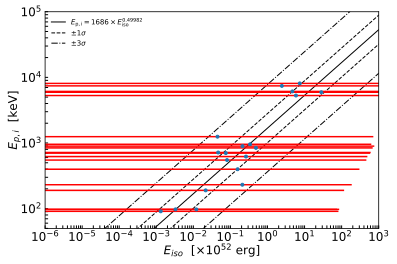

In [62]:
plt.xscale('log')
plt.yscale('log')

plt.xlim([1e-6,1e3])#([1e50,1e55])
plt.ylim([50,1e5])#([100,2*10**4])

plt.tick_params(direction='in', which='both', length=3, width=1, labelright=False, axis='both')
plt.minorticks_on
#plt.grid(True, which='both', lw = 0.3, zorder=0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$E_{iso}$  [$\times10^{52}$ erg]',fontsize=12, labelpad=0)
plt.ylabel('$E_{p,i}$  [keV]',fontsize=12,labelpad=0)

xew1 = np.linspace(1e-6,1e5)
# plt.plot(xew1, 10**3.23197*(xew1)**0.50569, color='black', lw=1.0, zorder=2, label=r'$E_{p,i}=10^{3.23197}\times E_{iso}^{0.50569}$')
# plt.plot(xew1, 10**3.22691*(xew1)**0.49982, color='black', lw=1.0, zorder=2, label=r'$E_{p,i}=10^{3.22691}\times E_{iso}^{0.49982}$')
plt.plot(xew1, 1686*(xew1)**0.49982, color='black', lw = 1.0, zorder=2, label=r'$E_{\rm p,i}=1686\times E_{\rm iso}^{0.49982}$')
plt.plot(xew1, 10**(3.22691+0.221504)*(xew1)**0.49982, linestyle='--', color='black', lw=1.0, zorder=2, label=r'$\pm1\sigma$')
plt.plot(xew1, 10**(3.22691-0.221504)*(xew1)**0.49982, linestyle='--', color='black', lw=1.0, zorder=2)
plt.plot(xew1, 10**(3.22691+3*0.221504)*(xew1)**0.49982, linestyle='-.', color='black', lw=1.0, zorder=2, label=r'$\pm3\sigma$')
plt.plot(xew1, 10**(3.22691-3*0.221504)*(xew1)**0.49982, linestyle='-.', color='black', lw=1.0, zorder=2)

plt.errorbar(10**eiso_mm/10**52, 10**epeak_mm, xerr_pos_neg_mm , yerr_pos_neg_mm, fmt='.', ecolor = 'red')

# # plt.scatter(curve_x[:,27], curve_y[:,27], zorder=2, s=3.0, label=names[27])
# plt.plot(curve_x[:,27], curve_y[:,27], zorder=2, lw=1.0, label=names[27])
# # plt.scatter(curve_x[:,42], curve_y[:,42], zorder=2, s=3.0, label=names[42])
# plt.plot(curve_x[:,42], curve_y[:,42], zorder=2, lw=1.0, label=names[42])
# # plt.scatter(curve_x[:,43], curve_y[:,43], zorder=2, s=3.0, label=names[43])
# plt.plot(curve_x[:,43], curve_y[:,43], zorder=2, lw=1.0, label=names[43])
# # plt.scatter(curve_x[:,44], curve_y[:,44], zorder=2, s=3.0, label=names[44])
# plt.plot(curve_x[:,44], curve_y[:,44], zorder=2, lw=1.0, label=names[44])
# # plt.scatter(curve_x[:,51], curve_y[:,51], zorder=2, s=3.0, label=names[51])
# plt.plot(curve_x[:,51], curve_y[:,51], zorder=2, lw=1.0, label=names[51])
# # plt.scatter(curve_x[:,80], curve_y[:,80], zorder=2, s=3.0, label=names[80])
# plt.plot(curve_x[:,80], curve_y[:,80], zorder=2, lw=1.0, label=names[80])
# # plt.scatter(curve_x[:,116], curve_y[:,116], zorder=2, s=3.0, label=names[116])
# plt.plot(curve_x[:,116], curve_y[:,116], zorder=2, lw=1.0, label=names[116])

# plt.scatter(float(sgrb_real[0,2])/1e52,float(sgrb_real[0,3]), s=10.0, zorder=3, edgecolors='black', linewidths=0.5, color='red')
# plt.scatter(float(sgrb_real[1,2])/1e52,float(sgrb_real[1,3]), s=10.0, zorder=3, edgecolors='black', linewidths=0.5, color='red')
# plt.scatter(float(sgrb_real[2,2])/1e52,float(sgrb_real[2,3]), s=10.0, zorder=3, edgecolors='black', linewidths=0.5, color='red')
# plt.scatter(float(sgrb_real[3,2])/1e52,float(sgrb_real[3,3]), s=10.0, zorder=3, edgecolors='black', linewidths=0.5, color='red')
# plt.scatter(float(sgrb_real[4,2])/1e52,float(sgrb_real[4,3]), s=10.0, zorder=3, edgecolors='black', linewidths=0.5, color='red')
# plt.scatter(float(sgrb_real[5,2])/1e52,float(sgrb_real[5,3]), s=10.0, zorder=3, edgecolors='black', linewidths=0.5, color='red')
# plt.scatter(float(sgrb_real[6,2])/1e52,float(sgrb_real[6,3]), s=10.0, zorder=3, edgecolors='black', linewidths=0.5, color='red')

# plt.scatter( mlip[27,0]/1e52,  mlip[27,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
# plt.scatter(s3pip[27,0]/1e52, s3pip[27,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
# plt.scatter(s1pip[27,0]/1e52, s1pip[27,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
# plt.scatter(s1mip[27,0]/1e52, s1mip[27,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
# plt.scatter(s3mip[27,0]/1e52, s3mip[27,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)

# plt.scatter( mlip[42,0]/1e52,  mlip[42,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
# plt.scatter(s3pip[42,0]/1e52, s3pip[42,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
# plt.scatter(s1pip[42,0]/1e52, s1pip[42,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
# plt.scatter(s1mip[42,0]/1e52, s1mip[42,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
# plt.scatter(s3mip[42,0]/1e52, s3mip[42,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)

# plt.scatter( mlip[43,0]/1e52,  mlip[43,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
# plt.scatter(s3pip[43,0]/1e52, s3pip[43,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
# plt.scatter(s1pip[43,0]/1e52, s1pip[43,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
# plt.scatter(s1mip[43,0]/1e52, s1mip[43,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
# plt.scatter(s3mip[43,0]/1e52, s3mip[43,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)

# plt.scatter( mlip[44,0]/1e52,  mlip[44,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
# plt.scatter(s3pip[44,0]/1e52, s3pip[44,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
# plt.scatter(s1pip[44,0]/1e52, s1pip[44,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
# plt.scatter(s1mip[44,0]/1e52, s1mip[44,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
# plt.scatter(s3mip[44,0]/1e52, s3mip[44,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)

# plt.scatter( mlip[51,0]/1e52,  mlip[51,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
# plt.scatter(s3pip[51,0]/1e52, s3pip[51,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
# plt.scatter(s1pip[51,0]/1e52, s1pip[51,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
# plt.scatter(s1mip[51,0]/1e52, s1mip[51,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
# plt.scatter(s3mip[51,0]/1e52, s3mip[51,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)

# plt.scatter( mlip[80,0]/1e52,  mlip[80,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
# plt.scatter(s3pip[80,0]/1e52, s3pip[80,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
# plt.scatter(s1pip[80,0]/1e52, s1pip[80,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
# plt.scatter(s1mip[80,0]/1e52, s1mip[80,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
# plt.scatter(s3mip[80,0]/1e52, s3mip[80,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)

# plt.scatter( mlip[116,0]/1e52,  mlip[116,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
# plt.scatter(s3pip[116,0]/1e52, s3pip[116,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
# plt.scatter(s1pip[116,0]/1e52, s1pip[116,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
# plt.scatter(s1mip[116,0]/1e52, s1mip[116,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
# plt.scatter(s3mip[116,0]/1e52, s3mip[116,1], s=10.0, color='blue', edgecolors='black', linewidths=0.5, zorder=3)
plt.legend(loc=2,frameon=False,fontsize=7)
plt.show()

# plt.savefig('epeak-eiso-sgrb_real_z_dots3.svg', dpi=1200);
# plt.savefig('epeak-eiso-sgrb_real_z_dots3.eps', dpi=1200);
# plt.savefig('epeak-eiso-sgrb_real_z_dots3.pdf', dpi=1200);
# plt.savefig('epeak-eiso-sgrb_real_z_dots3.png', dpi=1200);

## building histograms out of results obtained

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

In [64]:
zmlip[np.nonzero(zmlip)] # 128 non-zero elements
np.mean(zmlip[np.nonzero(zmlip)]) # 0.8964566558453521
np.std(zmlip[np.nonzero(zmlip)]) # 0.6188654118360551
np.median(zmlip[np.nonzero(zmlip)]) # 0.8236680723876187

0.8236680723876187

sumsquare_error         aic         bic  kl_div
exponpow         5.240834  309.726554 -394.474250     inf
gamma            6.438435  315.468205 -368.131248     inf
expon            6.491015  314.271019 -371.942188     inf
chi2             6.912904  300.421850 -359.029889     inf
rayleigh         6.951919  341.785069 -363.161540     inf

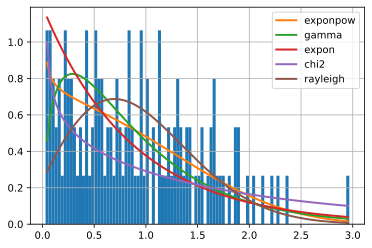

In [65]:
# data histogram
plt.hist(zmlip[np.nonzero(zmlip)],40);
zdata = zmlip[np.nonzero(zmlip)]
f = Fitter(zdata, distributions= get_common_distributions())
f.fit()
f.summary()

In [470]:
f.get_best(method = 'sumsquare_error')

{'exponpow': {'b': 0.922732525759455,
  'loc': 0.029839660999647404,
  'scale': 1.4851527952127963}}

sumsquare_error         aic            bic  kl_div
norm             0.048996  602.650392 -122245.236045     inf
gamma            0.049020  604.579629 -122231.132300     inf
lognorm          0.049834  605.586187 -122066.376618     inf
exponpow         0.518420  854.561407  -98645.460894     inf
cauchy           0.763341  473.957787  -94785.483888     inf

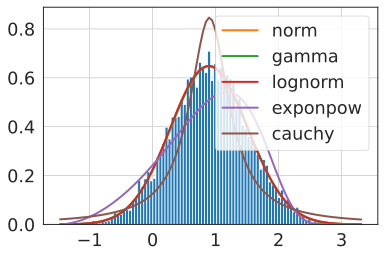

In [471]:
mu, sigma = 0.8965, 0.6188 # mean and standard deviation
data = np.random.normal(mu, sigma, 10000)
# data
plt.hist(data,100);
f = Fitter(data, distributions= get_common_distributions())
f.fit()
f.summary()

In [472]:
f.get_best(method = 'sumsquare_error')

{'norm': {'loc': 0.9001076158874836, 'scale': 0.6158063741775704}}

In [473]:
mu, sigma = 0.8965, 0.6189 # mean and standard deviation
s = np.random.normal(mu, sigma, 10000)

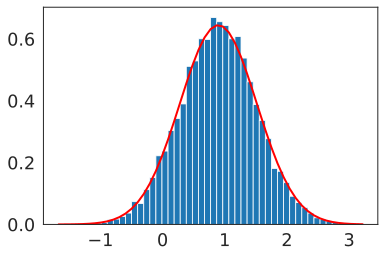

In [474]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 50, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')

(array([29., 22., 20., 17., 16., 12.,  7.,  4.,  0.,  1.]),
 array([0.02983966, 0.32353846, 0.61723726, 0.91093605, 1.20463485,
        1.49833365, 1.79203244, 2.08573124, 2.37943004, 2.67312884,
        2.96682763]),
 <BarContainer object of 10 artists>)

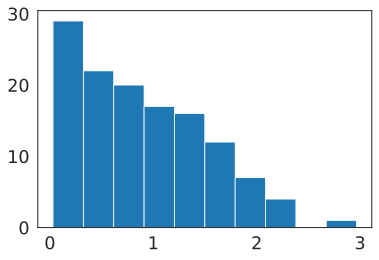

In [475]:
plt.hist(zmlip[np.nonzero(zmlip)],10)

In [476]:
zmlip[np.nonzero(zmlip)].shape/np.sum(zmlip[np.nonzero(zmlip)])
# np.sum(zmlip[np.nonzero(zmlip)])

array([1.1155029])

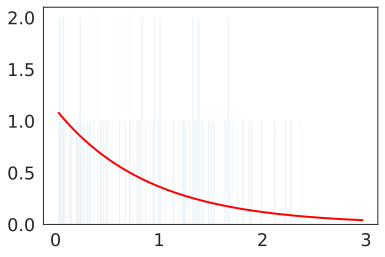

In [477]:
# mu, sigma = 0.8965, 0.6189 # mean and standard deviation
lambda1 = 1.1155029 #for exponential distribution
#s = np.random.exponential(lambda1, 1000)
s= zmlip[np.nonzero(zmlip)]

count, bins, ignored = plt.hist(s, 1000)#, 100, density=True, align='mid')

x = np.linspace(min(bins), max(bins), 1000)

# pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2)) / (x * sigma * np.sqrt(2 * np.pi)))
pdf = lambda1*np.exp(-lambda1*x)


plt.plot(x, pdf, linewidth=2, color='r')

# plt.axis('tight')

plt.show()
# s

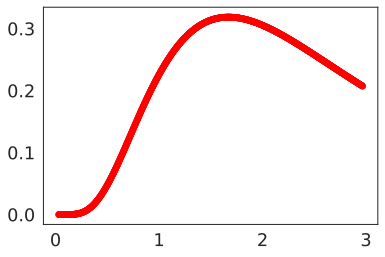

In [478]:
x = np.linspace(min(bins), max(bins), 1000)
x
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2)) / (x * sigma * np.sqrt(2 * np.pi)))
# plt.show()
x, pdf

plt.scatter(x, pdf, linewidth=2, color='r')


In [479]:
#!pip3 install fitter

In [480]:
dataset=zmlip[np.nonzero(zmlip)]
dataset.dtype

dtype('float64')

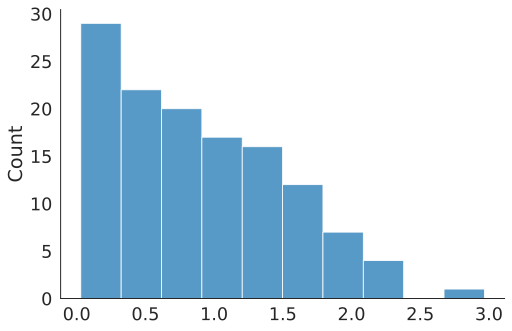

In [481]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=dataset, kind="hist", bins = 10, aspect = 1.5)

sumsquare_error         aic         bic  kl_div
burr              5.092186  336.825853 -393.305223     inf
mielke            5.167359  339.544519 -391.429448     inf
exponpow          5.240834  309.726554 -394.474250     inf
exponweib         5.279303  324.540994 -388.686116     inf
gengamma          5.284041  320.499990 -388.571280     inf

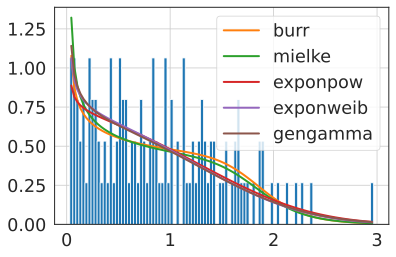

In [482]:
f = Fitter(dataset)#, distributions=['gamma', 'lognorm', "beta", "burr", "norm"])
f.fit()
f.summary()

In [483]:
f.get_best()

{'burr': {'c': 8.6152451571755,
  'd': 0.09375707375599499,
  'loc': 0.029839660999647407,
  'scale': 1.9112744552786742}}

In [484]:
get_common_distributions()

['cauchy',
 'chi2',
 'expon',
 'exponpow',
 'gamma',
 'lognorm',
 'norm',
 'powerlaw',
 'rayleigh',
 'uniform']

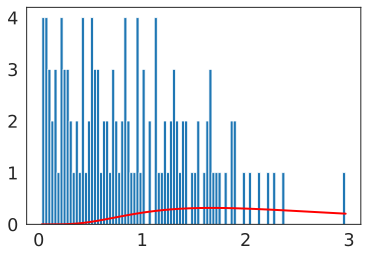

In [485]:
mu, sigma = 0.8965, 0.6189 # mean and standard deviation

x = np.linspace(min(bins), max(bins), 100)

plt.hist(zmlip[np.nonzero(zmlip)], bins=100)

pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2)) / (x * sigma * np.sqrt(2 * np.pi)))

plt.plot(x, pdf, linewidth=2, color='r')

plt.axis('tight')

plt.show()

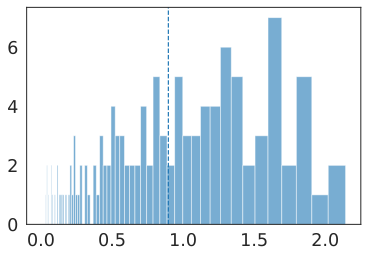

In [486]:
fig, ax5 = plt.subplots()
# ax5.set_xscale('log')

logbins = np.logspace(np.log10(np.min(zs3pip)),np.log10(np.max(zs3mip)),100)

# ax5.hist(np.exp(zs3pip[np.nonzero(zs3pip)]), bins=logbins, alpha=0.6)
# ax5.hist(zs1pip[np.nonzero(zs1pip)], bins=logbins, alpha=0.6)
ax5.hist(zmlip[np.nonzero(zmlip)], bins=logbins, alpha=0.6)
# ax5.hist(zs1mip[np.nonzero(zs1mip)], bins=logbins, alpha=0.6)
# ax5.hist(zs3mip[np.nonzero(zs3mip)], bins=logbins, alpha=0.6)

ax5.axvline(x=0.8965,ymin=0,ymax=1,linestyle='--',label=r'$\mu_{+3\sigma}=0.8965$')


In [487]:
zmlip.shape

(223,)

In [488]:
zmlip[np.nonzero(zmlip)], 10**(zmlip[np.nonzero(zmlip)]), np.exp(zmlip[np.nonzero(zmlip)])

(array([1.14177224, 1.38495493, 0.87468729, 0.0798188 , 0.62116541,
        1.29861765, 1.81020916, 0.74274686, 0.2835973 , 1.71253198,
        0.20379243, 1.42289785, 0.5021946 , 0.71368302, 0.50325152,
        1.6658198 , 0.3349332 , 1.22882144, 2.02766253, 0.95980654,
        0.53178664, 0.93781414, 0.5817729 , 2.1180493 , 1.15091836,
        2.37922953, 1.53782714, 1.33713559, 2.22381471, 1.35795098,
        1.89000528, 1.6157891 , 0.27331782, 0.83093077, 0.31005031,
        1.26840533, 0.64651864, 1.48364083, 1.14303769, 0.11601751,
        1.86628794, 0.81640537, 1.12836477, 1.02111954, 0.49200304,
        0.79578157, 1.62313775, 1.0092994 , 1.51066997, 1.20064218,
        0.43828347, 1.8863848 , 0.13028751, 1.32086563, 0.78050404,
        0.74563232, 0.17258064, 0.68695006, 1.99375393, 0.84244299,
        1.32163572, 1.07087652, 0.10010477, 0.71972015, 0.83644964,
        0.3119018 , 0.50752939, 0.40427508, 0.07295177, 0.23702215,
        0.20829837, 1.64921313, 0.04226917, 1.53

In [489]:
np.log10(100), 10**0.8965

(2.0, 7.879524314513303)

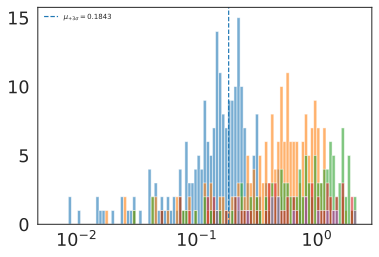

In [490]:
# histogram on log scale. 
fig, ax5 = plt.subplots()
# Use non-equal bin sizes, such that they look equal on log scale.

logbins = np.logspace(np.log10(np.min(zs3pip)),np.log10(np.max(zs3mip)),100)

ax5.hist(zs3pip, bins=logbins, alpha=0.6)
ax5.hist(zs1pip, bins=logbins, alpha=0.6)
ax5.hist(zmlip, bins=logbins, alpha=0.6)
ax5.hist(zs1mip, bins=logbins, alpha=0.6)
ax5.hist(zs3mip, bins=logbins, alpha=0.6)

ax5.axvline(x=0.1843,ymin=0,ymax=1,linestyle='--',label=r'$\mu_{+3\sigma}=0.1843$')

ax5.set_xscale('log')
plt.legend(loc=2,frameon=False,fontsize=7)
plt.show()

## whole sample Epeak and Eiso calculation with synthetic z 

In [491]:
sgrb_names_zml_nonzero = resultingtable[np.nonzero(resultingtable[:,3]),0]
sgrb_redshift_zml_nonzero = resultingtable[np.nonzero(resultingtable[:,3]),3]
sgrb_models_zml_full = np.array(names_and_model[1])
sgrb_models_zml_nonzero = sgrb_models_zml_full[np.nonzero(resultingtable[:,3])]
#sgrb_models_zml_nonzero
sgrb_names_zml_nonzero[0,0]

'GRB080802386'

In [492]:
path='browse_results_488_sgrbs_2021-01-01.fits'
names_and_model = myastro.get_all_names_with_model(path)

names_and_model_zml_nonzero = []
names_zml_nonzero = []
model_zml_nonzero = []
zml_nonzero_location = []
zml_nonzero_counter_location = []

for i in sgrb_names_zml_nonzero[0,:]:
    counter99 = 0
    #print(i)
    while (counter99 < len(names_and_model[0])):
        if str(i)==str(names_and_model[0][counter99]):
            names_zml_nonzero.append(names_and_model[0][counter99])
            model_zml_nonzero.append(names_and_model[1][counter99])
#             sgrb_redshift_zml_nonzero = np.append(zml_nonzero_location, counter99)
            zml_nonzero_counter_location.append(counter99)
            #print(counter99)
        counter99 += 1
#len(names_zml_nonzero)
names_and_model_zml_nonzero = np.vstack((names_zml_nonzero, model_zml_nonzero, sgrb_redshift_zml_nonzero, zml_nonzero_counter_location))#, sgrb_redshift_zml_nonzero))
#names_and_model_zml_nonzero #, zml_nonzero_counter_location

In [493]:
names_and_model[0][10]

'GRB081101491'

In [494]:
# path='browse_results_488_sgrbs_2021-01-01.fits'
names_location991 = np.array([],dtype='int')
for i in sgrb_names_zml_nonzero[0,:]:
    counter991 = 0
    for j in names_and_model[0]:
        if i==j:
            names_location991 = np.append(names_location991, counter991)
        counter991 += 1
#names_location991

In [495]:
# names[27], names[42], names[43], names[44], names[51], names[80], names[116]
names_location991

array([  2,  10,  11,  13,  14,  17,  18,  21,  22,  24,  28,  33,  36,
        37,  38,  40,  45,  46,  50,  54,  57,  61,  62,  63,  65,  69,
        71,  73,  76,  78,  80,  82,  83,  86,  87,  92,  93,  98, 103,
       106, 109, 111, 118, 119, 120, 121, 123, 128, 130, 133, 135, 136,
       141, 145, 148, 150, 151, 153, 163, 168, 173, 179, 186, 188, 189,
       191, 194, 199, 202, 204, 206, 210, 214, 219, 222, 225, 226, 227,
       231, 233, 234, 238, 244, 245, 248, 252, 267, 268, 270, 274, 278,
       281, 282, 285, 286, 289, 290, 295, 304, 309, 310, 312, 320, 330,
       333, 335, 336, 337, 346, 349, 350, 353, 357, 361, 376, 381, 382,
       383, 387, 391, 392, 393, 394, 395, 396, 406, 412, 457])

In [496]:
names_and_model[0].shape

(488,)

In [497]:
nmsorted_zml_nonzero = myastro.sort_name_by_models(names_and_model_zml_nonzero)
counter_location_comp = np.array([],dtype='int')
for i in nmsorted_zml_nonzero[0]:
    counter992 = 0
    for j in names_and_model[0]:
        if i==j:
            counter_location_comp = np.append(counter_location_comp, counter992)
        counter992 += 1
counter_location_comp
# names_and_model_redshift

array([  2,  10,  11,  13,  14,  17,  18,  21,  22,  24,  28,  33,  36,
        37,  38,  40,  45,  46,  50,  54,  57,  61,  62,  63,  65,  69,
        71,  73,  76,  78,  80,  82,  83,  86,  87,  92,  93,  98, 103,
       106, 109, 111, 118, 119, 120, 121, 123, 128, 130, 133, 135, 136,
       141, 145, 148, 150, 151, 153, 163, 168, 173, 179, 186, 188, 189,
       191, 194, 199, 202, 204, 206, 210, 214, 219, 222, 225, 226, 227,
       231, 233, 234, 238, 244, 245, 248, 252, 267, 268, 270, 274, 278,
       281, 282, 285, 286, 289, 290, 295, 304, 309, 310, 312, 320, 330,
       333, 335, 336, 337, 346, 349, 350, 353, 357, 361, 376, 381, 382,
       383, 387, 391, 392, 393, 394, 395, 396, 406, 412, 457])

In [498]:
#defining the catalog file and looking at its content
path='browse_results_488_sgrbs_2021-01-01.fits'
short_catalog_new_zml_nonzero = path;
short_list = fits.open(short_catalog_new_zml_nonzero); #we assign image_file to hdu_list package
#short_list.info()
short_data = short_list[1].data;
short_list[1].header;
#short_data.columns

In [499]:
namelistshort = short_data['NAME']
triggertimelistshort = short_data['TRIGGER_TIME'] #given in Modified Julian Date---MJD; use xTime to convert if needed https://heasarc.nasa.gov/cgi-bin/Tools/xTime/xTime.pl
t90listshort = short_data['T90']
t90errorlistshort = short_data['T90_ERROR']
fluencedurationlistshort = short_data['FLNC_SPECTRUM_STOP'] - short_data['FLNC_SPECTRUM_START']

###cutoff power-law: alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dEpeak, dNormalization
shortcplalpha = -1 * short_data['FLNC_COMP_INDEX']
shortcplePeak = short_data['FLNC_COMP_EPEAK']
shortcplePiv = short_data['FLNC_COMP_PIVOT']
shortcplnormalization = short_data['FLNC_COMP_AMPL']
shortcplduration = short_data['FLNC_SPECTRUM_STOP'] - short_data['FLNC_SPECTRUM_START']
shortcplredshift1 = np.ones(short_data.shape[0])
shortcplredshift2 = np.full((short_data.shape[0]),2)
shortcplredshift05 = np.full((short_data.shape[0]),0.5)
shortcpllower = np.full((short_data.shape[0]),1)
shortcplupper = np.full((short_data.shape[0]),10**4)
shortcpldAlpha = short_data['FLNC_COMP_INDEX_POS_ERR']
shortcpldEpeak = short_data['FLNC_COMP_EPEAK_POS_ERR']
shortcpldNormalization = short_data['FLNC_COMP_AMPL_POS_ERR']

#
fluencebestfitlistshort = short_data['Flnc_Best_Fitting_Model']
#tstartlist = short_data['T90_START']
#triglist = short_data['TRIGGER_NAME']
#namelist.shape #to check the dimension

burstsshort = np.vstack([namelistshort,triggertimelistshort,fluencedurationlistshort,fluencebestfitlistshort]).T #numpy.vstack stands for merge vertically
burstsless2sec = np.vstack([namelistshort,t90listshort]).T #numpy.vstack stands for merge vertically

fluencebestfitlistshort.shape
#plredshift.shape
#np.full((1,444),10)
print(burstsshort.ndim) #number of dimensions of the array
burstsshort.shape[0] #number of (raws, columns) of the array
# burstsshort
#fluencebestfitlistshort
#burstsless2sec.shape

2


488

In [500]:
nmsorted_zml_nonzero, counter_location_comp;

In [501]:
def _luminosityDistance(redshift):
    dH = c*mpcToCm/kmToCm/H0
    function = lambda x: (1/np.sqrt(omegaM*(1+x)**3+omegaK*(1+x)**2+omegaL))
    lower, upper = 0, redshift
    luminosityDistance =  dH *(1+redshift) * quad(function,lower,upper)[0]
    return luminosityDistance

In [502]:
def _luminosityArea(redshift):
    luminosityDistance = _luminosityDistance(redshift)
    luminosityArea = 4 * pi * luminosityDistance**2
    return luminosityArea

In [503]:
# ------------------ CUTOFF POWER-LAW ------------------

def _cutoffPLFlux(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper):
    ## model parameters are from the fitting result in observer's frame.
    ## integration from lower/(1+z) to upper/(1+z) in the observer's frame,
    ## which are the corrsponding energy from lower to upper in the rest frame. 
    ## set redshift = 0 in order to compute the flux in observer's frame.
    
    # if no data or bad data, return.
    if (normalization <= 0 ): return 0
    if (ePeak <= 0 ): return 0
    lower, upper = lower/(1+redshift), upper/(1+redshift)
    function = lambda x: normalization*x*(x/ePiv)**(-alpha)*np.exp(-x*(2-alpha)/ePeak)

    #QAGS adaptive integration
    flux = quad( function, lower, upper)[0]
    return flux



def _cutoffPLEnergy(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper):
    # in order to have isotropic energy in the rest frame from E1 to E2,
    # we need to integrate in the observer's frame from E1/(1+z) to E2/(1+z), then divide by (1+z) for the total energy.
    # (E/50.0)**(-a)*np.exp(-E*(2.0-a)/b)
    # alpha is usually positive by default
        
    flux = _cutoffPLFlux(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper)
    area = _luminosityArea(redshift)
    isotropicEnergy =  kevToErg * area *  duration * flux / (1+redshift)

    return  isotropicEnergy

    
def _cutoffPLFluxErr(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dEpeak, dNormalization):
    ## model parameters are from the fitting result in observer's frame.
    ## integration from lower/(1+z) to upper/(1+z) in the observer's frame,
    ## which are the corrsponding energy from lower to upper in the rest frame. 
    ## set redshift = 0 in order to compute the flux in observer's frame.
    
    # if no data or bad data, return.
    if (normalization <= 0 ): return 0
    if (ePeak <= 0 ): return 0
    if (dAlpha == ""): return 0
    if (dEpeak == ""): return 0 
    if (dNormalization == ""): return 0
    
    lower, upper = lower/(1+redshift), upper/(1+redshift)

    # Rest frame
    ## Uncertainty from normalization
    f_dF_dNorm = lambda x: x*(x/ePiv)**(-alpha)*np.exp(x*(alpha-2)/ePeak) 
    #QAGS adaptive integration
    dF_dNorm = quad( f_dF_dNorm, lower, upper)[0]

    ## Uncertainty from alpha
    f_dF_dAlpha = lambda x: (np.log(x/ePiv)-x/ePeak) * normalization*x*(x/ePiv)**(-alpha)*np.exp(x*(alpha-2)/ePeak)   
    #QAGS adaptive integration
    dF_dAlpha = quad( f_dF_dAlpha, lower, upper)[0]

    ## Uncertainty from ePeak
    f_dF_dEpeak = lambda x: (x*(2-alpha)/ePeak**2)*normalization*x*(x/ePiv)**(-alpha)*np.exp(x*(alpha-2)/ePeak)
    #QAGS adaptive integration
    dF_dEpeak = quad( f_dF_dEpeak, lower, upper)[0]

    fluxErr = np.sqrt((dF_dNorm*dNormalization)**2+(dF_dAlpha*dAlpha)**2+(dF_dEpeak*dEpeak)**2)

    return fluxErr

    
def _cutoffPLEnergyErr(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dEpeak, dNormalization):
    
    # in order to have isotropic energy in the rest frame from E1 to E2,
    # we need to integrate in the observer's frame from E1/(1+z) to E2/(1+z), then divide by (1+z) for the total energy.
    # (E/50.0)**(-a)*np.exp(-E*(2.0-a)/b)
    # alpha is usually positive by default
    
    cutoffPLFluxErr = _cutoffPLFluxErr(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dEpeak, dNormalization)
    area = _luminosityArea(redshift)
    isotropicEnergyErr =  kevToErg * area * duration * cutoffPLFluxErr / (1+redshift) 
    
    return isotropicEnergyErr


def _cutoffPLK(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper):
    
    fluxObs = _cutoffPLFlux(alpha, ePeak, ePiv, normalization, duration, 0, lower, upper)
    fluxRest = _cutoffPLFlux(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper)

    if fluxObs == 0: return 0
    k = fluxRest/fluxObs
    
    return k


def _cutoffPLKErr(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dEpeak, dNormalization):
    
    fluxObs = _cutoffPLFlux(alpha, ePeak, ePiv, normalization, duration, 0, lower, upper)
    fluxObsErr = _cutoffPLFluxErr(alpha, ePeak, ePiv, normalization, duration, 0, lower, upper, dAlpha, dEpeak, dNormalization)
    fluxRest = _cutoffPLFlux(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper)
    fluxRestErr = _cutoffPLFluxErr(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dEpeak, dNormalization)
    
    if fluxObs == 0: return 0
    
    # uncertainty from flux in observer's frame
    kObsErr = - fluxObsErr*fluxRest/fluxObs**2
    
    # uncertainty from flux in observer's frame
    kRestErr =  fluxRestErr/fluxObs
    
    kErr = np.sqrt(kObsErr**2+kRestErr**2)
    
    return kErr

In [504]:
burstsshort.shape

(488, 4)

In [505]:
###
###we check for models to be read
comp993short=0
numplePiv88short=0
counter993short=0
smallcounter = 0
Eisocalcshort = np.array([],dtype=float)
Epeakcalcshort = np.array([],dtype=float)
#counter_location_comp = [46,  71,  73,  75,  86, 133, 204];
sgrb_redshifts_zml_nonzero = np.array([],dtype='float')
sgrb_names_zml_nonzero = np.array([],dtype='float')

for i in names_and_model_zml_nonzero[1,:]:#burstsshort[(46,  71,  73,  75,  86, 133, 204),3]:
    print(names_and_model_zml_nonzero[0,counter993short])
    print(i)
    print(counter993short)
    if i=="FLNC_COMP":#"FLNC_COMP              ":    
        comp993short+=1
#         print(comp88short)
#         print(counter88short)
        alpha = shortcplalpha[counter_location_comp[smallcounter]]
#         print(alpha)
        ePeak = shortcplePeak[counter_location_comp[smallcounter]]
        ePiv = shortcplePiv[counter_location_comp[smallcounter]]
        normalization = shortcplnormalization[counter_location_comp[smallcounter]]
        duration = shortcplduration[counter_location_comp[smallcounter]]
        redshift_zml_nonzero = float(names_and_model_zml_nonzero[2,counter993short])
        print(redshift_zml_nonzero)
        sgrb_redshifts_zml_nonzero = np.append(sgrb_redshifts_zml_nonzero, redshift_zml_nonzero)
        sgrb_names_zml_nonzero = np.append(sgrb_names_zml_nonzero, names_and_model_zml_nonzero[0,counter993short])
#         print(names_and_model_redshift[0,counter88short])
        print('__________________')
        lower = shortcpllower[counter_location_comp[smallcounter]]
        upper = shortcplupper[counter_location_comp[smallcounter]]
        dAlpha = shortcpldAlpha[counter_location_comp[smallcounter]]
        dEpeak = shortcpldEpeak[counter_location_comp[smallcounter]]
        dNormalization = shortcpldNormalization[counter_location_comp[smallcounter]]
        cplEisoshort993short = _cutoffPLEnergy(alpha, ePeak, ePiv, normalization, duration, redshift_zml_nonzero, lower, upper)
        Epeakcalcshort = np.append(Epeakcalcshort,ePeak*(1+redshift_zml_nonzero))
        Eisocalcshort = np.append(Eisocalcshort,cplEisoshort993short)
        smallcounter += 1
#         counter88short+=1
    else:
        print('inconsistent model')
        print(names_and_model_zml_nonzero[2,counter993short])
        print('__________________')
        redshift_zml_nonzero = float(names_and_model_zml_nonzero[2,counter993short])
#     print(counter88short)
    counter993short+=1
# print(comp88short)
print(counter993short)
print('__________________')
print(Eisocalcshort, Epeakcalcshort)

GRB080802386
FLNC_COMP
0
1.1418
__________________
GRB081101491
FLNC_COMP
1
1.385
__________________
GRB081102365
FLNC_COMP
2
0.8747
__________________
GRB081107321
FLNC_COMP
3
0.0798
__________________
GRB081113230
FLNC_COMP
4
0.6212
__________________
GRB081122614
FLNC_COMP
5
1.2986
__________________
GRB081204517
FLNC_COMP
6
1.8102
__________________
GRB081216531
FLNC_COMP
7
0.7427
__________________
GRB081223419
FLNC_COMP
8
0.2836
__________________
GRB081226509
FLNC_COMP
9
1.7125
__________________
GRB090108020
FLNC_COMP
10
0.2038
__________________
GRB090206620
FLNC_COMP
11
1.4229
__________________
GRB090228204
FLNC_COMP
12
0.5022
__________________
GRB090305052
FLNC_COMP
13
0.7137
__________________
GRB090308734
FLNC_COMP
14
0.5033
__________________
GRB090331681
FLNC_COMP
15
1.6658
__________________
GRB090429753
FLNC_COMP
16
0.3349
__________________
GRB090510016
FLNC_COMP
17
1.2288
__________________
GRB090617208
FLNC_COMP
18
2.0277
__________________
GRB090802235
FLNC_COMP


In [506]:
names_and_model_zml_nonzero[1,:]

array(['FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP',
       'FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP',
       'FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP',
       'FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP',
       'FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP',
       'FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP',
       'FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP',
       'FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP',
       'FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP', 'FLNC_BAND', 'FLNC_COMP',
       'FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP',
       'FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP',
       'FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP',
       'FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP',
       'FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP', 'FLNC

In [507]:
names_and_model_zml_nonzero.T

array([['GRB080802386', 'FLNC_COMP', '1.1418', '2'],
       ['GRB081101491', 'FLNC_COMP', '1.385', '10'],
       ['GRB081102365', 'FLNC_COMP', '0.8747', '11'],
       ['GRB081107321', 'FLNC_COMP', '0.0798', '13'],
       ['GRB081113230', 'FLNC_COMP', '0.6212', '14'],
       ['GRB081122614', 'FLNC_COMP', '1.2986', '17'],
       ['GRB081204517', 'FLNC_COMP', '1.8102', '18'],
       ['GRB081216531', 'FLNC_COMP', '0.7427', '21'],
       ['GRB081223419', 'FLNC_COMP', '0.2836', '22'],
       ['GRB081226509', 'FLNC_COMP', '1.7125', '24'],
       ['GRB090108020', 'FLNC_COMP', '0.2038', '28'],
       ['GRB090206620', 'FLNC_COMP', '1.4229', '33'],
       ['GRB090228204', 'FLNC_COMP', '0.5022', '36'],
       ['GRB090305052', 'FLNC_COMP', '0.7137', '37'],
       ['GRB090308734', 'FLNC_COMP', '0.5033', '38'],
       ['GRB090331681', 'FLNC_COMP', '1.6658', '40'],
       ['GRB090429753', 'FLNC_COMP', '0.3349', '45'],
       ['GRB090510016', 'FLNC_COMP', '1.2288', '46'],
       ['GRB090617208', 'FLNC_

In [508]:
# redshift_calculated = df['mlz'][27]
redshift_calculated993 = np.array([],dtype='float')
redshift_calculated993 = np.append(redshift_calculated993,sgrb_redshifts_zml_nonzero)

eiso_calculated993 = np.array([],dtype='float')
eiso_calculated993 = np.append(eiso_calculated993,Eisocalcshort)

epeak_calculated993 = np.array([],dtype='float')
epeak_calculated993 = np.append(epeak_calculated993,Epeakcalcshort)

redshift_calculated993.shape

(125,)

In [509]:
sgrb_128_zml_nonzero = np.vstack((sgrb_names_zml_nonzero,np.round(sgrb_redshifts_zml_nonzero,5), np.round(Eisocalcshort,5), np.round(Epeakcalcshort,2))).T
sgrb_128_zml_nonzero

array([['GRB080802386', '1.1418', '6.248809704165772e+51', '1333.03'],
       ['GRB081101491', '1.385', '9.797938312563992e+50', '528.02'],
       ['GRB081102365', '0.8747', '5.101960856314326e+51', '1204.56'],
       ['GRB081107321', '0.0798', '2.0507235223350628e+49', '76.46'],
       ['GRB081113230', '0.6212', '4.7918787567895726e+50', '369.3'],
       ['GRB081122614', '1.2986', '5.96662271343892e+50', '412.09'],
       ['GRB081204517', '1.8102', '2.4890391859312664e+51', '841.46'],
       ['GRB081216531', '0.7427', '1.3219888300173482e+52', '1938.73'],
       ['GRB081223419', '0.2836', '1.9124410032067616e+50', '233.35'],
       ['GRB081226509', '1.7125', '2.9995638388896386e+51', '923.71'],
       ['GRB090108020', '0.2038', '8.583040091370901e+49', '156.35'],
       ['GRB090206620', '1.4229', '4.365263990859645e+51', '1114.24'],
       ['GRB090228204', '0.5022', '5.888626671099343e+51', '1294.06'],
       ['GRB090305052', '0.7137', '1.1587353888686679e+52', '1815.03'],
       ['GR

In [510]:
from tabulate import tabulate
print(tabulate(sgrb_128_zml_nonzero,  headers=['Fermi GRB','z_{calc}','E_{iso}^{calc}','E_{p,i}^{calc}'], tablefmt="latex"))#burstsless2sec

\begin{tabular}{lrrr}
\hline
 Fermi GRB    &   z\_\{calc\} &   E\_\{iso\}\^{}\{calc\} &   E\_\{p,i\}\^{}\{calc\} \\
\hline
 GRB080802386 &     1.1418 &      6.24881e+51 &          1333.03 \\
 GRB081101491 &     1.385  &      9.79794e+50 &           528.02 \\
 GRB081102365 &     0.8747 &      5.10196e+51 &          1204.56 \\
 GRB081107321 &     0.0798 &      2.05072e+49 &            76.46 \\
 GRB081113230 &     0.6212 &      4.79188e+50 &           369.3  \\
 GRB081122614 &     1.2986 &      5.96662e+50 &           412.09 \\
 GRB081204517 &     1.8102 &      2.48904e+51 &           841.46 \\
 GRB081216531 &     0.7427 &      1.32199e+52 &          1938.73 \\
 GRB081223419 &     0.2836 &      1.91244e+50 &           233.35 \\
 GRB081226509 &     1.7125 &      2.99956e+51 &           923.71 \\
 GRB090108020 &     0.2038 &      8.58304e+49 &           156.35 \\
 GRB090206620 &     1.4229 &      4.36526e+51 &          1114.24 \\
 GRB090228204 &     0.5022 &      5.88863e+51 &          1294

In [511]:
sgrb_redshifts_zml_nonzero #to use in plot legend with names

array([1.1418, 1.385 , 0.8747, 0.0798, 0.6212, 1.2986, 1.8102, 0.7427,
       0.2836, 1.7125, 0.2038, 1.4229, 0.5022, 0.7137, 0.5033, 1.6658,
       0.3349, 1.2288, 2.0277, 0.9598, 0.5318, 0.9378, 0.5818, 2.118 ,
       1.1509, 2.3792, 1.5378, 1.3371, 2.2238, 1.358 , 1.89  , 1.6158,
       0.2733, 0.8309, 0.3101, 1.2684, 0.6465, 1.4836, 1.143 , 0.116 ,
       1.8663, 0.8164, 1.1284, 0.492 , 0.7958, 1.6231, 1.0093, 1.5107,
       1.2006, 0.4383, 1.8864, 0.1303, 1.3209, 0.7805, 0.7456, 0.1726,
       0.687 , 1.9938, 0.8424, 1.3216, 1.0709, 0.1001, 0.7197, 0.8364,
       0.3119, 0.5075, 0.4043, 0.073 , 0.237 , 0.2083, 1.6492, 1.5316,
       0.9923, 1.1168, 2.9668, 0.2173, 1.3839, 0.8353, 1.6868, 0.6148,
       0.7126, 0.3704, 0.2336, 1.6369, 0.6479, 1.2317, 0.9091, 1.7469,
       0.5087, 0.9455, 0.2128, 1.0641, 1.2516, 0.1524, 0.9551, 0.4864,
       0.5385, 0.4363, 0.9588, 0.1428, 0.4134, 0.4143, 0.4599, 0.2549,
       0.3746, 0.547 , 0.2902, 0.1489, 0.5774, 0.0782, 0.0298, 0.6707,
      

In [512]:
sgrb_125_z_zml_nonzero = np.array(sgrb_128_zml_nonzero[:,1],dtype='float')
sgrb_125_eiso_zml_nonzero = np.array(sgrb_128_zml_nonzero[:,2],dtype='float')
#sgrb_125_eiso_zml_nonzero.dtype

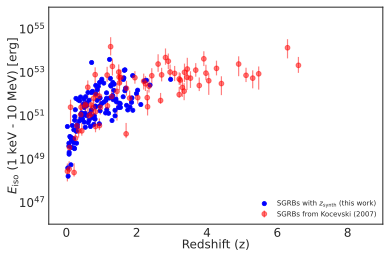

In [595]:
import matplotlib.colors as mcolors
import matplotlib.patches as mpatch

overlap = {name for name in mcolors.CSS4_COLORS
           if f'xkcd:{name}' in mcolors.XKCD_COLORS}

from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset)

fig, ax1 = plt.subplots()

# ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.set_xlim([-0.5,9.0])#([1e50,1e55])
ax1.set_ylim([1e46,1e56])#([100,2*10**4])

ax1.tick_params(direction='in', which='both', length=3, width=1, labelright=False, axis='both', labelsize=12)
ax1.minorticks_on
# plt.grid(True, which='both', lw = 0.3, zorder=0)

ax1.set_ylabel(r'$E_{\rm iso}$ ($1$ keV - $10$ MeV) [erg]',fontsize=12, labelpad=0)
ax1.set_xlabel('Redshift (z)',fontsize=12,labelpad=0)

# xew1 = np.linspace(1e-6,1e5)
# # plt.plot(xew1, 10**3.23197*(xew1)**0.50569, color='black', lw=1.0, zorder=2, label=r'$E_{p,i}=10^{3.23197}\times E_{iso}^{0.50569}$')
# # plt.plot(xew1, 10**3.22691*(xew1)**0.49982, color='black', lw=1.0, zorder=2, label=r'$E_{p,i}=10^{3.22691}\times E_{iso}^{0.49982}$')
# ax1.plot(xew1, 1686*(xew1)**0.49982, color='black', lw = 1.0, zorder=2, label=r'$E_{p,i}=1686\times E_{iso}^{0.49982}$')
# ax1.plot(xew1, 10**(3.22691+0.221504)*(xew1)**0.49982, linestyle='--', color='black', lw=1.0, zorder=2, label=r'$\pm1\sigma$')
# ax1.plot(xew1, 10**(3.22691-0.221504)*(xew1)**0.49982, linestyle='--', color='black', lw=1.0, zorder=2)
# ax1.plot(xew1, 10**(3.22691+3*0.221504)*(xew1)**0.49982, linestyle='-.', color='black', lw=1.0, zorder=2, label=r'$\pm3\sigma$')
# ax1.plot(xew1, 10**(3.22691-3*0.221504)*(xew1)**0.49982, linestyle='-.', color='black', lw=1.0, zorder=2)

ax1.errorbar(redshift_kocevski_2007, 10**eiso_kocevski_2007, yerr = 10**eiso_plus_minus_sigma_kocevski_2007, fmt='o', color='red', alpha=0.5, label='SGRBs from Kocevski (2007)')#,  color='red', zorder=2, s=18.0, label=names[18])
ax1.scatter(sgrb_125_z_zml_nonzero, sgrb_125_eiso_zml_nonzero, color='blue', zorder=2, s=18.0, label=r'SGRBs with $z_{\rm synth}$ (this work)')
plt.legend(loc=4,frameon=False,fontsize=7)
plt.show()

In [554]:
redshift_kocevski_2007 = np.array([1.29, 1.95, 1.44, 3.24, 2.90, 0.65, 4.27, 0.22, 0.61, 2.82, 0.26, 3.97, 1.71, 0.42, 1.70, 5.30, 2.61, 0.83, 0.30, 6.29, 3.35, 2.20, 0.94, 2.35, 0.08, 1.55, 0.55, 0.71, 2.03, 3.53, 6.60, 2.30, 0.78, 4.05, 3.91, 0.03, 4.41, 1.49, 0.35, 1.51, 0.09, 4.90, 0.44, 5.11, 3.21, 2.68, 3.78, 3.08, 0.12, 3.43, 1.80, 2.71, 0.54, 0.70, 3.68, 2.43, 0.94, 3.21, 5.47, 3.30, 1.26, 0.76, 3.44, 1.31, 1.16, 0.41, 0.83, 3.36, 2.25, 1.17, 1.50, 0.84, 2.95, 0.97, 2.31, 0.82], dtype='float')
eiso_kocevski_2007 = np.array([51.88, 52.75, 52.12, 52.64, 53.51, 51.00, 53.18, 48.38, 52.31, 53.68, 49.96, 52.96, 52.26, 51.39, 50.16, 52.73, 53.38, 51.18, 50.53, 54.13, 52.13, 52.59, 50.54, 52.36, 48.54, 52.76, 51.45, 51.07, 51.83, 52.73, 53.32, 51.83, 51.81, 52.61, 53.62, 48.44, 52.48, 53.01, 50.30, 52.51, 49.53, 53.38, 50.30, 52.86, 52.69, 51.70, 52.39, 52.95, 51.39, 52.77, 51.81, 52.88, 51.52, 51.49, 53.10, 52.84, 51.90, 51.97, 52.93, 52.30, 54.18, 51.36, 53.15, 53.27, 52.87, 51.05, 50.50, 53.00, 52.47, 51.45, 52.78, 51.96, 53.01, 51.38, 51.41, 52.89],dtype='float')
eiso_kocevski_2007_plus_sigma = np.array([0.13, 0.00, 0.15, 0.04, 0.10, 0.11, 0.10, 0.22, 0.02, 0.21, 0.10, 0.16, 0.09, 0.18, 0.34, 0.11, 0.26, 0.15, 0.36, 0.17, 0.12, 0.09, 0.06, 0.11, 0.11, 0.12, 0.19, 0.26, 0.13, 0.03, 0.16, 0.11, 0.08, 0.07, 0.09, 0.10, 0.07, 0.10, 0.10, 0.14, 0.33, 0.10, 0.10, 0.09, 0.01, 0.09, 0.13, 0.08, 0.09, 0.06, 0.09, 0.05, 0.08, 0.11, 0.04, 0.09, 0.14, 0.09, 0.07, 0.06, 0.24, 0.12, 0.36, 0.11, 0.15, 0.43, 0.42, 0.18, 0.09, 0.14, 0.08, 0.12, 0.09, 0.11, 0.10, 0.07], dtype=float)
eiso_kocevski_2007_minus_sigma = np.array([0.38, 0.33, 0.02, 0.40, 0.25, 0.17, 0.28, 0.46, 0.02, 0.27, 0.33, 0.28, 0.27, 0.30, 0.44, 0.18, 0.25, 0.82, 0.33, 0.17, 0.21, 0.23, 0.42, 0.31, 0.20, 0.28, 0.24, 0.36, 0.32, 0.19, 0.26, 0.31, 0.29, 0.11, 0.27, 0.18, 0.15, 0.23, 0.29, 0.27, 0.41, 0.14, 0.40, 0.29, 0.34, 0.53, 0.35, 0.25, 0.06, 0.13, 0.19, 0.30, 0.28, 0.20, 0.30, 0.19, 0.21, 0.55, 0.09, 0.20, 0.22, 0.36, 0.31, 0.21, 0.29, 0.35, 0.34, 0.19, 0.27, 0.26, 0.28, 0.29, 0.25, 0.28, 0.22, 0.08], dtype=float)
eiso_plus_sigma_kocevski_2007 = np.round(eiso_kocevski_2007 + eiso_kocevski_2007_plus_sigma,2)
eiso_minus_sigma_kocevski_2007 = np.round(eiso_kocevski_2007 - eiso_kocevski_2007_minus_sigma,2)
eiso_plus_minus_sigma_kocevski_2007 = np.array([eiso_minus_sigma_kocevski_2007, eiso_plus_sigma_kocevski_2007])
eiso_plus_minus_sigma_kocevski_2007.shape

(2, 76)

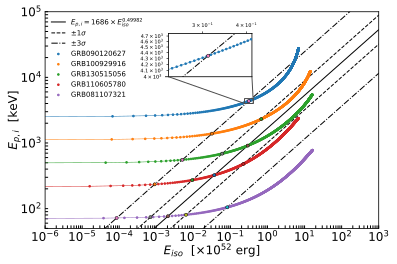

In [119]:
import matplotlib.colors as mcolors
import matplotlib.patches as mpatch

overlap = {name for name in mcolors.CSS4_COLORS
           if f'xkcd:{name}' in mcolors.XKCD_COLORS}

from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset)

fig, ax1 = plt.subplots()

ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.set_xlim([1e-6,1e3])#([1e50,1e55])
ax1.set_ylim([50,1e5])#([100,2*10**4])

ax1.tick_params(direction='in', which='both', length=3, width=1, labelright=False, axis='both', labelsize=12)
ax1.minorticks_on
ax1.set_xlabel(r'$E_{iso}$  [$\times10^{52}$ erg]',fontsize=12, labelpad=0)
ax1.set_ylabel('$E_{p,i}$  [keV]',fontsize=12,labelpad=0)

xew1 = np.linspace(1e-6,1e5)
# plt.plot(xew1, 10**3.23197*(xew1)**0.50569, color='black', lw=1.0, zorder=2, label=r'$E_{p,i}=10^{3.23197}\times E_{iso}^{0.50569}$')
# plt.plot(xew1, 10**3.22691*(xew1)**0.49982, color='black', lw=1.0, zorder=2, label=r'$E_{p,i}=10^{3.22691}\times E_{iso}^{0.49982}$')
ax1.plot(xew1, 1686*(xew1)**0.49982, color='black', lw = 1.0, zorder=2, label=r'$E_{p,i}=1686\times E_{iso}^{0.49982}$')
ax1.plot(xew1, 10**(3.22691+0.221504)*(xew1)**0.49982, linestyle='--', color='black', lw=1.0, zorder=2, label=r'$\pm1\sigma$')
ax1.plot(xew1, 10**(3.22691-0.221504)*(xew1)**0.49982, linestyle='--', color='black', lw=1.0, zorder=2)
ax1.plot(xew1, 10**(3.22691+3*0.221504)*(xew1)**0.49982, linestyle='-.', color='black', lw=1.0, zorder=2, label=r'$\pm3\sigma$')
ax1.plot(xew1, 10**(3.22691-3*0.221504)*(xew1)**0.49982, linestyle='-.', color='black', lw=1.0, zorder=2)

ax1.scatter(curve_x[::100,18], curve_y[::100,18], zorder=2, s=3.0, label=names[18])
ax1.plot(curve_x[::100,18], curve_y[::100,18], zorder=2, lw=0.5)
ax1.scatter(curve_x[::100,56], curve_y[::100,56], zorder=2, s=3.0, label=names[56])
ax1.plot(curve_x[::100,56], curve_y[::100,56], zorder=2, lw=0.5)
ax1.scatter(curve_x[::100,108], curve_y[::100,108], zorder=2, s=3.0, label=names[108])
ax1.plot(curve_x[::100,108], curve_y[::100,108], zorder=2, lw=0.5)
ax1.scatter(curve_x[::100,71], curve_y[::100,71], zorder=2, s=3.0, label=names[71])
ax1.plot(curve_x[::100,71], curve_y[::100,71], zorder=2, lw=0.5)
ax1.scatter(curve_x[::100,7], curve_y[::100,7], zorder=2, s=3.0, label=names[7])
ax1.plot(curve_x[::100,7], curve_y[::100,7], zorder=2, lw=0.5)

ax1.scatter(mlip[18,0]/1e52, mlip[18,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
ax1.scatter(s3pip[18,0]/1e52, s3pip[18,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
ax1.scatter(s1pip[18,0]/1e52, s1pip[18,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
ax1.scatter(s1mip[18,0]/1e52, s1mip[18,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
ax1.scatter(s3mip[18,0]/1e52, s3mip[18,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)

ax1.scatter(mlip[56,0]/1e52, mlip[56,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
ax1.scatter(s3pip[56,0]/1e52, s3pip[56,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
ax1.scatter(s1pip[56,0]/1e52, s1pip[56,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
ax1.scatter(s1mip[56,0]/1e52, s1mip[56,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
ax1.scatter(s3mip[56,0]/1e52, s3mip[56,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)

ax1.scatter(mlip[108,0]/1e52, mlip[108,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
ax1.scatter(s3pip[108,0]/1e52, s3pip[108,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
ax1.scatter(s1pip[108,0]/1e52, s1pip[108,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
ax1.scatter(s1mip[108,0]/1e52, s1mip[108,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
ax1.scatter(s3mip[108,0]/1e52, s3mip[108,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)

ax1.scatter(mlip[71,0]/1e52, mlip[71,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
ax1.scatter(s3pip[71,0]/1e52, s3pip[71,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
ax1.scatter(s1pip[71,0]/1e52, s1pip[71,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
ax1.scatter(s1mip[71,0]/1e52, s1mip[71,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
ax1.scatter(s3mip[71,0]/1e52, s3mip[71,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)

ax1.scatter(mlip[7,0]/1e52, mlip[7,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
ax1.scatter(s3pip[7,0]/1e52, s3pip[7,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
ax1.scatter(s1pip[7,0]/1e52, s1pip[7,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
ax1.scatter(s1mip[7,0]/1e52, s1mip[7,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)
ax1.scatter(s3mip[7,0]/1e52, s3mip[7,1], s=10.0, edgecolors='black', linewidths=0.5, zorder=3)





# Create a set of inset Axes: these should fill the bounding box allocated to them.
ax2 = plt.axes([0.25,4000,0.4,4800])#[s3pip[18,0]/1e52-s3pip[18,0]/1e55,s3pip[18,0]/1e52+s3pip[18,0]/1e55,s3pip[18,1]-10,s3pip[18,1]+10])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.37,0.7,0.25,0.20])
ax2.set_axes_locator(ip)
# Mark the region corresponding to the inset axes on ax1 and draw lines in grey linking the two axes.
mark_inset(ax1, ax2, loc1=3, loc2=4, fc="none", ec='0.3',zorder=4)

ax2.set_xscale('log')
ax2.set_yscale('log')

ax2.plot(xew1, 10**(3.22691+3*0.221504)*(xew1)**0.49982, linestyle='-.', color='black', lw=1.0, zorder=2)
ax2.scatter(curve_x[::100,18], curve_y[::100,18], zorder=3, s=3.0)
ax2.plot(curve_x[::100,18], curve_y[::100,18], zorder=2, lw=0.5)
ax2.scatter(s3pip[18,0]/1e52, s3pip[18,1], s=10.0, edgecolors='black', color='#FF81C0', linewidths=0.5, zorder=3)

# ax2.legend(loc=0)

# # Some ad hoc tweaks.
ax2.set_xlim([0.24,0.415])
ax2.set_ylim([4e3,4.75e3])
ax2.minorticks_on
ax2.set_xticks(np.arange(2.0e-1,4.15e-1))
ax2.set_yticks(np.arange(4e3,5e3,1e3))
ax2.set_xticklabels(ax2.get_xticks(), backgroundcolor='w')
ax2.xaxis.tick_top()
# ax2.tick_params(axis='x', which='major', pad=5)
ax2.tick_params(axis='x', which='major', labelsize=7, bottom=False, top=True, direction='in')
ax2.tick_params(axis='y', which='major', labelsize=5)
ax2.tick_params(axis='x', which='minor', labelsize=5, bottom=False, top=True)
ax2.tick_params(axis='y', which='minor', labelsize=5)

ax1.legend(loc=2,frameon=False,fontsize=7)
plt.show()

# plt.savefig('epeak-eiso-sgrb_synth_z_line-sigma_crossing_joint_dots3.svg', dpi=1200);
# plt.savefig('epeak-eiso-sgrb_synth_z_line-sigma_crossing_joint_dots3.eps', dpi=1200);
# plt.savefig('epeak-eiso-sgrb_synth_z_line-sigma_crossing_joint_dots3.pdf', dpi=1200);
# plt.savefig('epeak-eiso-sgrb_synth_z_line-sigma_crossing_joint_dots3.png', dpi=1200);

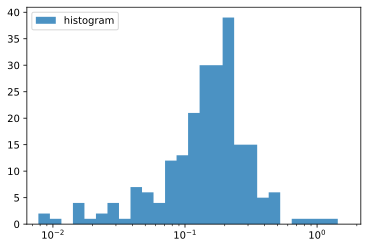

In [60]:
from scipy import *
# equally sized bins in log10-scale
bins_log10 = np.logspace( np.log10( zs3pip.min()  ), np.log10( zs3mip.max() ), 30)#N_bins )
counts, bin_edges, ignored = plt.hist( zs3pip, bins_log10, histtype='stepfilled', alpha=0.8, label='histogram' )
# counts, bin_edges, ignored = plt.hist( zs1pip, bins_log10, histtype='stepfilled', alpha=0.8, label='histogram' )
# counts, bin_edges, ignored = plt.hist( zmlip, bins_log10, histtype='stepfilled', alpha=0.8, label='histogram' )
# counts, bin_edges, ignored = plt.hist( zs1mip, bins_log10, histtype='stepfilled', alpha=0.8, label='histogram' )
# counts, bin_edges, ignored = plt.hist( zs3mip, bins_log10, histtype='stepfilled', alpha=0.8, label='histogram' )

# calculate length of each bin (required for scaling PDF to histogram)
bins_log_len = np.zeros( bins_log10.size )
for ii in range( counts.size):
    bins_log_len[ii] = bin_edges[ii+1]-bin_edges[ii]

# # get pdf-values for same intervals as histogram
# samples_fit_log = scipy.stats.lognorm.pdf( bins_log10, shape, loc=loc, scale=scale )

# # oplot fitted and scaled PDF into histogram
# plt.plot( bins_log10, np.multiply(samples_fit_log,bins_log_len)*sum(counts), label='PDF using histogram bins', linewidth=2 )

# # make another pdf with a finer resolution
# x_fit_log       = np.logspace( np.log10( samples.min()), np.log10( samples.max()), 100 )
# samples_fit_log = scipy.stats.lognorm.pdf( x_fit_log, shape, loc=loc, scale=scale )
# # calculate length of each bin (required for scaling PDF to histogram)
# # in addition, estimate middle point for more accuracy (should in principle also be done for the other PDF)
# bins_log_len       = np.diff( x_fit_log )
# samples_log_center = np.zeros( x_fit_log.size-1 )
# for ii in range( x_fit_log.size-1 ):
#     samples_log_center[ii] = .5*(samples_fit_log[ii] + samples_fit_log[ii+1] )

# # scale PDF to histogram
# # NOTE: THIS IS NOT WORKING PROPERLY (SEE FIGURE)
# pdf_scaled2hist = np.multiply(samples_log_center,bins_log_len)*sum(counts)

# # oplot fit into histogram
# plt.plot( .5*(x_fit_log[:-1]+x_fit_log[1:]), pdf_scaled2hist, label='PDF using own bins', linewidth=2 )

plt.xscale( 'log' )
plt.xlim( bin_edges.min(), bin_edges.max() )
plt.legend(loc=2)

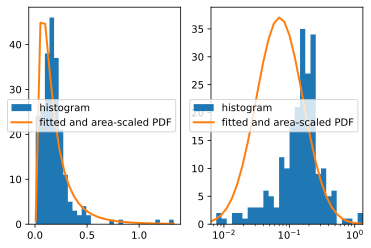

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

# generate log-normal distributed set of samples
# np.random.seed(42)
# samples   = np.random.lognormal( mean=0.1843, sigma=0.1528, size=223 )
samples = zs3pip

# make a fit to the samples
shape, loc, scale = scipy.stats.lognorm.fit( samples, floc=0 )
x_fit       = np.linspace( samples.min(), samples.max(), 30 )
samples_fit = scipy.stats.lognorm.pdf( x_fit, shape, loc=loc, scale=scale )

# plot a histrogram with linear x-axis
plt.subplot( 1, 2, 1 )
N_bins = 30
counts, bin_edges, ignored = plt.hist( samples, N_bins, histtype='stepfilled', label='histogram' )
# calculate area of histogram (area under PDF should be 1)
area_hist = .0
for ii in range( counts.size):
    area_hist += (bin_edges[ii+1]-bin_edges[ii]) * counts[ii]
# oplot fit into histogram
plt.plot( x_fit, samples_fit*area_hist, label='fitted and area-scaled PDF', linewidth=2)
plt.legend()

# make a histrogram with a log10 x-axis
plt.subplot( 1, 2, 2 )
# equally sized bins (in log10-scale)
bins_log10 = np.logspace( np.log10( samples.min()  ), np.log10( samples.max() ), N_bins )
counts, bin_edges, ignored = plt.hist( samples, bins_log10, histtype='stepfilled', label='histogram' )
# calculate area of histogram
area_hist_log = .0
for ii in range( counts.size):
    area_hist_log += (bin_edges[ii+1]-bin_edges[ii]) * counts[ii]
# get pdf-values for log10 - spaced intervals
x_fit_log       = np.logspace( np.log10( samples.min()), np.log10( samples.max()), 30 )
samples_fit_log = scipy.stats.lognorm.pdf( x_fit_log, shape, loc=loc, scale=scale )
# oplot fit into histogram
plt.plot( x_fit_log, samples_fit_log*area_hist_log, label='fitted and area-scaled PDF', linewidth=2 )

plt.xscale( 'log' )
plt.xlim( bin_edges.min(), bin_edges.max() )
plt.legend()
plt.show()

/var/folders/q3/mnhc5cbn57x2lb_psm18b2q80000gn/T/ipykernel_55076/1762401854.py:14: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  plt.plot( bins_log10, np.multiply(samples_fit_log,bins_log_len)*sum(counts), label='PDF using histogram bins', linewidth=2 )
/var/folders/q3/mnhc5cbn57x2lb_psm18b2q80000gn/T/ipykernel_55076/1762401854.py:28: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  pdf_scaled2hist = np.multiply(samples_log_center,bins_log_len)*sum(counts)


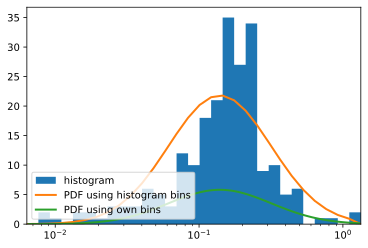

In [62]:
# equally sized bins in log10-scale
bins_log10 = np.logspace( np.log10( samples.min()  ), np.log10( samples.max() ), N_bins )
counts, bin_edges, ignored = plt.hist( samples, bins_log10, histtype='stepfilled', label='histogram' )

# calculate length of each bin (required for scaling PDF to histogram)
bins_log_len = np.zeros( bins_log10.size )
for ii in range( counts.size):
    bins_log_len[ii] = bin_edges[ii+1]-bin_edges[ii]

# get pdf-values for same intervals as histogram
samples_fit_log = scipy.stats.lognorm.pdf( bins_log10, shape, loc=loc, scale=scale )

# oplot fitted and scaled PDF into histogram
plt.plot( bins_log10, np.multiply(samples_fit_log,bins_log_len)*sum(counts), label='PDF using histogram bins', linewidth=2 )

# make another pdf with a finer resolution
x_fit_log       = np.logspace( np.log10( samples.min()), np.log10( samples.max()), 100 )
samples_fit_log = scipy.stats.lognorm.pdf( x_fit_log, shape, loc=loc, scale=scale )
# calculate length of each bin (required for scaling PDF to histogram)
# in addition, estimate middle point for more accuracy (should in principle also be done for the other PDF)
bins_log_len       = np.diff( x_fit_log )
samples_log_center = np.zeros( x_fit_log.size-1 )
for ii in range( x_fit_log.size-1 ):
    samples_log_center[ii] = .5*(samples_fit_log[ii] + samples_fit_log[ii+1] )

# scale PDF to histogram
# NOTE: THIS IS NOT WORKING PROPERLY (SEE FIGURE)
pdf_scaled2hist = np.multiply(samples_log_center,bins_log_len)*sum(counts)

# oplot fit into histogram
plt.plot( .5*(x_fit_log[:-1]+x_fit_log[1:]), pdf_scaled2hist, label='PDF using own bins', linewidth=2 )

plt.xscale( 'log' )
plt.xlim( bin_edges.min(), bin_edges.max() )
plt.legend(loc=3)

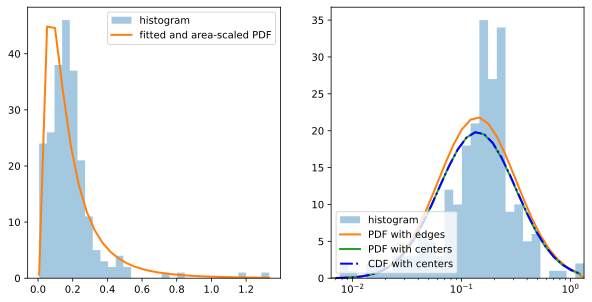

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 

# generate log-normal distributed set of samples
# np.random.seed(42)
# samples = np.random.lognormal(mean=1, sigma=.4, size=10000)
samples = zs3pip
N_bins = 30

# make a fit to the samples
shape, loc, scale = stats.lognorm.fit(samples, floc=0)
x_fit       = np.linspace(samples.min(), samples.max(), 30)
samples_fit = stats.lognorm.pdf(x_fit, shape, loc=loc, scale=scale)

# plot a histrogram with linear x-axis
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5), gridspec_kw={'wspace':0.2})
counts, bin_edges, ignored = ax1.hist(samples, N_bins, histtype='stepfilled', alpha=0.4,
                                      label='histogram')

# calculate area of histogram (area under PDF should be 1)
area_hist = ((bin_edges[1:] - bin_edges[:-1]) * counts).sum()

# plot fit into histogram
ax1.plot(x_fit, samples_fit*area_hist, label='fitted and area-scaled PDF', linewidth=2)
ax1.legend()

# equally sized bins in log10-scale and centers
bins_log10 = np.logspace(np.log10(samples.min()), np.log10(samples.max()), N_bins)
bins_log10_cntr = (bins_log10[1:] + bins_log10[:-1]) / 2

# histogram plot
counts, bin_edges, ignored = ax2.hist(samples, bins_log10, histtype='stepfilled', alpha=0.4,
                                      label='histogram')

# calculate length of each bin and its centers(required for scaling PDF to histogram)
bins_log_len = np.r_[bin_edges[1:] - bin_edges[: -1], 0]
bins_log_cntr = bin_edges[1:] - bin_edges[:-1]

# get pdf-values for same intervals as histogram
samples_fit_log = stats.lognorm.pdf(bins_log10, shape, loc=loc, scale=scale)

# pdf-values for centered scale
samples_fit_log_cntr = stats.lognorm.pdf(bins_log10_cntr, shape, loc=loc, scale=scale)

# pdf-values using cdf 
samples_fit_log_cntr2_ = stats.lognorm.cdf(bins_log10, shape, loc=loc, scale=scale)
samples_fit_log_cntr2 = np.diff(samples_fit_log_cntr2_)

# plot fitted and scaled PDFs into histogram
ax2.plot(bins_log10, 
         samples_fit_log * bins_log_len * counts.sum(), '-', 
         label='PDF with edges',  linewidth=2)

ax2.plot(bins_log10_cntr, 
         samples_fit_log_cntr * bins_log_cntr * counts.sum(), '-', 
         label='PDF with centers', linewidth=2)

ax2.plot(bins_log10_cntr, 
         samples_fit_log_cntr2 * counts.sum(), 'b-.', 
         label='CDF with centers', linewidth=2)


ax2.set_xscale('log')
ax2.set_xlim(bin_edges.min(), bin_edges.max())
ax2.legend(loc=3)
plt.show()

In [64]:
np.min(zs3pip),np.max(zs3pip)

(0.006348823829330108, 1.332545464590143)

In [65]:
zs3pip

array([0.19785108, 0.37820549, 0.13761855, 0.21353251, 0.49951034,
       0.14988265, 0.1195046 , 0.01650882, 0.09627731, 0.14617354,
       0.1645211 , 0.21136929, 0.10808661, 0.0524344 , 0.24327097,
       0.16175261, 0.23038387, 0.03935266, 0.72447059, 0.15149496,
       0.08268964, 0.10544766, 0.08282109, 0.50329908, 0.16010614,
       0.47354453, 0.06023247, 0.11751786, 0.176419  , 0.16941708,
       0.21501808, 0.12590319, 0.20572688, 0.24592334, 0.08623207,
       0.25043447, 0.12433527, 0.09194479, 0.17131481, 0.22416239,
       0.13814716, 0.17464918, 0.15598201, 0.14773104, 0.19411149,
       0.17100299, 0.22509086, 0.14698335, 0.16651237, 0.1586941 ,
       0.05080927, 0.11595912, 0.05651774, 0.40643703, 0.14404624,
       0.09886668, 0.23658975, 0.22172548, 0.15400999, 0.32324839,
       0.20332387, 0.13756588, 0.27308639, 0.25179294, 0.02351675,
       0.16592856, 0.11473711, 0.23215051, 0.1826471 , 0.13684667,
       0.11969873, 0.08146238, 0.11294393, 0.21998391, 0.15889

### END OF MAIN CODE
__________________________________________________________________________________________________________________________